# 데이터분석 경진대회 (JB사냥개들)

##  목차  
### [1. 데이터 파악](#s-1) 
+ [1.1 데이터 및 패키지 불러오기](#s-1.1)    
+ [1.2 데이터 컬럼 정보](#s-1.2)   
+ [1.3 데이터 결측값, 이상값 확인](#s-1.3)     
+ [1.4 이상값 및 결측값 -> 결측치 처리](#s-1.4)     
+ [1.5 결측치 간 패턴 등 연관성 파악](#s-1.5)   
+ [1.6 결측치 대체(추정통계량대체)](#s-1.6)
+ [1.7 결측치 대체(DL)](#s-1.7)
+ [1.8 결측치 대체(MI)](#s-1.8)


### [2. 데이터 시각화](#s-2) 
+ [2.1 타겟변수 파악](#s-2.1)  

### [3. Feature Enginnering](#s-3)

### [4. Modeling](#s-4)


## 1. 데이터 파악  <a id="s-1">

@@ 데이터 파악에 대한 설명을 간략히 추가?

### 1-1. 데이터 및 패키지 불러오기 <a id="s-1.1">

- #### 필요한 Package import

In [3]:
import os
import pandas as pd
import numpy as np
import math
from scipy import stats
from scipy.stats import chi2, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
from tensorflow.keras.layers import LSTM, Dense, Dropout
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

- #### 한글명을 기재한 시각화를 위해 *Font* 사전 세팅

In [5]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic' 

- #### Data import

In [6]:
#path = "/Users/apple/Desktop/jbfg_ds_2nd/"
#os.chdir(path) 

In [7]:
df = pd.read_csv('loan_customer.csv')

In [8]:
pd.set_option('display.max_columns',None)
df.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002         Cash loans           M               Y             0   
1      100004    Revolving loans         NaN             NaN             0   
2      100020         Cash loans           M               N             0   
3      100029         Cash loans           M               N             2   
4      100048         Cash loans         NaN               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT NAME_INCOME_TYPE  \
0          202500.0         NaN          Working   
1           67500.0    135000.0          Working   
2          108000.0    509602.5          Working   
3          135000.0         NaN          Working   
4          202500.0    604152.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special               Married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801     -9461.0         -637.0            -3648.0   
1                         NaN    -19046.0            NaN            -4260.0   
2                    0.018634    -12931.0            NaN                NaN   
3                    0.026392    -11286.0         -746.0             -108.0   
4                    0.009175         NaN         -475.0                NaN   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0          -2120.0           1               1                0           1   
1          -2531.0           1               1                1           1   
2          -3866.0           1               1                0           0   
3              NaN           1               1                0           0   
4           -513.0           1               1                0           1   

   FLAG_EMAIL  REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  \
0           0                     2                  WEDNESDAY   
1           0                     2                     MONDAY   
2           0                     2                   THURSDAY   
3           0                     2                   THURSDAY   
4           0                     2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                       10                       0                       0   
1                        9                       0                       0   
2                       12                       1                       1   
3                       14                       0                       1   
4                       12                       0                       1   

   LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  FLAG_DOCUMENT_2  \
0                        0  Business Entity Type 3                0   
1                        0              Government                0   
2                        0              Government                0   
3                        1  Business Entity Type 3                0   
4                        1        Industry: type 1                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  CB_SCORE_1  CB_SCORE_2  CB_SCORE_3  \
0                1                0         NaN         NaN   58.349224   
1                0                0   26.499494   57.600542   46.433666   
2                1                0         NaN   63.496369         NaN   
3                1                0   82.376245   45.996152   68.694333   
4                1                0   66.199985         NaN         NaN   

   TARGET  
0       1  
1       0  
2       0  
3       0  
4   

### 1-2. 데이터 컬럼 정보 <a id="s-1.2">

- #### 원활한 데이터 처리를 위해 컬럼정보(한글명) 활용    *※ 지주 제공 ppt 참고*

In [9]:
column_info = {'SK_ID_CURR':'대출식별번호',
'NAME_CONTRACT_TYPE':'계약유형',
'CODE_GENDER':'성별',
'FLAG_OWN_REALTY':'자가부동산보유여부',
'CNT_CHILDREN':'자녀수',
'AMT_INCOME_TOTAL':'소득금액(USD)',
'AMT_CREDIT':'신용대출금액(USD)',
'NAME_INCOME_TYPE':'소득유형',
'NAME_EDUCATION_TYPE':'학력',
'NAME_FAMILY_STATUS':'결혼상태',
'NAME_HOUSING_TYPE':'주거형태',
'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구',
'DAYS_BIRTH':'대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
'DAYS_REGISTRATION':'대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
'DAYS_ID_PUBLISH':'대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
'FLAG_MOBIL':'휴대폰번호등록여부',
'FLAG_EMP_PHONE':'고용주연락처등록여부',
'FLAG_WORK_PHONE':'직장전화번호등록여부',
'FLAG_PHONE':'집전화번호등록여부',
'FLAG_EMAIL':'이메일주소등록여부',
'REGION_RATING_CLIENT':'거주지등급',
'WEEKDAY_APPR_PROCESS_START':'대출신청요일',
'HOUR_APPR_PROCESS_START':'대출신청시간대',
'REG_CITY_NOT_LIVE_CITY':'고객의등록지주소와실거주지일치여부',
'REG_CITY_NOT_WORK_CITY':'고객의등록지주소와직장주소일치여부',
'LIVE_CITY_NOT_WORK_CITY':'고객의실거주지와직장주소일치여부',
'ORGANIZATION_TYPE':'근무회사유형',
'FLAG_DOCUMENT_2':'문서2제공여부',
'FLAG_DOCUMENT_3':'문서3제공여부',
'FLAG_DOCUMENT_4':'문서4제공여부',
'CB_SCORE_1':'신용점수1',
'CB_SCORE_2':'신용점수2',
'CB_SCORE_3':'신용점수3',
'TARGET':'연체여부'}

In [11]:
df_colinfo = df.copy() 
for col in df_colinfo.columns : 
    df_colinfo.rename(columns = {col:column_info[col]}, inplace = True)
    print(col+' 컬럼명을 '+column_info[col]+'로 수정했습니다 ')

SK_ID_CURR 컬럼명을 대출식별번호로 수정했습니다 
NAME_CONTRACT_TYPE 컬럼명을 계약유형로 수정했습니다 
CODE_GENDER 컬럼명을 성별로 수정했습니다 
FLAG_OWN_REALTY 컬럼명을 자가부동산보유여부로 수정했습니다 
CNT_CHILDREN 컬럼명을 자녀수로 수정했습니다 
AMT_INCOME_TOTAL 컬럼명을 소득금액(USD)로 수정했습니다 
AMT_CREDIT 컬럼명을 신용대출금액(USD)로 수정했습니다 
NAME_INCOME_TYPE 컬럼명을 소득유형로 수정했습니다 
NAME_EDUCATION_TYPE 컬럼명을 학력로 수정했습니다 
NAME_FAMILY_STATUS 컬럼명을 결혼상태로 수정했습니다 
NAME_HOUSING_TYPE 컬럼명을 주거형태로 수정했습니다 
REGION_POPULATION_RELATIVE 컬럼명을 거주지역의표준화된인구로 수정했습니다 
DAYS_BIRTH 컬럼명을 대출신청시점에서의일단위나이(기준시점대비상대적인시간)로 수정했습니다 
DAYS_EMPLOYED 컬럼명을 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_REGISTRATION 컬럼명을 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_ID_PUBLISH 컬럼명을 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
FLAG_MOBIL 컬럼명을 휴대폰번호등록여부로 수정했습니다 
FLAG_EMP_PHONE 컬럼명을 고용주연락처등록여부로 수정했습니다 
FLAG_WORK_PHONE 컬럼명을 직장전화번호등록여부로 수정했습니다 
FLAG_PHONE 컬럼명을 집전화번호등록여부로 수정했습니다 
FLAG_EMAIL 컬럼명을 이메일주소등록여부로 수정했습니다 
REGION_RATING_CLIENT 컬럼명을 거주지등급로 수정했습니다 
WEEKDAY_APPR_PROCESS_START 컬럼명을 대출신청요일로 수정했습니다 
HOUR_APPR_PROCESS_STAR

### 1-3. 데이터 결측값 및  이상값 확인  <a id="s-1.3">

- #### 각 컬럼별 데이터 유형 및 결측치 확인 

In [360]:
df_colinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   대출식별번호                                   24000 non-null  int64  
 1   계약유형                                     24000 non-null  object 
 2   성별                                       16906 non-null  object 
 3   자가부동산보유여부                                14429 non-null  object 
 4   자녀수                                      24000 non-null  int64  
 5   소득금액(USD)                                24000 non-null  float64
 6   신용대출금액(USD)                              16700 non-null  float64
 7   소득유형                                     24000 non-null  object 
 8   학력                                       24000 non-null  object 
 9   결혼상태                                     24000 non-null  object 
 10  주거형태                                     24000

> #### <font color = blue> 데이터 유형 확인(Dtype) : 수치형 변수는 float/int, 범주형 변수는 object로 적용되어있음 </font>
> #### <font color = blue> 결측값 확인(Non-null Count) : 몇가지 컬럼에 대해 결측치 존재함을 확인 </font>
> #### <font color = red> 적정한 결측치 대체 방법들을 고려해, **적용 후 성능을 비교해 최적의 결측치 대체 방법** 선정 예정  </font>

- #### SK_ID_CURR(대출식별번호)에 중복여부 체크 진행 ▶ SK_ID_CURR(대출식별번호) 기준으로 그룹화하고 counting

In [12]:
grouped = df.groupby('SK_ID_CURR').size()

# counting이 1 넘어간 것들만 필터링
filtered_grouped = grouped[grouped > 1]

print(filtered_grouped)

Series([], dtype: int64)


> #### <font color = black>  SK_ID_CURR(key)에 중복된 데이터 없는 것으로 확인되어, 각 행(row)를 하나의 고유 대출로 판단해 분석 진행 </font>

- #### 데이터 오류 건 존재 여부 확인 ▶ 각 컬럼별 유효값 확인

In [362]:
for column in df.columns:
    unique_values = df[column].drop_duplicates().dropna()
    value_counts = df[column].value_counts(dropna=False)
    
    # 숫자형 열은 상위 30개 값만 표시하고, 그렇지 않은 열은 상위 60개 값만 표시
    if df[column].dtype in ['int64', 'float64']:
        truncated_value_counts = value_counts.head(30)
    else:
        truncated_value_counts = value_counts.head(60)

    print("-----------------------------------------------------------")
    print(f"Value counts for {column}")
    print(f"{column_info.get(column, 'No information')}")
    print(f"{truncated_value_counts} Unique valid values count: {len(unique_values)}")

-----------------------------------------------------------
Value counts for SK_ID_CURR
대출식별번호
100002    1
337229    1
337317    1
337293    1
337288    1
337287    1
337262    1
337261    1
337245    1
337242    1
337231    1
337226    1
337079    1
337217    1
337216    1
337211    1
337206    1
337164    1
337154    1
337134    1
337126    1
337101    1
337318    1
337323    1
337327    1
337345    1
337579    1
337578    1
337564    1
337550    1
Name: SK_ID_CURR, dtype: int64 Unique valid values count: 24000
-----------------------------------------------------------
Value counts for NAME_CONTRACT_TYPE
계약유형
Cash loans         21733
Revolving loans     2267
Name: NAME_CONTRACT_TYPE, dtype: int64 Unique valid values count: 2
-----------------------------------------------------------
Value counts for CODE_GENDER
성별
F      11211
NaN     7094
M       5694
XNA        1
Name: CODE_GENDER, dtype: int64 Unique valid values count: 3
---------------------------------------------------------

> #### <font color = black> 오기값 및 결측값 종류 </font>  
> #### <font color = blue> [Insight 1] 'NaN', 'nan', 'XNA', 'Unknown'  ▶ np.nan로 통일 </font>  

> #### <font color = black> DAYS_EMPLOYED 변수 탐색 '대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)’</font> 
> #### <font color = blue> 결측치를 제외한 나머지 유효값들 중 365243.0이라는 특정 유효값에서 2,999건이라는 최다 빈도를 발생시킴. </font>
> #### <font color = blue> ▶ [Insight 2]  이상치 유무 재확인 후 결측치로 처리하여 대체 진행예정 </font>


> #### <font color = black> FLAG_MOBIL 변수 탐색 '휴대폰번호등록여부' </font> 
> #### <font color = blue> ▶ 모두 휴대폰을 등록한 것으로 나와있어 단일값인 1을 지님. 해당 컬럼은 변별력이 없으므로 drop 시킴 </font> 


- #### REGION_POPULATION_RELATIVE (거주지역의표준화된인구) 
     컬럼명을 봤을 때 동일 유효값을 가지면 동일 지역 거주자일 것이라 추정됨. 유효값 개수를 지역 개수로 가정하고, 유효값 개수 counting 

In [14]:
df['REGION_POPULATION_RELATIVE'].value_counts() 

0.035792    893
0.046220    734
0.030755    656
0.026392    641
0.025164    632
           ... 
0.001417     26
0.001333     11
0.000938      2
0.000533      1
0.000290      1
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

> #### <font color = black> 유효값 개수가 81개로 지역(도/시)로 가정하기에 무리가 없다고 판단 </font>
> #### <font color = black> REGION_POPULATION_RELATIVE (거주지역의표준화된인구)는 남겨두되,  </font> 
> #### <font color = blue> [Insight 4] 동일 유효값을 가지면 동일 지역을 의미하는 "지역 파생 변수"(범주형) 생성 예정 </font>

### 1.4 결측값(오기값 등) ▶ 이상치 및 결측치 처리   <a id="s-1.4">

- #### <font color = blue> [Insight 1]</font> 에 따라 해당 결측값(오기값)을 모두 결측치로 통일하여 처리 ▶ DataFrame명 : __'df_adj_mv'__

In [16]:
df_adj_mv = df.copy()
#df_adj_mv = df_adj_mv.astype(str)
df_adj_mv = df_adj_mv.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

- #### 수치형 데이터에 대한 이상치 확인 

> #### <font color = blue> [Insight 2] (DAYS_EMPLOYED) </font>의 경우와 같이 각 컬럼 내 의심스러운 단일값과 
> #### 수치형 데이터에 존재하는 이상치도 확인하고자 함 _(IQR기반 이상치 탐지 진행)_ 

In [18]:
def count_outliers_ratio(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # 범주형 변수와 바이너리 변수 제외
    exclude_cols = [col for col in df.columns if df[col].dtype == object] + \
                   [col for col in numeric_cols if set(df[col].unique()) == {0, 1}] + \
                   [col for col in numeric_cols if set(df[col].unique()) == {1, 2, 3}] + \
                   ['SK_ID_CURR','CNT_CHILDREN','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START']
    
    numeric_cols = list(set(numeric_cols) - set(exclude_cols))
    
    result = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # 이상치의 조건 정의 (IQR * 1.5 범위 밖의 값)
        outlier_condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

        # 해당 컬럼의 이상치 건수 계산
        num_outliers = outlier_condition.sum()

        # 전체 행 대비 이상치 비율 계산
        ratio_outliers = num_outliers / len(df)

        result.append({'Column': col,
                       '# Outliers': num_outliers,
                       '% Outliers': ratio_outliers})

    result_df = pd.DataFrame(result).sort_values('# Outliers', ascending=False).reset_index(drop=True)
    
    return result_df

outlier_counts_df = count_outliers_ratio(df_adj_mv)
print(outlier_counts_df)

              Column  # Outliers  % Outliers
0      DAYS_EMPLOYED        3919    0.163292
1   AMT_INCOME_TOTAL        1123    0.046792
2         AMT_CREDIT         357    0.014875
3         CB_SCORE_2         132    0.005500
4         CB_SCORE_1         113    0.004708
5         CB_SCORE_3         107    0.004458
6  DAYS_REGISTRATION          40    0.001667
7         DAYS_BIRTH           0    0.000000
8         FLAG_MOBIL           0    0.000000
9    DAYS_ID_PUBLISH           0    0.000000


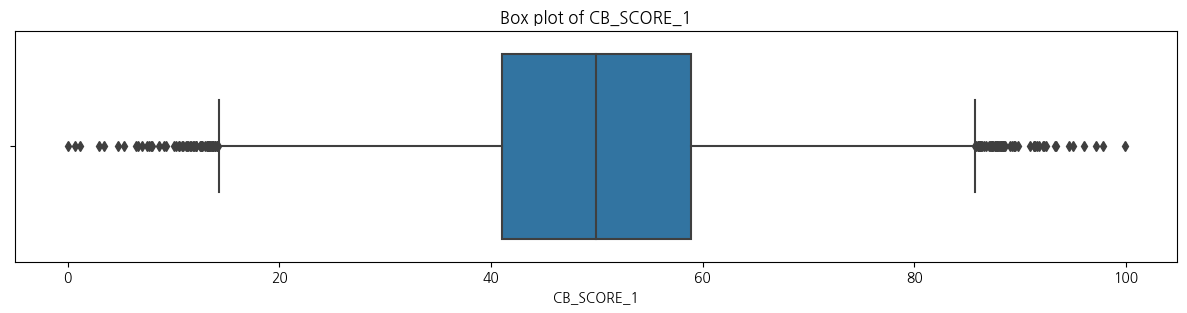

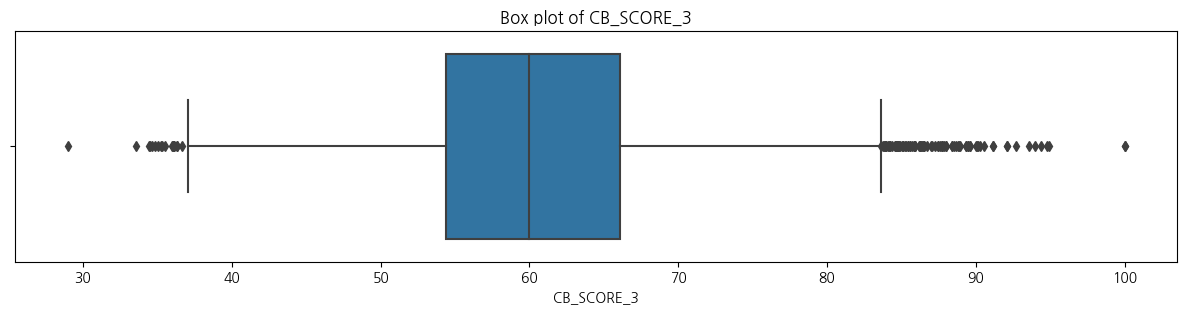

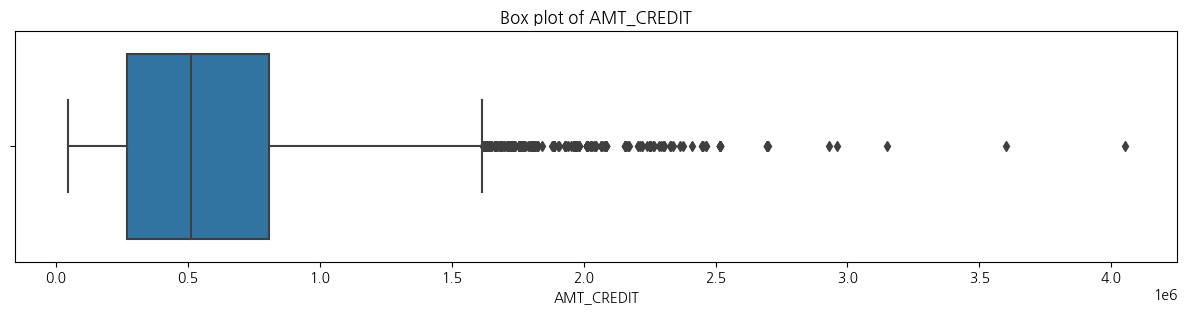

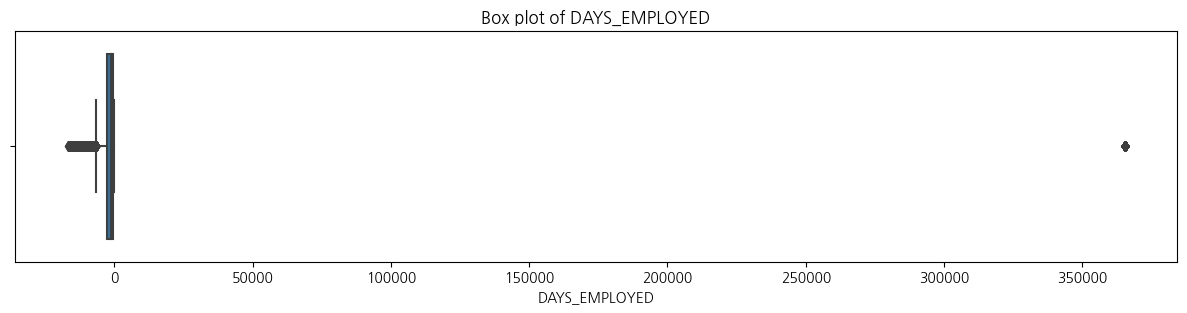

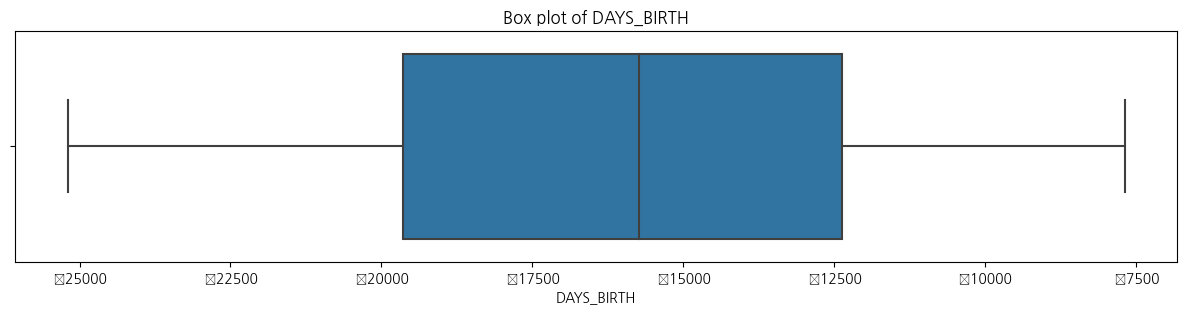

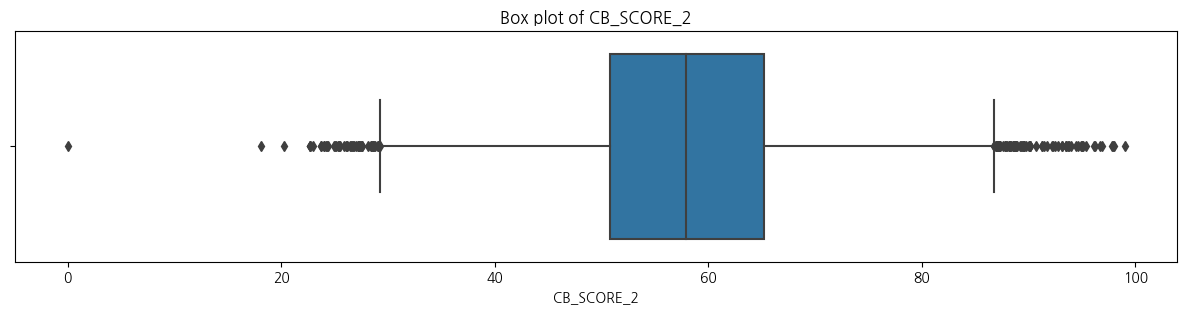

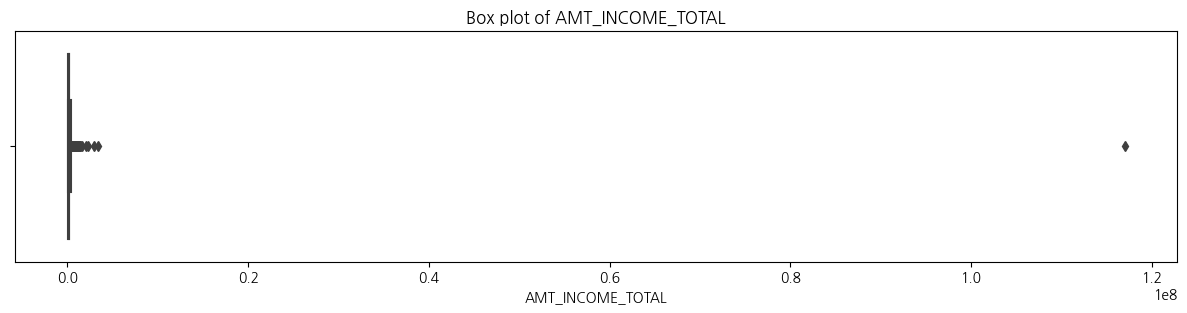

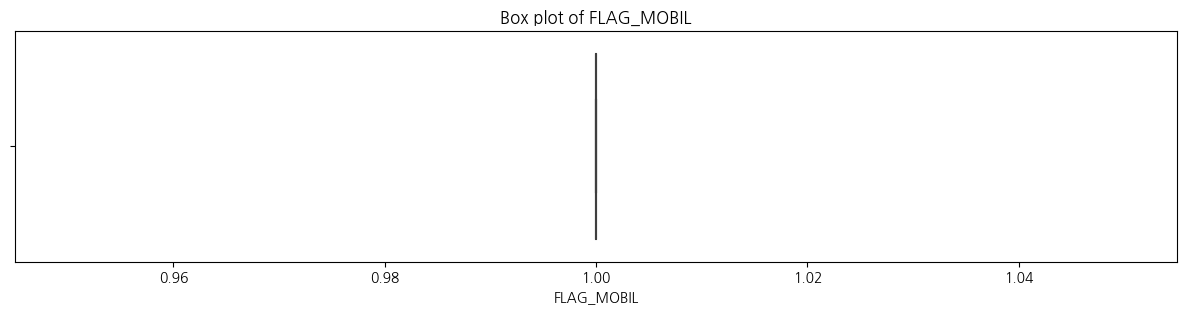

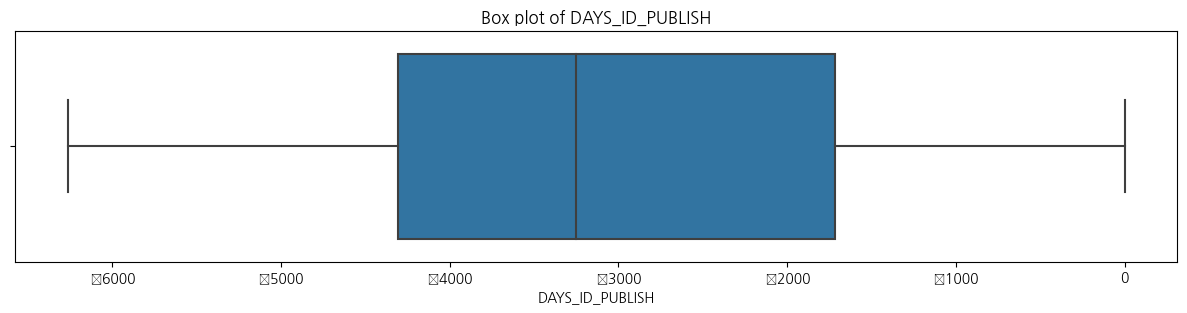

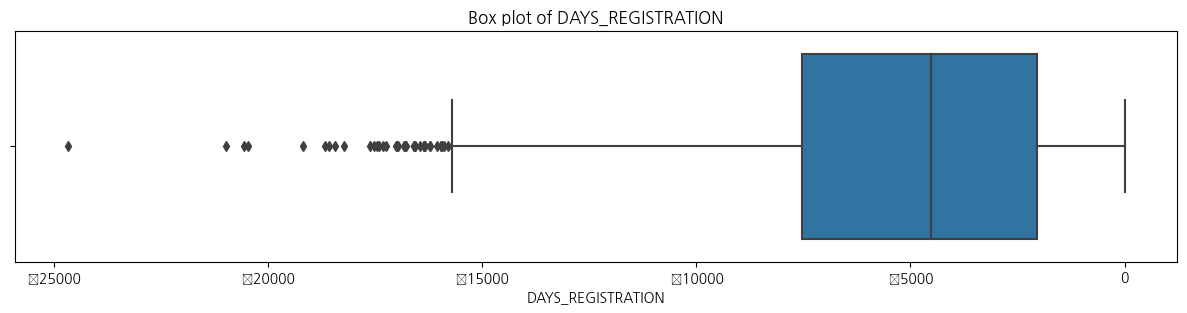

In [21]:
numeric_cols = df_adj_mv.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = [col for col in df_adj_mv.columns if df_adj_mv[col].dtype == object] + \
               [col for col in numeric_cols if set(df_adj_mv[col].unique()) == {0, 1}] + \
               [col for col in numeric_cols if set(df_adj_mv[col].unique()) == {1, 2, 3}] + \
               ['SK_ID_CURR','CNT_CHILDREN','REGION_POPULATION_RELATIVE','HOUR_APPR_PROCESS_START']
numeric_cols = list(set(numeric_cols) - set(exclude_cols))

for col in numeric_cols:
    plt.figure(figsize=(15, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

> #### <font color = black> AMT_INCOME_TOTAL의 boxplot은 이상치로 인해 분포 확인이 힘듬 ▶ 해당 이상치를 가지는 row(행)이 몇 개인지 확인 </font> 

In [22]:
# AMT_INCOME_TOTAL 열의 최대값 찾기
max_value = df['AMT_INCOME_TOTAL'].max()

# 최대값의 빈도 찾기
max_value_count = df[df['AMT_INCOME_TOTAL'] == max_value].shape[0]

print(f"AMT_INCOME_TOTAL의 최대값은 {max_value}이며, 이 값이 중복되는 건수는 {max_value_count}개입니다.")

AMT_INCOME_TOTAL의 최대값은 117000000.0이며, 이 값이 중복되는 건수는 1개입니다.


> #### <font color = black> DAYS_EMPLOYED 변수 탐색 '대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)’</font> 
> #### <font color = black> 결측치를 제외한 나머지 유효값들 중 365243.0이라는 특정 유효값에서 2,999건을 가지며 IQR통해 이상치로 확인됨(IQR기반 이상치 탐지 진행) </font>
> #### <font color = red> ▶ [Insight 5] 비상식적인 유효값이고 차지비중이 크므로, 365243.0은 np.nan으로 처리 </font>

> #### <font color = black> CB스코어, 신용대출금액, 소득금액의 이상치로 나오는 항목 변수 탐색 </font> 
> #### <font color = black> 각 컬럼별 유효값들의 빈도 수가 현저히 적으며 DAYS_EMPLOYED와 같이 특정 값에 지나치게 쏠림(2,999건)이 없을뿐더러 이상치 값 자체가 중요한 특성을 반영할 수 있다고 판단됨  </font>
> #### <font color = blue> ▶ 현재 결측치가 상당히 많기때문에 결측치 대체 후 이상치에 대해 처리 여부 검토 진행 </font>

> #### <font color = black> 'AMT_INCOME_TOTAL의':'소득금액(USD)' 변수 탐색 </font> 
> #### <font color = red> ▶ [Insight 6] DAYS_EMPLOYED와 마찬가지로 상당한 간극을 보여주는 이상치(117000000.0)를 결측값으로 진행 </font>

- #### [Insight 1~6]을 참고해 최종적으로 Null값으로 처리할 유효값들 정리

In [23]:
df_adj_mv = df.copy()
#df_adj_mv = df_adj_mv.astype(str)
df_adj_mv = df_adj_mv.replace(['NaN', 'nan', 'XNA', 'Unknown', 365243.0, 117000000.0], np.nan)

In [24]:
for column in df_adj_mv.columns:
    value_counts = df_adj_mv[column].value_counts(dropna = False)
    #print(f"Value counts for {column} {column_info[column]}:\n{value_counts}\n")

> #### <font color = black> 상당한 컬럼들에 결측치가 있음을 확인. </font>
> #### <font color = black > 대부분 결측치가 있는 컬럼별로 결측치는 약 4,000 ~ 10,000개가 있으므로 20~40% 를 차지함 </font>
> #### <font color = red> ▶ 주어진 유효값들에 패턴에 의해 결측치가 발생된건지,무작위 패턴으로 결측치가 있는 것인지 탐색적 데이터 분석을 통해 파악 </font>

###  1.5 결측치 간 패턴 등 연관성 파악 <a id="s-1.5">

- #### 최종 결측치가 있는 컬럼 파악

In [30]:
# 결측값이 있는 행 선택하기
col_mv_list = df_adj_mv.columns[df_adj_mv.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_INCOME_TOTAL 소득금액(USD)
- AMT_CREDIT 신용대출금액(USD)
- NAME_FAMILY_STATUS 결혼상태
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- ORGANIZATION_TYPE 근무회사유형
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


- #### 최종 결측치가 있는 row(행) 파악

In [31]:
df_adj_mv2 = df_adj_mv[df_adj_mv.isnull().any(axis=1)]
df_adj_mv2.shape

(23636, 35)

In [32]:
# 결측치 확인
print("결측치가 있는 행의 수는",len(df_adj_mv),"중",len(df_adj_mv[df_adj_mv.isnull().any(axis=1)]))
# 대부분의 행이 결측치가 있음
missing_values = df_adj_mv.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23636


CODE_GENDER                    7095
FLAG_OWN_REALTY                9571
AMT_INCOME_TOTAL                  1
AMT_CREDIT                     7300
NAME_FAMILY_STATUS                1
REGION_POPULATION_RELATIVE     7149
DAYS_BIRTH                     4749
DAYS_EMPLOYED                 10148
DAYS_REGISTRATION              9733
DAYS_ID_PUBLISH                4741
ORGANIZATION_TYPE              4294
CB_SCORE_1                     6146
CB_SCORE_2                     8274
CB_SCORE_3                     7108
dtype: int64

- #### 컬럼별 결측률  파악

In [34]:
def missing_ratio(df):
    return (df.isnull().mean() * 100).round(4).astype(str) + '%'

# Usage example with a dataset 'df_adj_mv'
print(missing_ratio(df_adj_mv))

SK_ID_CURR                        0.0%
NAME_CONTRACT_TYPE                0.0%
CODE_GENDER                   29.5625%
FLAG_OWN_REALTY               39.8792%
CNT_CHILDREN                      0.0%
AMT_INCOME_TOTAL               0.0042%
AMT_CREDIT                    30.4167%
NAME_INCOME_TYPE                  0.0%
NAME_EDUCATION_TYPE               0.0%
NAME_FAMILY_STATUS             0.0042%
NAME_HOUSING_TYPE                 0.0%
REGION_POPULATION_RELATIVE    29.7875%
DAYS_BIRTH                    19.7875%
DAYS_EMPLOYED                 42.2833%
DAYS_REGISTRATION             40.5542%
DAYS_ID_PUBLISH               19.7542%
FLAG_MOBIL                        0.0%
FLAG_EMP_PHONE                    0.0%
FLAG_WORK_PHONE                   0.0%
FLAG_PHONE                        0.0%
FLAG_EMAIL                        0.0%
REGION_RATING_CLIENT              0.0%
WEEKDAY_APPR_PROCESS_START        0.0%
HOUR_APPR_PROCESS_START           0.0%
REG_CITY_NOT_LIVE_CITY            0.0%
REG_CITY_NOT_WORK_CITY   

- #### 결측치 유형 파악(MAR / MCAR / MNAR)에 앞서, 결측치가 존재하는 컬럼별 결측행(ROW)에 대해 비결측치가 없는 컬럼들의 유효값 빈도수 파악

In [392]:
def most_frequent_values(df, columns_with_null):
    # Initialize an empty DataFrame to store the results
    result = pd.DataFrame()

    for col in columns_with_null:
        # Create a mask where the current column is null
        mask = df[col].isnull()
        
        # Count the number of nulls in the current column
        null_count = mask.sum()

        # Select rows where current column is null and drop columns with any null values in these rows
        df_null = df.loc[mask].dropna(axis=1)

        if not df_null.empty:
            # For each column, find the most frequent value and its count
            res_list = []
            for c in df_null.columns:
                try:
                    mode_value, count_value = df_null[c].mode()[0], df_null[c].value_counts().iloc[0]
                    res_list.append((c, mode_value, count_value))
                except Exception as e:
                    print(f"An exception occurred for column {c}: {str(e)}")
                    
            res_df = pd.DataFrame(res_list, columns=['Column', 'Most Frequent Value', 'Count'])

            # Add the results to the main DataFrame with current column as an additional level of index,
            # and include null_count as part of index label
            result = pd.concat([result, res_df.set_index([pd.Index([f"{col} (Nulls: {null_count})"]*len(res_df)), 'Column'])])

    return result

# Usage remains same...

columns_with_null = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE',
                    'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','ORGANIZATION_TYPE','CB_SCORE_1','CB_SCORE_2','CB_SCORE_3']  # Add more columns as needed

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

result_df = most_frequent_values(df_adj_mv, columns_with_null)
print(result_df.to_string())


                                                                      Most Frequent Value  Count
                                Column                                                          
CODE_GENDER (Nulls: 7095)       SK_ID_CURR                                         100004      1
                                NAME_CONTRACT_TYPE                             Cash loans   6424
                                CNT_CHILDREN                                            0   4974
                                AMT_INCOME_TOTAL                                 135000.0    808
                                NAME_INCOME_TYPE                                  Working   3617
                                NAME_EDUCATION_TYPE         Secondary / secondary special   5057
                                NAME_FAMILY_STATUS                                Married   4559
                                NAME_HOUSING_TYPE                       House / apartment   6270
                              

# 위 부분 간단한 결론이나, 다음 단계로 이어지는 스토리텔링 필요 

- #### 결측치 Type 종류

> <B> 1.완전 무작위 결측(MCAR: Missing Completely At Random)</B> :   
> X1, X2, X3라는 특성이 있다고 가정시 이 때, X2열의 결측치가 X1, X2, X3열의 다른 값들과 아무런 상관관계가 없는 경우.

> <B> 2.무작위 결측(MAR: Missing At Random)</B> :  
> X1, X2, X3라는 특성이 있다고 가정, 이 때, X1이 True인 경우, X2는 결측치를 갖고, X1이 False인 경우, X2는 값을 가진다면, 
> 다시 말해 다른 특성의 값에 따라 결측치의 발생 확률이 계산될 경우. 그러나 값자체의 상관관계는 알 수 없는 경우.

> <B> 3.비무작위 결측(NMAR: Not Missing At Random)</B> :
> 위의 두가지 유형이 아닐 때, 비무작위 결측. 이 경우 결측치가 일어난 특성(X2)의 값이 다른 특성(X1)의 값과 상관관계가 있음.  
  
> *참고문헌 Little, R.J.A., & Rubin, D.B. (2002). Statistical Analysis with Missing Data (2nd ed.). Wiley.*

- #### 결측치 처리 방법

> 1. 굉장히 적은 수의 결측치 : (예: 약 5%미만) 제거 또는 보간법으로 처리(평균, 중앙, 최빈값)

> 2. 단순히 평균값 등으로 대체하는 방법보다 다중 대체법의 우월성을 강조함. 이는 상당히 높은 비율의 결손값(예를 들어 20~40%)에 대해서도 유효

> *참고문헌 "Multiple Imputation for Nonresponse in Surveys" by Donald B. Rubin*

> #### _<font color = blue>  'NAME_FAMILY_STATUS' 컬럼 ▶ 결측행이 1개인 범주형 컬럼이므로 최빈값 대체 (통계량을 통해 추정통계량 대체법 사용) </font>_

> #### _<font color = blue>  'AMT_INCOME_TOTAL' 컬럼 ▶ 결측행이 1개인 수치형 컬럼이므로 중앙값 대체  (통계량을 통해 추정통계량 대체법 사용) </font>_

> #### _<font color = black>  이외 결측률이 높은 컬럼들은 결측치 유형 파악 후 처리 </font>_

- #### 추정통계량 대체함수(최빈값, 중앙값으로 결측치 대체) : NAME_FAMILY_STATUS 컬럼만 진행

In [394]:
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            fill_value = df[col].mode()[0]
            #mode_result = stats.mode(df[col])
            #fill_value = mode_result.mode[0]
           
        elif fill_metho0d == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

In [395]:
fill_methods = {
    
    'NAME_FAMILY_STATUS': 'mode',
    'AMT_INCOME_TOTAL':'median'
}

df_adj_mv_2 = replace_missing_values(df_adj_mv,fill_methods)
missing_values = df_adj_mv_2.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'ORGANIZATION_TYPE',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

> #### _<font color = lightseagreen> NAME_FAMILY_STATUS 컬럼은 범주형이기에 중앙값이 아닌 최빈값으로 결측치를 대체 </font>_

- #### 결측치 패턴을 확인할 Heatmap 구성

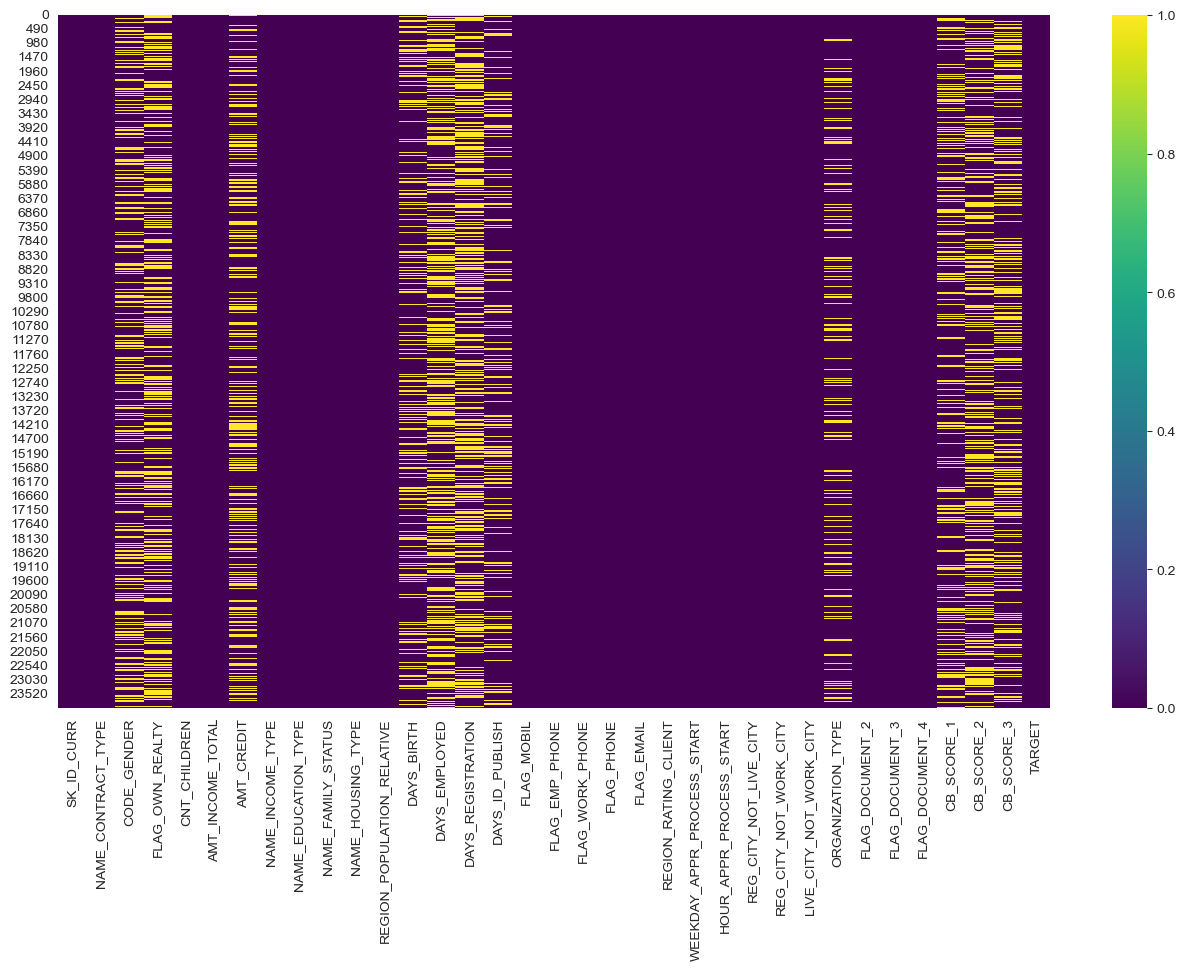

In [396]:
plt.figure(figsize=(16, 9))  # 가로 세로 비율 조정
sns.heatmap(df_adj_mv_2.isnull(), cmap='viridis')
plt.xticks(np.arange(df_adj_mv_2.shape[1])+0.5, df_adj_mv_2.columns.tolist(), rotation=90) # x축 레이블 설정
plt.show()

> #### <font color = lightseagreen> _패턴을 확인할 plot을 구성하였으나 결측치가 있는 컬럼간 패턴이 있는지 유무를 해당 plot으로 확인이 어려움_ </font>
> #### <font color = lightseagreen> _각 컬럼별 결측치 유형이 MCAR일거라 생각됨_ </font>

- #### Missing Indicator Method  

> 결측치(missing values)의 패턴을 분석하는 방법 중 하나. 이 방법은 각 변수(열)에 대해 결측값이 있는지 여부를 나타내는 새로운 이진 변수(binary variable)를 생성  
> 각 변수의 결측치 패턴을 빠르게 파악하거나, 어떤 변수가 결측치 발생과 가장 큰 관련성을 가지는지 확인하는데 유용하게 사용

In [397]:
# 결측치가 있는 컬럼들로만 구성된 데이터프레임
missing_cols = df_adj_mv_2.columns[df_adj_mv_2.isnull().any()].tolist()
df_with_missing_values = df_adj_mv_2[missing_cols]

In [398]:
def missing_indicator_method(df):
        # 각 컬럼별로 결측 여부를 나타내는 새로운 데이터 프레임 생성
    df_nan = df.isnull().astype(int)
    
    results = {}
    
    # 각 컬럼별로 다른 모든 변수들과의 상관 계수 계산
    for col in df.columns:
        corr_matrix = df_nan[[c for c in df.columns if c != col]].corrwith(df_nan[col]).abs()
        
        # 상관 계수가 유의미하게 큰 경우가 있는지 확인
        max_corr = corr_matrix.max()
        
        results[col] = max_corr < 0.05  # 임곗값은 실험적으로 설정
    
    return results

In [399]:
results = missing_indicator_method(df_with_missing_values)

for column, is_mcar in results.items():
    if is_mcar:
        print(f"{column} is likely MCAR")
    else:
        print(f"{column} is likely MAR or NMAR")

CODE_GENDER is likely MCAR
FLAG_OWN_REALTY is likely MCAR
AMT_CREDIT is likely MCAR
DAYS_BIRTH is likely MCAR
DAYS_EMPLOYED is likely MAR or NMAR
DAYS_REGISTRATION is likely MCAR
DAYS_ID_PUBLISH is likely MCAR
ORGANIZATION_TYPE is likely MAR or NMAR
CB_SCORE_1 is likely MCAR
CB_SCORE_2 is likely MCAR
CB_SCORE_3 is likely MCAR


> #### <font color = lightseagreen> _이 방법만으로 MCAR(Missing Completely At Random), MAR(Missing At Random), MNAR(Missing Not At Random) 등 구체적인 결측치 유형을 정확하게 분류하기 어려움_ </font>
> #### <font color = lightseagreen> _정확한 통계적 검증을 위해서는 Little's MCAR Test와 같은 공식적인 통계 검정 방법도 함께 사용_ </font>

- ####  Little's MCAR TEST 및 카이제곱 검정을 통한 결측치 유형 파악하기

- #### 테스트 과정  
> 1. 각 열에 대해 반복문을 실행하며, 해당 열에 결측치가 없으면 해당 열은 테스트에서 제외    
> 2. 해당 열의 데이터 유형이 수치형인지 확인  
> 3. 만약 수치형이라면 Little's MCAR 테스트를 실행  
  -> 주어진 변수의 결측값을 예측하는 선형 회귀 모델을 사용하여, 예측된 값과 실제 평균 사이의 제곱 오차 합을 계산. 이 값이 작다면 (즉, p-value가 크다면), 결측값은 MCAR일 가능성이 높음
> 4. 해당 열의 데이터 유형이 범주형인 경우 카이제곱 검정(chi-square test)를 실행  
  -> 카이제곱 검정은 두 범주형 변수 사이의 독립성을 검정하는 방법. 각 카테고리별로 결측치 여부(결측 있음/없음)를 비교하여 독립성 여부를 확인  
  -> p-value가 0.05보다 작으면 해당 칼럼의 결측치는 완전히 무작위로 발생하지 않았다고 가정할 수 있으므로 MAR 혹은 MNAR로 분류.
> 5. 각 컬럼에 대한 p-value와 Missingness Type(MCAR 혹은 MAR/MNAR) 정보를 결과 딕셔너리에 저장하고 반환

In [401]:
def mcar_test(df):
    results = {}
    
    for col in df.columns:
        if df[col].isnull().sum() == 0: # if no missing values in the column, skip the test.
            continue
            
        if np.issubdtype(df[col].dtype, np.number):
            # 수치형 변수에 대한 Little's MCAR 테스트
            
            other_cols = [c for c in df.columns if c != col and np.issubdtype(df[c].dtype, np.number)]
            missing_rows_in_col = df[col].isnull()

            # 결측치만 있는 경우 건너뛰기
            if missing_rows_in_col.sum() == len(df):
                results[col] = (None, "All values are missing")
                continue
                
            observed_data = df[~missing_rows_in_col][other_cols].select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())
            #observed_data = df[~missing_rows_in_col][other_cols].fillna(df.mean())
            
            model=LinearRegression()
            
            model.fit(observed_data,df[~missing_rows_in_col][col])
            
            predicted_missing_values = model.predict(df[missing_rows_in_col][other_cols].fillna(df.select_dtypes(include=[np.number]).mean()))
            #predicted_missing_values=model.predict(df[missing_rows_in_col][other_cols].fillna(df.mean()))
            
            squared_error_sum=np.sum((predicted_missing_values-df[col].mean())**2)
            
            numeric_df = df.select_dtypes(include=[np.number])
            chisq_val = squared_error_sum / (numeric_df.std()**2).sum()
    
            p_value=1-chi2.cdf(x=chisq_val,df=len(predicted_missing_values))
            
        else:
             # 범주형 변수에 대한 카이제곱 검정

            contingency_table = pd.crosstab(df[col], df.isnull().sum(axis=1) > 0)
            _, p_value, _, _ = chi2_contingency(contingency_table)

        # Missingness type determination based on p-value
        if p_value < 0.05:
            missingness_type = "MAR or MNAR"
        else:
            missingness_type = "MCAR"

        results[col] = (p_value, missingness_type)

    return results


# 데이터 로드 및 사용자 정의 인덱스 제거
df_adj_mv_3 = df_adj_mv_2.drop('SK_ID_CURR', axis=1)

results=mcar_test(df_adj_mv_3)

for col,result in results.items():
    p_val, missingness_type = result
    print(f"Column: {col}, p-value: {p_val}, Missingness Type: {missingness_type}")

Column: CODE_GENDER, p-value: 0.007147282327396265, Missingness Type: MAR or MNAR
Column: FLAG_OWN_REALTY, p-value: 0.22694682310451725, Missingness Type: MCAR
Column: AMT_CREDIT, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_BIRTH, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_EMPLOYED, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_REGISTRATION, p-value: 1.0, Missingness Type: MCAR
Column: DAYS_ID_PUBLISH, p-value: 1.0, Missingness Type: MCAR
Column: ORGANIZATION_TYPE, p-value: 0.0016631413314125445, Missingness Type: MAR or MNAR
Column: CB_SCORE_1, p-value: 1.0, Missingness Type: MCAR
Column: CB_SCORE_2, p-value: 1.0, Missingness Type: MCAR
Column: CB_SCORE_3, p-value: 1.0, Missingness Type: MCAR


> #### <font color = lightseagreen> __MAR (Missing At Random):__ _결측치가 다른 관찰된 변수에 의존적으로 발생하나, 결측치가 발생하는 변수의 실제 값 자체에는 의존적이지 않음_</font>  
> #### <font color = lightseagreen> __NMAR (Not Missing At Random):__ _결측치가 발생하는 변수의 실제 값에 의존적으로 발생_ </font>  
> #### <font color = lightseagreen> __MCAR (Missing Completely At Random):__ _원인이 전혀 없는 무작위로 결측된 데이터_  </font>  
> #### <font color = lightseagreen> _각 유형별 주요 처리방법은 다르나, <font color = red> 공통적으로 딥러닝 모델을 통해 결측치 대체가 가능함_  </font>   </font>  

> #### <font color = lightseagreen> 딥러닝을 사용한 결측치 대체의 근거:  </font>    
- 복잡한 관계 학습: 딥러닝 모델은 다른 대체 방법들보다 데이터 안의 복잡한 패턴과 상호작용을 더 잘 파악하고 학습  
- 비선형 패턴 학습: 전통적인 통계 기법들은 데이터의 비선형성을 잘 포착하지 못할 수 있는데, 딥러닝 모델은 이런 비선형 패턴도 잘 학습  
- 다변량 대체: 여러 변수의 결측치를 동시에 고려하고 대체  
- 유연성: 다양한 아키텍처와 학습 전략을 통해 딥러닝 모델을 데이터에 맞게 조절  
- 성능: 다른 대체 방법들과 비교할 때 딥러닝은 종종 더 나은 성능을 보여줌  
- 주의사항 : 24,000개 행의 데이터셋으로 딥러닝시 다소 과적합이 우려되나 dropout을 통해 과적합을 최소화하여 진행


### 1.6 결측치 대체(DL) <a id="s-1.6">

- #### 딥러닝을 통한 결측치 대체 진행

> #### 딥러닝을 적용할 데이터프레임 불러오기  
> #### 더 많은 학습 데이터 확보를 위해 널(Null)값이 아닌 XNA, Unknown으로 되어 있는 유효값들을 Null로 처리하지 않음.  
> #### 해당 유효값들을 Null로 처리시 학습대상이 아닌 예측대상이 되기 때문

- #### 원본 데이터 불러오기 / 식별키 제외

In [425]:
#data = data.replace(['NaN', 'nan', 'XNA','Unknown'], np.nan)
data = df.copy()
# data = data.replace(['XNA'], np.nan)
data['REGION_POPULATION_RELATIVE'] = data['REGION_POPULATION_RELATIVE'].astype('str')

In [426]:
# 'SK_ID_CURR' 컬럼 직접 제거
#? 즉 variance가 0인 컬럼은 모델 학습에 도움이 되지 않기에 FLAG_MOBIL 제거
data.drop(columns=['SK_ID_CURR','FLAG_MOBIL'], inplace=True)#,'FLAG_MOBIL'

- #### 딥러닝 Input 데이터 분류

In [427]:

numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

- #### 최종 결측치 컬럼 확인

In [428]:
# 결측값이 있는 행 선택하기
col_mv_list = data.columns[data.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_CREDIT 신용대출금액(USD)
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


- #### 패턴을 찾아 채우기

In [429]:

from scipy import stats
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            fill_value = df[col].mode()[0]
            #mode_result = stats.mode(df[col])
            #fill_value = mode_result.mode[0]
           
        elif fill_method == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

In [430]:
# 오기값 고려한 최종 결측치가 한개인 컬럼은 최빈값으로 대체
 
data = data.replace(['Unknown',117000000.0], np.nan)

fill_methods = {

    'NAME_FAMILY_STATUS': 'mode',
    'AMT_INCOME_TOTAL': 'median'
    
}

data = replace_missing_values(data,fill_methods)
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

- #### 변수 타입 변경

In [431]:
data = data.astype({'FLAG_EMP_PHONE': object , 'FLAG_WORK_PHONE': object, 'FLAG_PHONE': object, 'FLAG_EMAIL': object
                   , 'REG_CITY_NOT_LIVE_CITY': object , 'REG_CITY_NOT_WORK_CITY': object, 'LIVE_CITY_NOT_WORK_CITY': object, 'FLAG_DOCUMENT_2': object
                   , 'FLAG_DOCUMENT_3': object , 'FLAG_DOCUMENT_4': object, 'REGION_POPULATION_RELATIVE': object }) #'FLAG_MOBIL': object,

- #### 딥러닝 Input 데이터 분류

In [432]:
def columns_classification(data):
    # 주어진 데이터를 수치형, 범주형, 결측치가 있는 컬럼으로 분류하여 뱉어냄.
    
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].index.to_list()

    numeric_columns = numeric_columns.to_list()
    numeric_columns = [x for x in numeric_columns if x not in missing_values]
    numeric_columns

    categorical_columns = categorical_columns.to_list()
    categorical_columns = [x for x in categorical_columns if x not in missing_values]
    categorical_columns    
    print('total_columns : ' + str(len(data.columns)))
    
    print('numeric_columns : ' + str(len(numeric_columns)))
    print(numeric_columns)
    print('categorical_columns : '+ str(len(categorical_columns)))
    print(categorical_columns)
    print('missing_values : '+ str(len(missing_values)))
    print(missing_values)
    return numeric_columns,categorical_columns,missing_values
    
    

In [433]:
numeric_columns,categorical_columns,missing_values = columns_classification(data)

total_columns : 33
numeric_columns : 5
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 18
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4']
missing_values : 10
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']


- #### 딥러닝 예측함수 정의(범주형)

In [434]:
def fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 ):
    #fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER', 
    #                 layers=[128, 128, 64], dropout_rate=0.5, regularizer=tf.keras.regularizers.l1(0.001), 
    #                 optimizer='adam', epochs_val=30, batch_size_val=32):
    # ----- 
    
    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 성별 전용
    if target_col_val == 'CODE_GENDER':
        data_with_missing.loc[data_with_missing['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan
    if target_col_val == 'ORGANIZATION_TYPE':
        data_with_missing.loc[data_with_missing['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = np.nan
        
    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()



    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()
    
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    len(input_data_encoded)

    print(len(input_data_encoded))

    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]


    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_encoded.shape[1]
    
    output_dim = data_with_missing[target_col_val].nunique()
    print(output_dim)

    
    
    
    input_dim = input_data_encoded.shape[1]
    output_dim = data_with_missing[target_col_val].nunique()

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # LabelEncoder 객체 생성 및 학습 코드는 그대로 유지

    

    # 모델 훈련 코드는 그대로 유지

    # 결측치 예측 및 채우기 코드는 그대로 유지







    
    
    
    #model = tf.keras.Sequential([ #창석
    #tf.keras.layers.Input(shape=(input_dim,)),#창석
    #tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),#창석
    #tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),#창석
    #tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),#창석
    #tf.keras.layers.Dense(output_dim, activation='softmax')  # 선형 활성화 함수 사용#창석
    #])#창석
    
    #model.compile(optimizer='adam',#창석
    #          loss='categorical_crossentropy',#창석
    #          metrics=['accuracy'])#창석
    
    
    #model = tf.keras.Sequential([
    #    tf.keras.layers.Input(shape=(input_dim,)),
    #    tf.keras.layers.Dense(128, activation='relu'),
    #    tf.keras.layers.Dense(65, activation='relu'),
    #    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    #    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    #    tf.keras.layers.Dense(32, activation='relu'),
    #    tf.keras.layers.Dense(output_dim, activation='softmax')  # 선형 활성화 함수 사용
    #])
    
    
    


    #model.compile(optimizer='rmsprop',
    #              loss='categorical_crossentropy',
    #              metrics=['accuracy'])


    # 타겟 컬럼 추후 원래 레이블으로 표기하기 위함

    # LabelEncoder 객체 생성 및 학습
    encoder_target = LabelEncoder()
    encoder_target.fit(no_missing_data[target_column])
    integer_encoded_labels = encoder_target.transform(no_missing_data[target_column])
    integer_encoded_labels



    one_hot_train_labels = to_categorical(integer_encoded_labels)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, one_hot_train_labels, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    #early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 검증 데이터 셋 분류 및 과적합 방지 코드는 그대로 유지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val, verbose=2, callbacks=[early_stopping_cb])
    

    
    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    filled_values = predicted_values.squeeze()


    original_label=np.argmax(filled_values, axis=1)
    predicted_labels_string = encoder_target.inverse_transform(original_label)

    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = predicted_labels_string


    print(data_with_fill.loc[missing_data_index, target_column].head())
    return data_with_fill
    

- #### 딥러닝 예측함수 정의(수치형)

In [435]:
from tensorflow.keras.regularizers import l2

def fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_2' ,epochs_val=30, batch_size_val=32 ):

    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()


    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()
    
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    len(input_data_encoded)


    print(len(input_data_encoded))

    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]


    print(len(train_data_scaled))

    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_encoded.shape[1]




    #model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(input_dim,)),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(65, activation='relu'),
    #tf.keras.layers.Dropout(0.5),  # Dropout 추가
    #tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #tf.keras.layers.Dropout(0.5),  # Dropout 추가
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dense(1, activation='linear')  # 선형 활성화 함수 사용
    #])
       
    #model.compile(optimizer='adam',
    #              loss='mean_squared_error',
    #              metrics=['mean_squared_error'])
    
    #model = tf.keras.Sequential([ # 창석 230918
    #    tf.keras.layers.Input(shape=(input_dim,)), # 창석 230918
    #    tf.keras.layers.Dense(256, activation='relu'), # 창석 230918
    #    tf.keras.layers.Dense(128, activation='relu'), # 창석 230918
    #    tf.keras.layers.Dropout(0.5), # 창석 230918
    #    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001,l2=0.001)), # 창석 230918
    #    tf.keras.layers.Dropout(0.5), # 창석 230918
    #    tf.keras.layers.Dense(32, activation='relu'), # 창석 230918
    #    tf.keras.layers.Dense(1) # 창석 230918
    #]) # 창석 230918
    



    #model.compile(optimizer=tf.optimizers.Adam(lr=0.0005), #창석 230918
    #              loss='mean_squared_error', #창석 230918
    #              metrics=['mean_squared_error']) #창석 230918
    
    
    
    
    # 기존 준이 모델 -
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # 선형 활성화 함수 사용
    ])

    model.compile(optimizer='adam',
          loss='mean_squared_error',
          metrics=['mean_squared_error'])

    # 모델 구성

    # 모델 생성
    #model = Sequential([
    #Dense(128, activation='relu', input_shape=(input_dim,)),
    #Dense(64, activation='relu'),
    #Dropout(0.5),  
    #Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    #Dropout(0.5),
    #Dense(1, activation='linear')  
    #])

    # 모델 컴파일
    #model.compile(optimizer=Adam(learning_rate=0.0005),
    #              loss='mean_squared_error',
    #              metrics=['mean_squared_error'])




    # Prepare target data
    target_data = no_missing_data[target_column].values.reshape(-1, 1)
    # Scale target data using a new scaler
    target_scaler = StandardScaler()
    target_data_scaled = target_scaler.fit_transform(target_data)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, target_data_scaled, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    #early_stopping_cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # 창석 230918
    
    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val,  verbose=2,callbacks=[early_stopping_cb])


    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    predicted_values_orgin = target_scaler.inverse_transform(predicted_values)
    filled_values = predicted_values_orgin.squeeze()


    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = filled_values
    data_with_fill.loc[missing_data_index, target_column]


    # 그래프로 분포가 어떻게 그려지는지 한번 확인함.

    result = data_with_fill.loc[missing_data_index, target_column]
    OG_result = data_with_fill.loc[:, target_column]

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

    result.hist(bins=30, ax=axs[0])  
    axs[0].set_title("Predict "+result.name)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')

    OG_result.hist(bins=30, ax=axs[1])  
    axs[1].set_title("Origin "+OG_result.name)
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust the padding between and around the subplots.
    plt.show()

    return data_with_fill
    

- #### 수정----딥러닝 예측함수 정의(수치형)

In [436]:

def fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_2', epochs_val=30, batch_size_val=32):
    
    data_with_missing = data.copy()
    target_column = target_col_val
    input_numeric_columns = numeric_columns[1:]
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()
    
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])
    
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]

    input_dim = input_data_encoded.shape[1]

    # Objective function for hyperopt optimization
    def objective(params):
        model = Sequential([
            Dense(int(params['neurons']), activation='relu', input_shape=(input_dim,)),
            Dropout(params['dropout']),
            Dense(int(params['neurons']), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            Dropout(params['dropout']),
            Dense(int(params['neurons'] // 2), activation='relu'),
            Dense(1, activation='linear')
        ])
        
        model.compile(optimizer=params['optimizer'],
                      loss='mean_squared_error',
                      metrics=['mean_squared_error'])
    
        early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs_val, batch_size=batch_size_val, verbose=0, callbacks=[early_stopping_cb])
        
        val_loss = model.evaluate(X_val, y_val, verbose=0)
        return {'loss': val_loss[0], 'status': STATUS_OK}

    space = {
        'optimizer': hp.choice('optimizer', ['adam', 'sgd']),
        'neurons': hp.quniform('neurons', 32, 256, 1),
        'dropout': hp.uniform('dropout', 0, 0.5)
    }
    
    target_data = no_missing_data[target_column].values.reshape(-1, 1)
    target_scaler = StandardScaler()
    target_data_scaled = target_scaler.fit_transform(target_data)
    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, target_data_scaled, test_size=0.2, random_state=42)

    trials = Trials()
    best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

    best_neuron = int(best['neurons'])
    best_dropout = best['dropout']
    optimizer = ['adam', 'sgd'][best['optimizer']]

    model = Sequential([
        Dense(best_neuron, activation='relu', input_shape=(input_dim,)),
        Dropout(best_dropout),
        Dense(best_neuron, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(best_dropout),
        Dense(best_neuron // 2, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs_val, batch_size=batch_size_val, verbose=2, callbacks=[early_stopping_cb])

    
    missing_data_index = data_with_missing[data_with_missing[target_column].isnull()].index

    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    
    predicted_values = model.predict(missing_data)
    predicted_values_orgin = target_scaler.inverse_transform(predicted_values)
    filled_values = predicted_values_orgin.squeeze()

    data_with_fill = data.copy()
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = filled_values

    data_with_fill.loc[missing_data_index, target_column]


    # 그래프로 분포가 어떻게 그려지는지 한번 확인함.

    result = data_with_fill.loc[missing_data_index, target_column]
    OG_result = data_with_fill.loc[:, target_column]

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

    result.hist(bins=30, ax=axs[0])  
    axs[0].set_title("Predict "+result.name)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')

    OG_result.hist(bins=30, ax=axs[1])  
    axs[1].set_title("Origin "+OG_result.name)
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust the padding between and around the subplots.
    plt.show()

    return data_with_fill
    


- #### 결측치 채우기  

> #### 데이터를 채우면서, 예측값 여부 컬럼을 추가적으로 생성함. 예측한 컬럼을 다음예측에 사용했을 경우에도 성능상 큰 차이는 없음

total_columns : 33
numeric_columns : 5
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 18
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4']
missing_values : 10
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
2
Epoch 1/50
423/423 - 1s - loss: 0.7007 - accuracy: 0.6449 - val_loss: 0.5710 - val_accuracy: 0.7025 - 756ms/epoch - 2ms/step
Epoch 2/50
423/423 - 0s - loss: 0.5720 - accuracy: 0.7079 - val_loss: 0.5564 - val_accuracy: 0.7131 - 412ms/epoch - 974us/step
Epoch

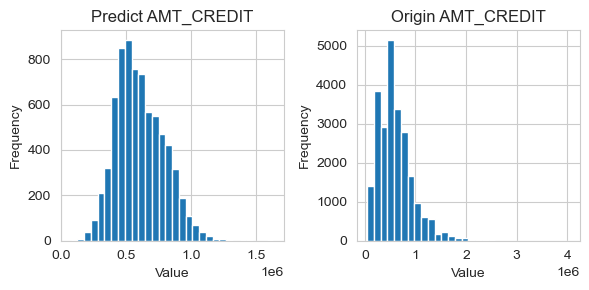

total_columns : 36
numeric_columns : 6
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 23
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag']
missing_values : 7
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|█████████| 50/50 [05:32<00:00,  6.65s/trial, best loss: 0.5131381750106812]
Epoch 1/50
482/482 - 0s - loss: 0.6401 - mean_squared_error: 0.6085 - val_loss: 0.5469 - val

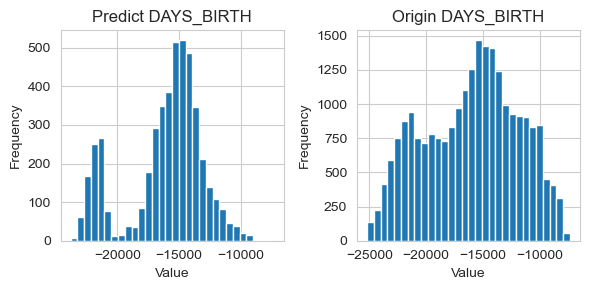

total_columns : 37
numeric_columns : 7
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 24
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'DAYS_BIRTH_predicted_flag']
missing_values : 6
['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|█████████| 50/50 [02:44<00:00,  3.28s/trial, best loss: 0.7926467061042786]
Epoch 1/50
347/347 - 0s - loss: 0.9236 - mean_squared_error: 0.

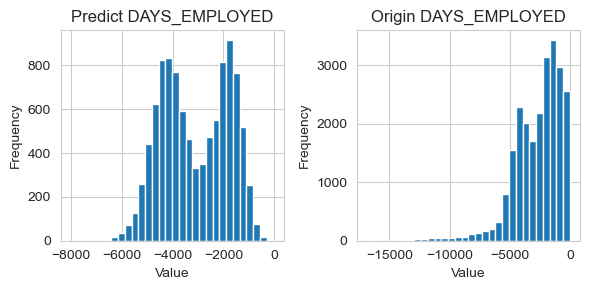

total_columns : 38
numeric_columns : 8
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 25
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag']
missing_values : 5
['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|██████████| 50/50 [03:51<00:00,  4.62s/trial, best loss: 0.835776686668396]
Epoch 1/50
357/357 - 0s - loss:

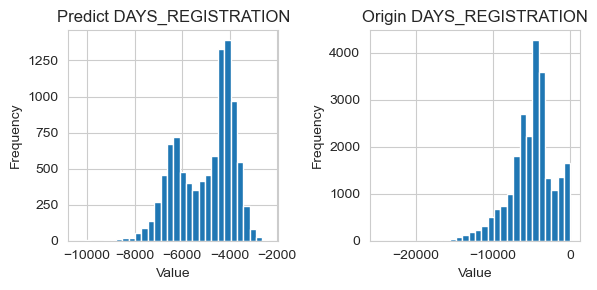

total_columns : 39
numeric_columns : 9
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 26
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag']
missing_values : 4
['DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|█████████| 50/50 [05:26<00:00,  6.52s/trial, best loss: 0.6179068684577

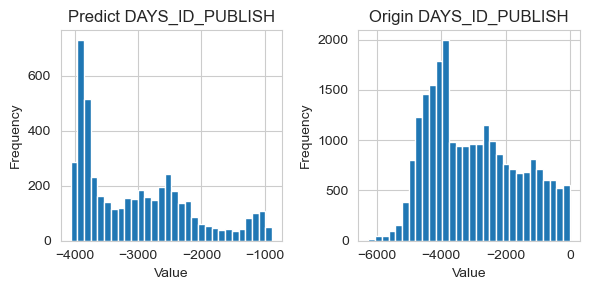

total_columns : 40
numeric_columns : 10
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 27
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag']
missing_values : 3
['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
100%|█████████| 50/50 [04:05<00:00,  4.91

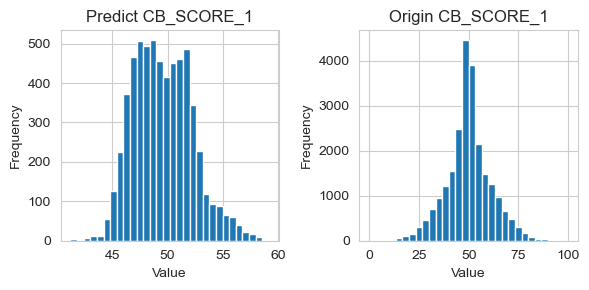

total_columns : 41
numeric_columns : 11
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'TARGET']
categorical_columns : 28
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_predicted_flag']
missing_values : 2
['CB_SCORE_2', 'CB_SCORE_3']
100%|███████

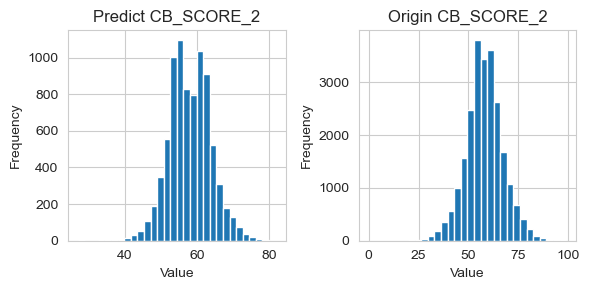

total_columns : 42
numeric_columns : 12
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'TARGET']
categorical_columns : 29
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_predicted_flag', 'CB_SCORE_2_predicted_flag']
missing_values : 

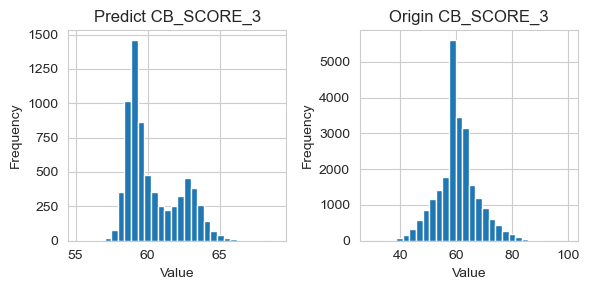

In [437]:
# 예측변수 다음예측에 사용
numeric_columns,categorical_columns,missing_values = columns_classification(data)
FILLED_DATA =fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=50, batch_size_val=32 )
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='FLAG_OWN_REALTY' ,epochs_val=50, batch_size_val=32 )


FILLED_DATA.loc[FILLED_DATA['DAYS_EMPLOYED'] == 365243.0, [ 'DAYS_EMPLOYED']]  = np.nan


for i in range(len(missing_values)-1):
    numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
    FILLED_DATA =fill_numeric(FILLED_DATA, numeric_columns, categorical_columns, target_col_val=missing_values[0] ,epochs_val=50, batch_size_val=32 )

 

In [438]:
# OG_TYPE 예측 
FILLED_DATA = FILLED_DATA.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

FILLED_DATA = FILLED_DATA.astype({'FLAG_EMP_PHONE': object , 'FLAG_WORK_PHONE': object, 'FLAG_PHONE': object, 'FLAG_EMAIL': object
                   , 'REG_CITY_NOT_LIVE_CITY': object , 'REG_CITY_NOT_WORK_CITY': object, 'LIVE_CITY_NOT_WORK_CITY': object, 'FLAG_DOCUMENT_2': object
                   , 'FLAG_DOCUMENT_3': object , 'FLAG_DOCUMENT_4': object, 'REGION_POPULATION_RELATIVE': object })

numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='ORGANIZATION_TYPE' ,epochs_val=50, batch_size_val=32 )

total_columns : 43
numeric_columns : 13
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 28
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_predicted_flag', 'CB_SCORE_2_predicted_flag', 'CB_SCORE_3_predicted_flag']
missing_values : 2
['REGI

> #### _<font color = lightseagreen> ORGANIZATION_TYPE 범주형 변수의 클래스가 80개 이상일 경우, 30%의 정확도는 무작위 추측보다는 훨씬 좋음. 무작위 추측의 경우, 정확도는 약 1.25% (100% / 80)임 그러므로, 30%의 정확도는 이에 비해 상당히 좋은 결과로 판단됨 <font>_

- #### 결측치채운 최종 dataset 

> #### 기존 결측치 여부를 판별하는 컬럼 추가

In [439]:
FILLED_DATA.shape

(24000, 44)

In [440]:
FILLED_DATA.head(15)

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0          Cash loans           M               Y             0   
1     Revolving loans           F               Y             0   
2          Cash loans           M               N             0   
3          Cash loans           M               N             2   
4          Cash loans           M               Y             0   
5          Cash loans           M               Y             0   
6          Cash loans           F               Y             2   
7          Cash loans           F               Y             2   
8          Cash loans           M               N             1   
9          Cash loans           F               N             0   
10         Cash loans           F               Y             0   
11         Cash loans           F               N             0   
12         Cash loans           M               Y             0   
13         Cash loans           F               Y             0   
14         Cash loans           F               N             1   

    AMT_INCOME_TOTAL    AMT_CREDIT      NAME_INCOME_TYPE  \
0           202500.0  6.451991e+05               Working   
1            67500.0  1.350000e+05               Working   
2           108000.0  5.096025e+05               Working   
3           135000.0  5.964066e+05               Working   
4           202500.0  6.041520e+05               Working   
5           360000.0  1.506816e+06               Working   
6           225000.0  3.140550e+05  Commercial associate   
7           202500.0  7.963965e+05               Working   
8           126000.0  3.270240e+05               Working   
9           126000.0  2.636865e+05             Pensioner   
10          225000.0  8.910720e+05             Pensioner   
11          112500.0  5.355000e+05               Working   
12          171000.0  6.836297e+05               Working   
13           90000.0  3.706290e+05  Commercial associate   
14          450000.0  4.074345e+05  Commercial associate   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
1   Secondary / secondary special  Single / not married  House / apartment   
2   Secondary / secondary special               Married  House / apartment   
3   Secondary / secondary special               Married  House / apartment   
4   Secondary / secondary special               Married  House / apartment   
5   Secondary / secondary special               Married  House / apartment   
6                Higher education               Married  House / apartment   
7                Higher education               Married  House / apartment   
8   Secondary / secondary special  Single / not married  House / apartment   
9   Secondary / secondary special               Married  House / apartment   
10  Secondary / secondary special               Married  House / apartment   
11  Secondary / secondary special             Separated  House / apartment   
12  Secondary / secondary special               Married  House / apartment   
13  Secondary / secondary special               Married  House / apartment   
14               Higher education        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801  -9461.000000    -637.000000       -3648.000000   
1                         NaN -19046.000000   -4562.294922       -4260.000000   
2                    0.018634 -12931.000000   -1620.695679       -4413.617188   
3                    0.026392 -11286.000000    -746.000000        -108.000000   
4                    0.009175 -17166.634766    -475.000000       -5653.596191   
5                    0.010006 -18264.000000   -9523.000000       -5504.000000   
6                    0.006629 -10473.000000   -1392.000000       -2025.000000   
7                    0.008019 -15909.000000   -2444.441895       -3134.0

In [441]:
# 저장하기

import pickle

# 데이터를 pickle 파일로 저장
file_path = "filled_data_vf.pkl"
with open(file_path, "wb") as file:
    pickle.dump(FILLED_DATA, file)


In [442]:
# 불러오기

# pickle 파일 불러오기
file_path = "filled_data_vf.pkl"
with open(file_path, "rb") as file:
    FILLED_DATA = pickle.load(file)

- #### 딥러닝 예측함수 정의(수치형)

## 2. 데이터 시각화  <a id="s-2">

1. 변수 간 상관 관계: 변수들 사이의 상관 관계를 조사하여 어떤 변수가 다른 변수와 연관되어 있는지 파악. 상관 행렬(correlation matrix), 산점도(scatter plot), 히트맵(heatmap) 등을 사용하여 시각화.
2. 시각화: 그래프나 차트를 생성하여 데이터 패턴과 인사이트를 시각적으로 파악. 막대 그래프(bar plot), 히스토그램(histogram), 상자 그림(box plot), 선 그래프(line plot), 산점도(scatter plot) 등 다양한 시각화 기법이 활용.
3. 가설 설정 및 검증: EDA 결과를 바탕으로 가설(Hypothesis)을 설정하고 검증하는 단계로 진행.
4. EDA는 독립적인 분석 단계로서만 수행되는 것이 아니라 전체 데이터 과학 프로세스에서 반복적으로 활용. EDA 결과에 따라 추가적인 전처리 작업이나 모델링 방법 선택에 영향. 탐색적 데이터 분석은 주어진 문제에 대한 인사이트 발견과 잠재된 문제 해결 방법 동일성 발견 및 가정 검증 가능성 제공하여 실전 모델링 단게에서 유용.

### 2-1. 데이터 유형 구분  <a id="s-2.1">

In [31]:
import pickle 

In [32]:
# 불러오기
# pickle 파일 불러오기
file_path = "C:/Users/mlosv/Downloads/23.08.22 데이터분석경진대회/filled_data_vf.pkl"
with open(file_path, "rb") as file:
    FILLED_DATA = pickle.load(file)

In [33]:
data1 = FILLED_DATA.copy()
#data1.head()
data1.dtypes

NAME_CONTRACT_TYPE                            object
CODE_GENDER                                   object
FLAG_OWN_REALTY                               object
CNT_CHILDREN                                   int64
AMT_INCOME_TOTAL                             float64
AMT_CREDIT                                   float64
NAME_INCOME_TYPE                              object
NAME_EDUCATION_TYPE                           object
NAME_FAMILY_STATUS                            object
NAME_HOUSING_TYPE                             object
REGION_POPULATION_RELATIVE                   float64
DAYS_BIRTH                                   float64
DAYS_EMPLOYED                                float64
DAYS_REGISTRATION                            float64
DAYS_ID_PUBLISH                              float64
FLAG_EMP_PHONE                                object
FLAG_WORK_PHONE                               object
FLAG_PHONE                                    object
FLAG_EMAIL                                    

In [220]:
#data1['TARGET'] = data1['TARGET'].astype(str)
#data1['HOUR_APPR_PROCESS_START'] = data1['HOUR_APPR_PROCESS_START'].astype(str)

In [41]:
normal_categorical_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                               'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4']
long_categorical_features = ['ORGANIZATION_TYPE']
time_features = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
key_features = ['SK_ID_CURR','FLAG_MOBIL'] # 무의미한 식별키 및 단일값 컬럼은 제외
target_features = ['TARGET']
flag_features =['CODE_GENDER_predicted_flag',
 'FLAG_OWN_REALTY_predicted_flag',
 'AMT_CREDIT_predicted_flag',
 'REGION_POPULATION_RELATIVE_predicted_flag',
 'DAYS_BIRTH_predicted_flag',
 'DAYS_EMPLOYED_predicted_flag',
 'DAYS_REGISTRATION_predicted_flag',
 'DAYS_ID_PUBLISH_predicted_flag',
 'CB_SCORE_1_predicted_flag',
 'CB_SCORE_2_predicted_flag',
 'CB_SCORE_3_predicted_flag',
 'ORGANIZATION_TYPE_predicted_flag']
# Combine all non-numerical features into one list
non_numerical_features = normal_categorical_features +long_categorical_features +time_features + key_features + target_features + flag_features

# Select numerical features by excluding non-numerical ones
numerical_features = [col for col in data1.columns if col not in non_numerical_features]
numerical_features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

- #### 시각화 자료 내 텍스트 한글화

In [34]:
plt.rcParams['font.family'] = 'NanumGothic' #'AppleGothic'

### 2-2. 타겟변수 파악  <a id="s-2.2">

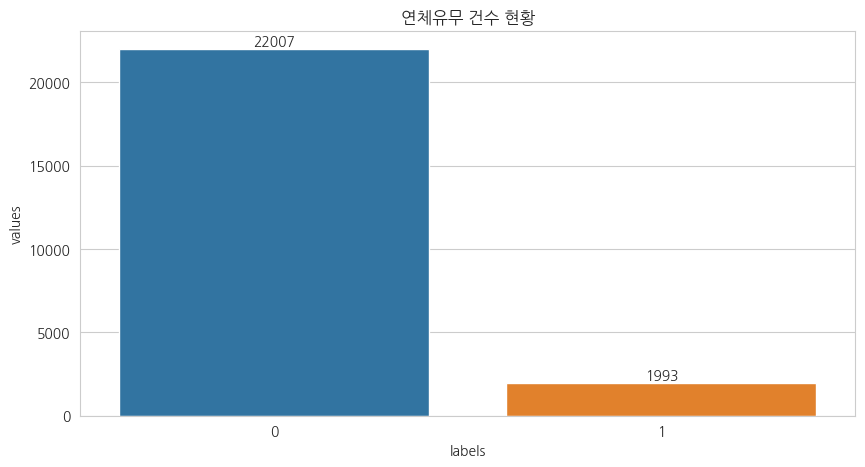

In [281]:
temp = data1["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize=(10, 5))
plt.title('연체유무 건수 현황')  # 'Payment Delayed - train data'
sns.set_color_codes("pastel")
ax = sns.barplot(x='labels', y="values", data=df)

# Add count values to the bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()

> #### _<font color = lightseagreen>  0에 해당되는 계좌 : 대출분할 지불이 한번이라도 지연되지 않은 정상 계좌 건. </font>_
> #### _<font color = lightseagreen>  1에 해당되는 계좌 : 지불 지연이 한번이라도 발생된 계좌 건 </font>_  
> #### _<font color = lightseagreen>  각각 계좌건의 상태 별로 특정 변수들과 비추었을때 분포가 어떠한지 파악할 필요가 있음 </font>_

### 2-3. 연체여부별 범주형 변수 분포 파악 <a id="s-2.3">

- #### Bar plot (count 및 타겟 여부 ratio) - 범주형 컬럼에 적용

In [104]:
def plot_stats_v(df, feature_list):
    nrows = len(feature_list)
    for i, feature in enumerate(feature_list):

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

        category_order = df[feature].value_counts().index.tolist()
        plt.xticks(rotation=45)

        # 변경된 팔레트 순서: ['skyblue', 'orange']
        count_plot = sns.countplot(x=feature,
                                   hue='TARGET', data=df,
                                   order=category_order,
                                   ax=ax[0], palette=['skyblue', 'orange'])


        # 숫자를 추가하기 위한 반복문
        for rect in count_plot.patches:
            height = rect.get_height()
            width = rect.get_width()
            x_coord = rect.get_x()
            y_coord = height + 5

            # 막대 위에 숫자 표시
            count_plot.annotate(f'{int(height)}', (x_coord + width/2, y_coord),
                                ha='center', va='bottom')
        
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
        ax[0].set_title(f'{feature}({column_info[feature]}) 도수분포표')
        ax[0].set_xlabel(' ')
        ax[0].set_ylabel(' ')

        df_grouped = df.groupby([feature])['TARGET'].value_counts(normalize=True).rename('percentage(%)').reset_index()
        df_grouped['percentage(%)'] = df_grouped['percentage(%)'] * 100

        bar_chart_df = pd.DataFrame(columns=['Category', 'Target_0_Percentage', 'Target_1_Percentage'])

        for j, category in enumerate(category_order):
            temp_df = df_grouped[df_grouped[feature] == category]

            if df['TARGET'].dtype == 'int64':
                target_0_percentage_values = temp_df[temp_df['TARGET'] == 0]['percentage(%)'].values 
                target_1_percentage_values = temp_df[temp_df['TARGET'] == 1]['percentage(%)'].values 
            else:
                target_0_percentage_values = temp_df[temp_df['TARGET'] == '0']['percentage(%)'].values 
                target_1_percentage_values = temp_df[temp_df['TARGET'] == '1']['percentage(%)'].values 

            target_0_percentage = target_0_percentage_values[0] if len(target_0_percentage_values) > 0 else 0
            target_1_percentage = target_1_percentage_values[0] if len(target_1_percentage_values) > 0 else 100 - target_0_percentage

            bar_chart_df.loc[j] = [category, target_0_percentage, target_1_percentage]

        category_order2 = df[feature].value_counts().index.tolist()[::-1]

        bar_chart_sorted = bar_chart_df.set_index('Category').loc[category_order].reset_index()
        bar_chart_sorted2 = bar_chart_df.set_index('Category').loc[category_order2].reset_index()

        bars = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_0_Percentage"], color='skyblue')
        bars2 = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_1_Percentage"], bottom=bar_chart_sorted["Target_0_Percentage"], color='orange')

        for bar in bars2:
            height = bar.get_height()
            width = bar.get_width()
            x_coord = bar.get_x() + width / 2
            y_coord = 100
            ax[1].annotate(f'{int(height)}%', (x_coord, y_coord),
                           ha='center', va='bottom')

        if set(bar_chart_sorted['Category'].unique()).issubset({0, 1}):
            plt.xticks([0, 1])

        ax[1].set_title(f'{feature}({column_info[feature]}) 범주별 연체율')
        ax[1].set_xlabel(' ')
        ax[1].set_ylabel(' ')

    plt.tight_layout(pad=3.03)
    plt.show();



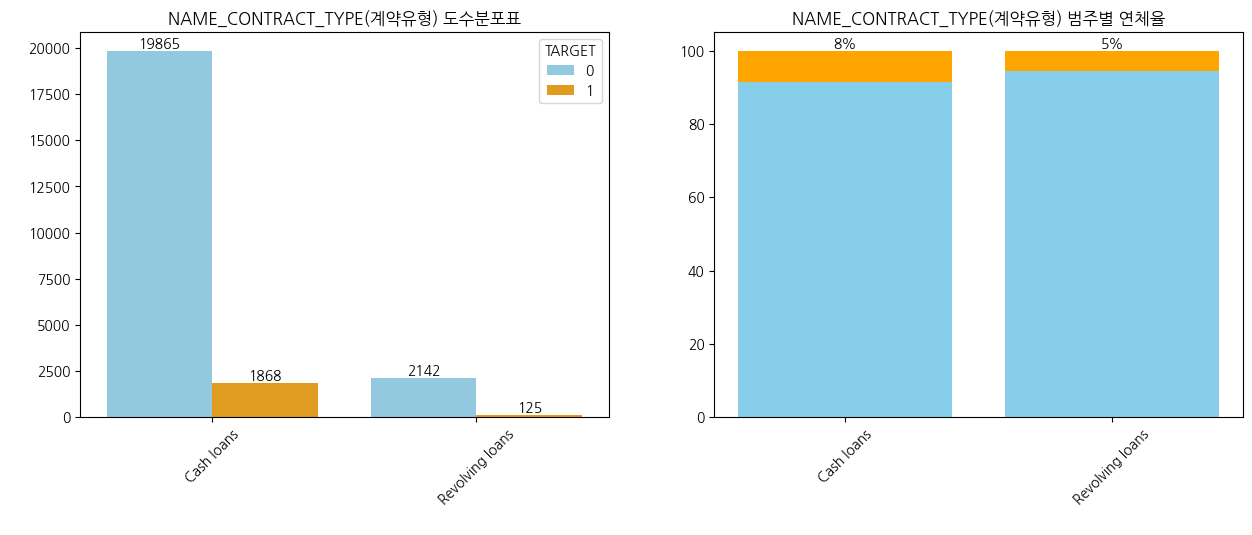

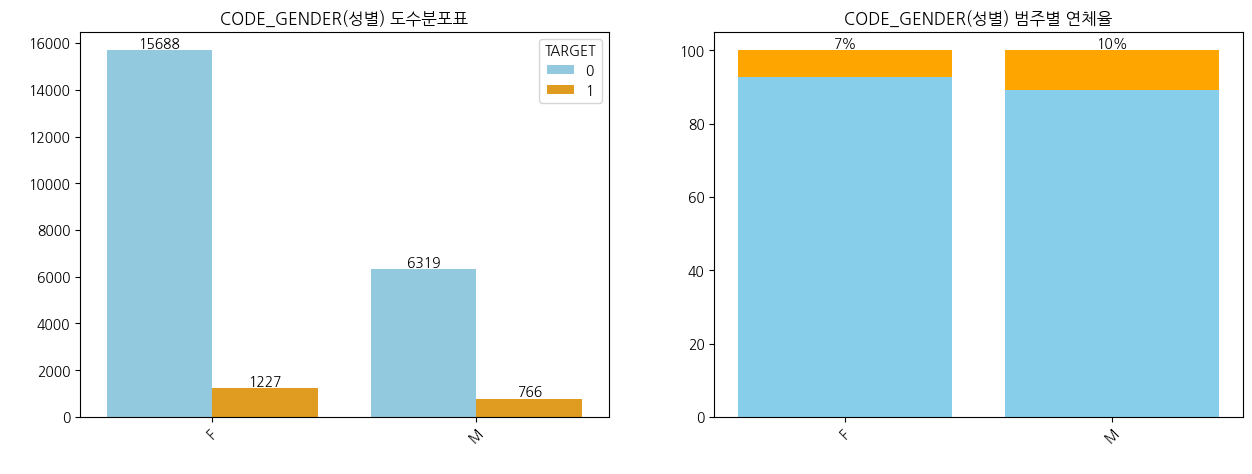

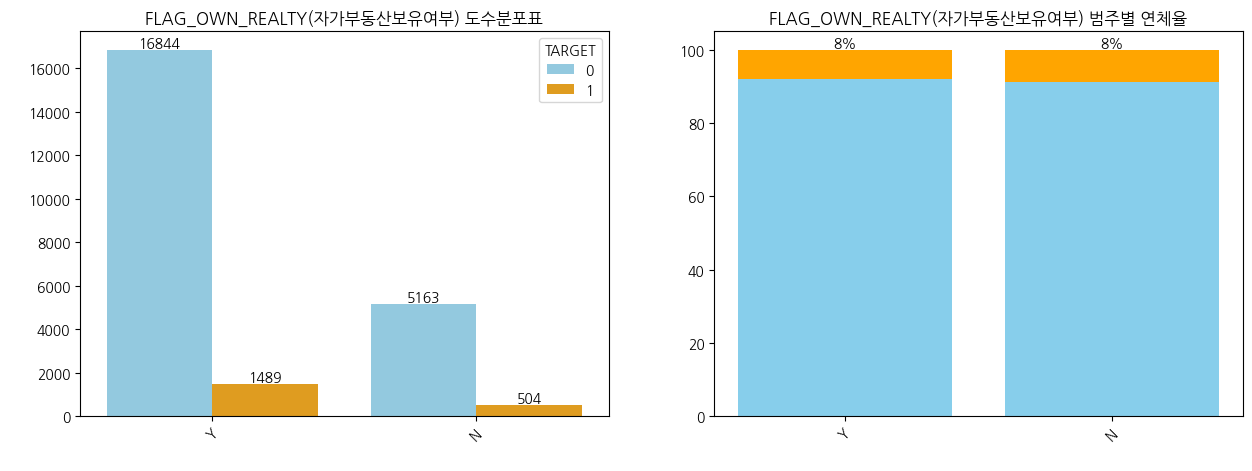

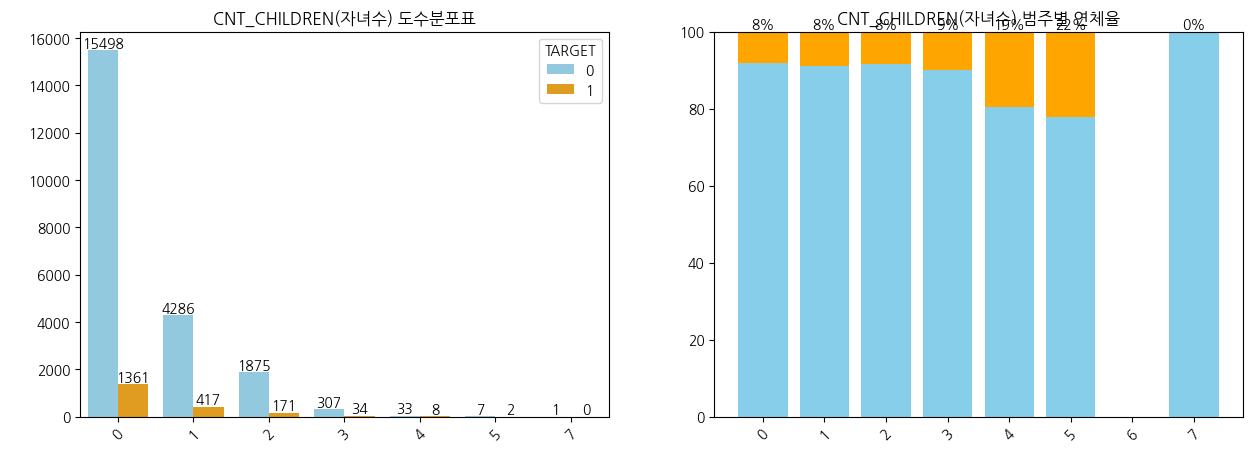

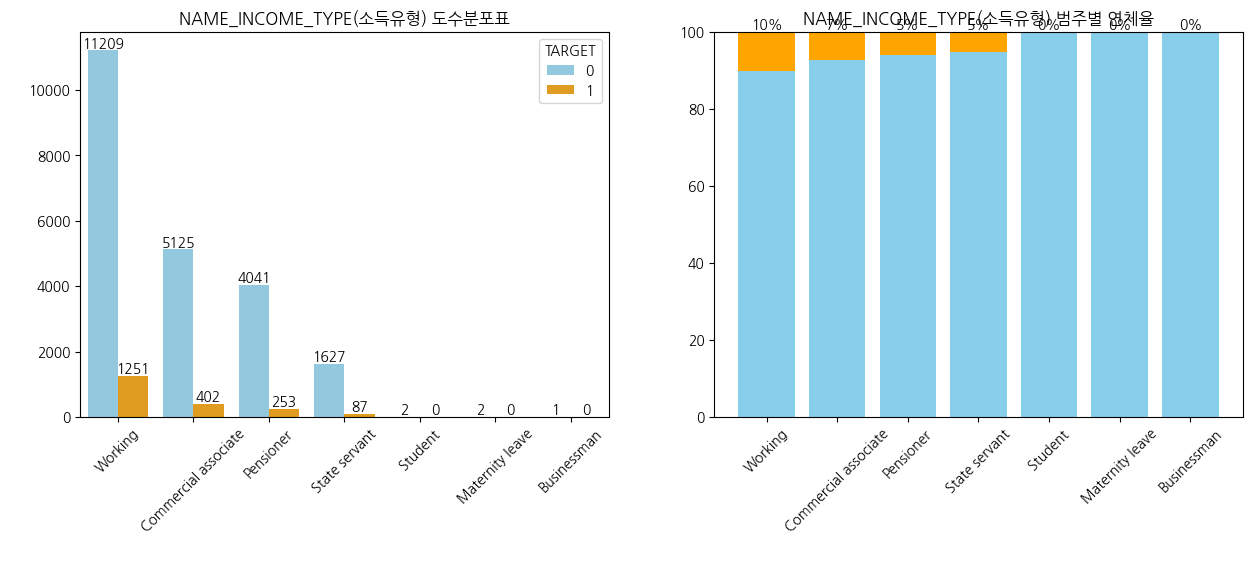

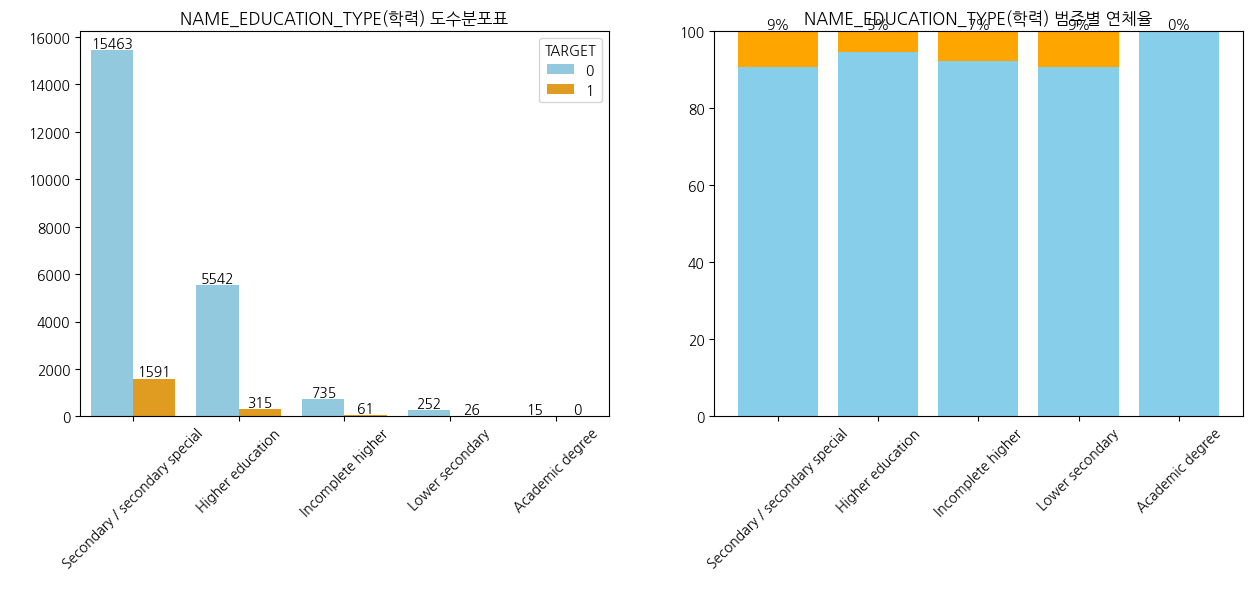

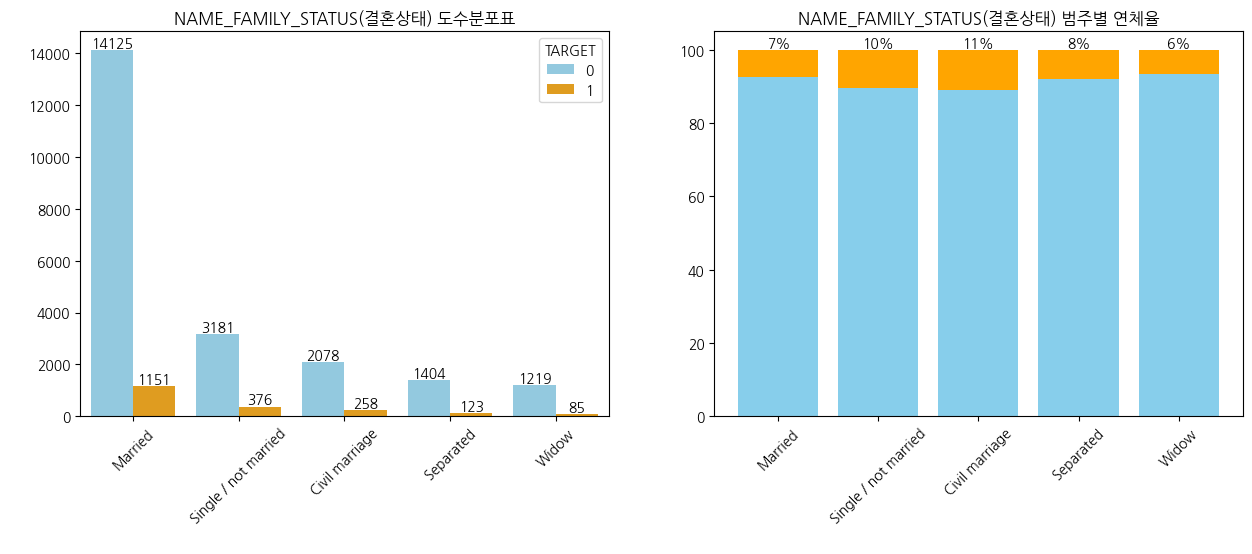

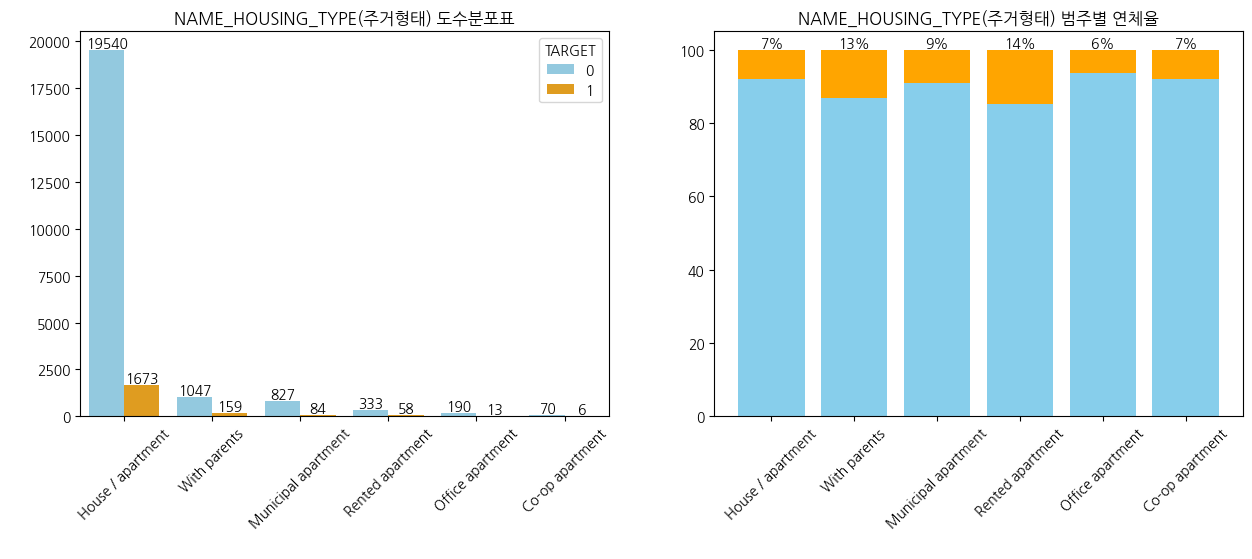

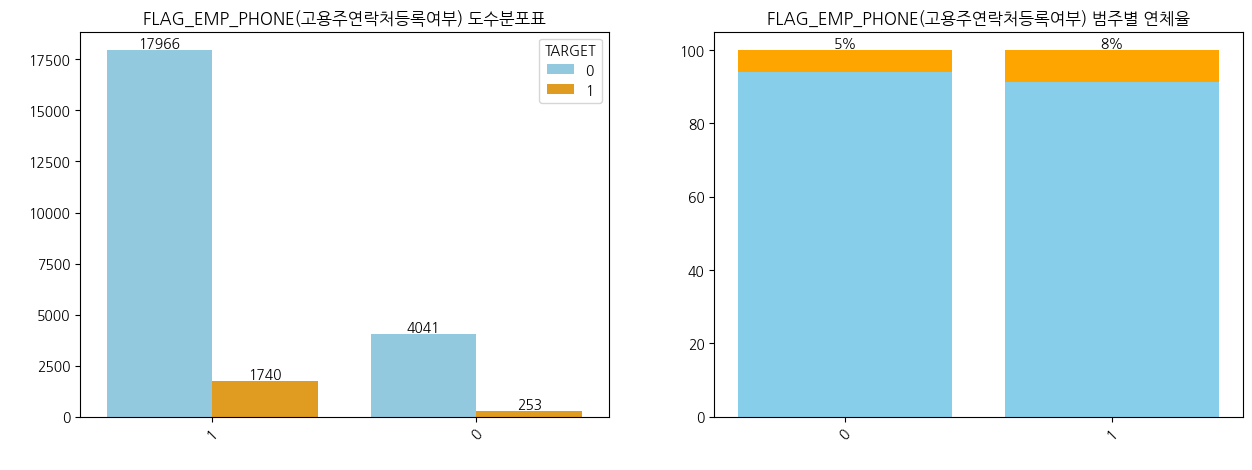

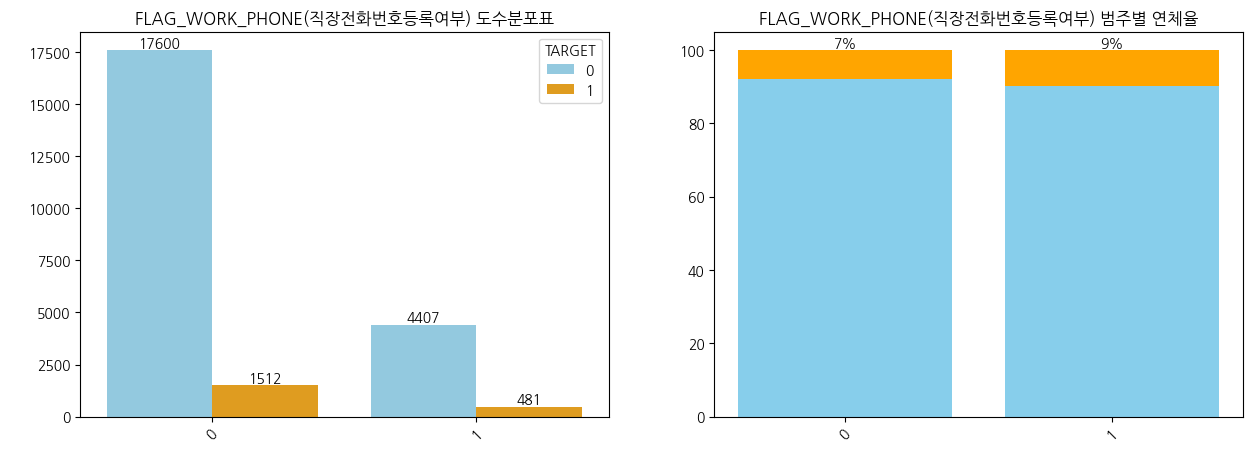

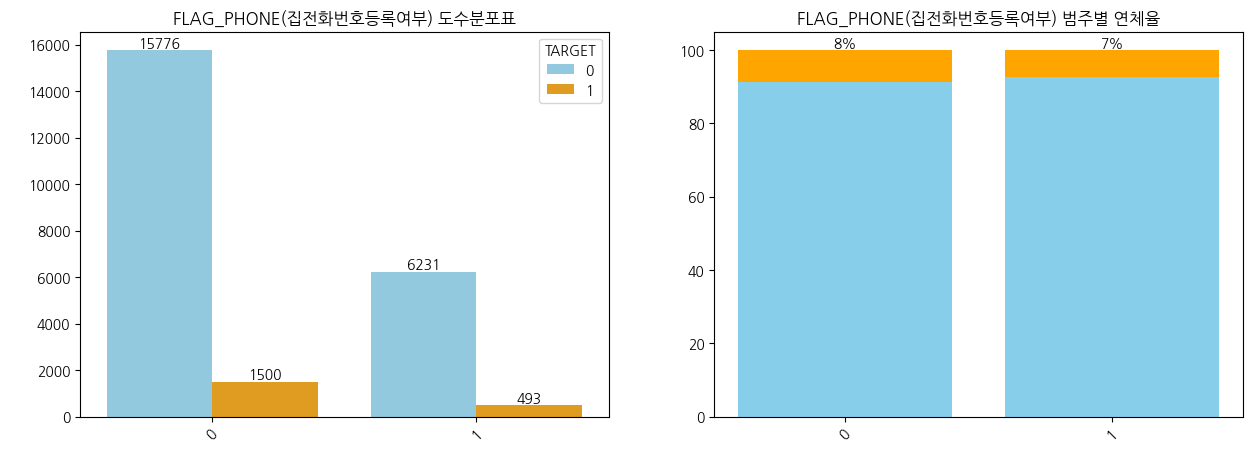

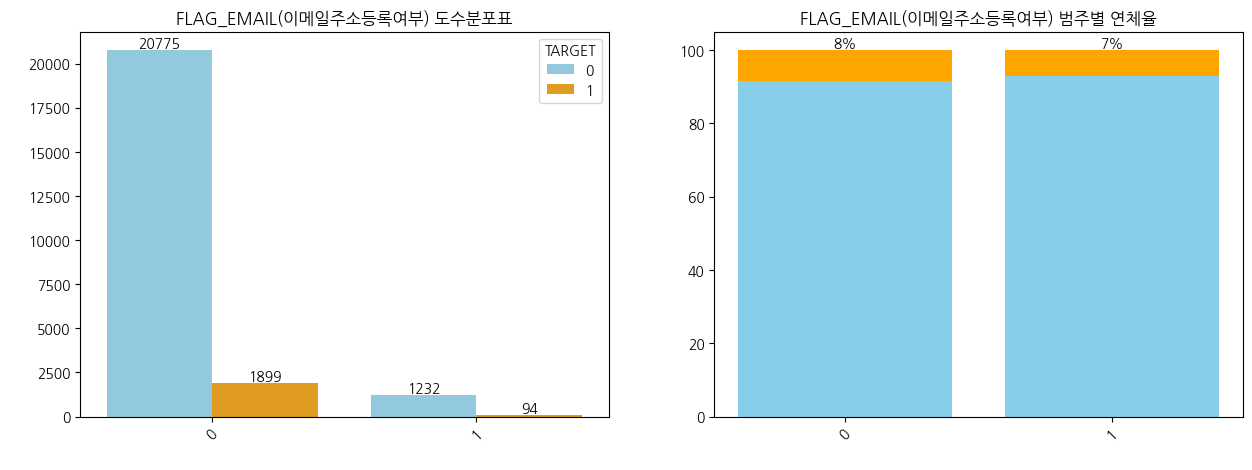

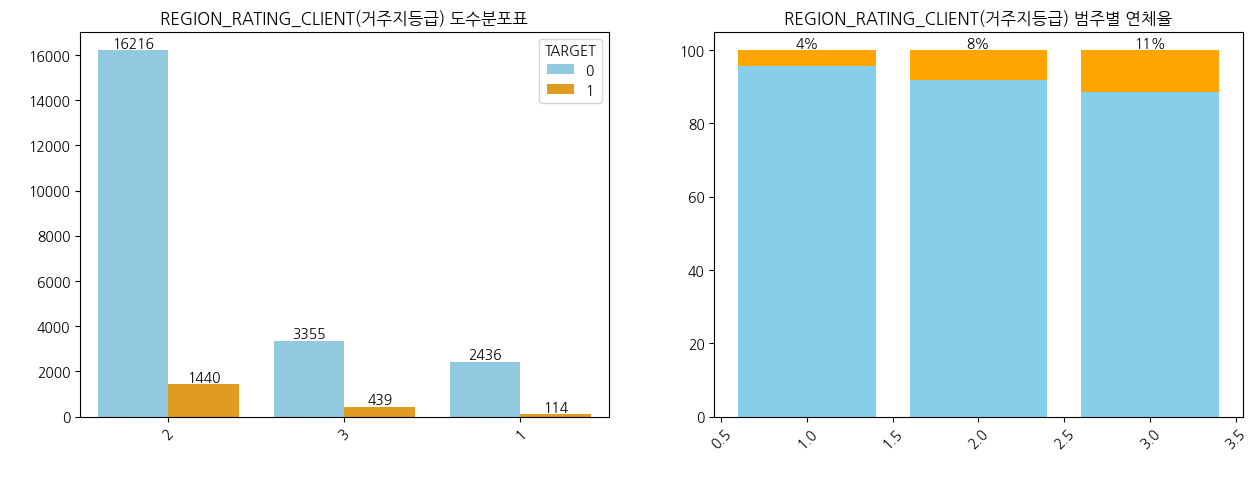

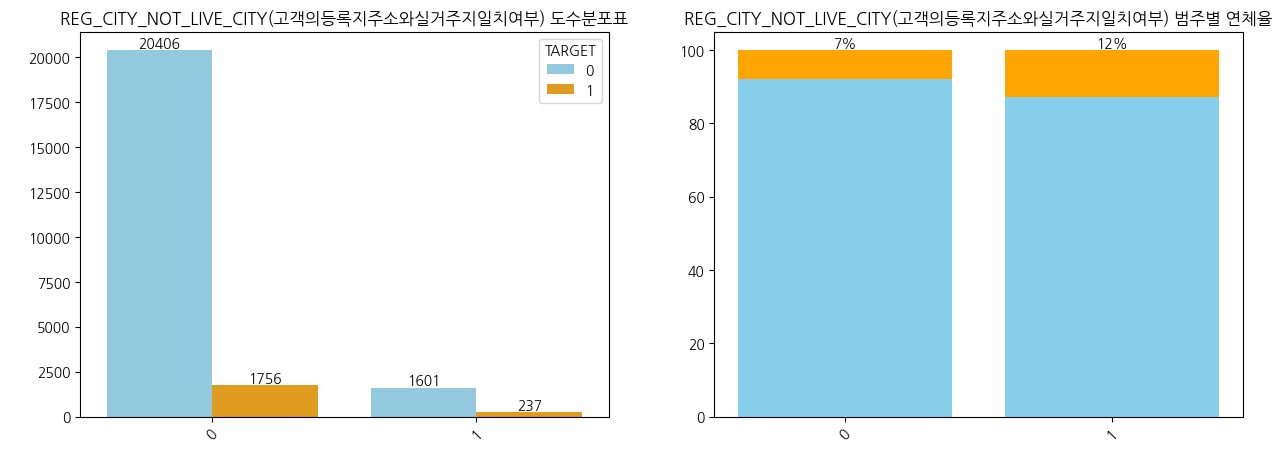

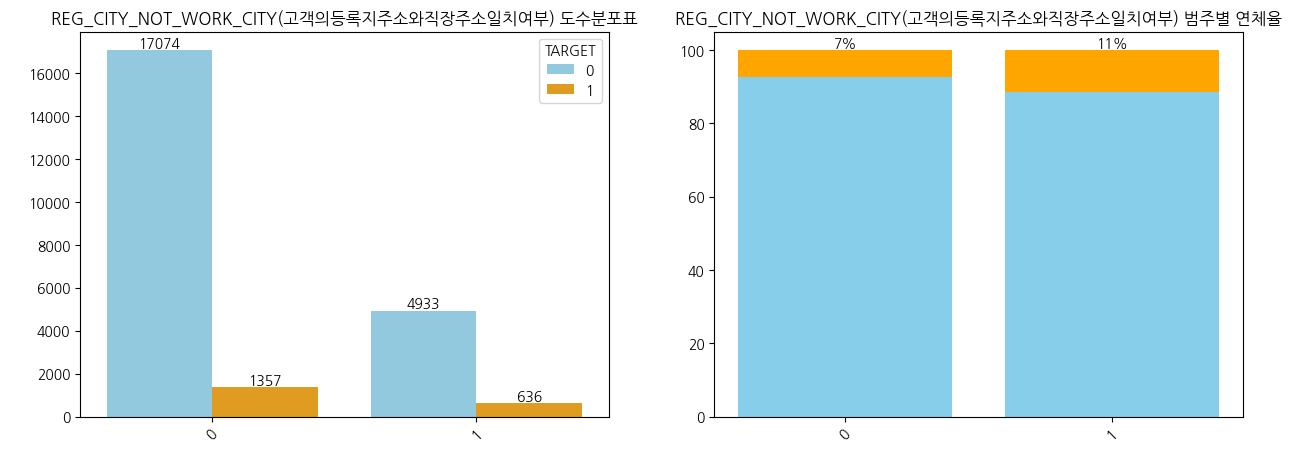

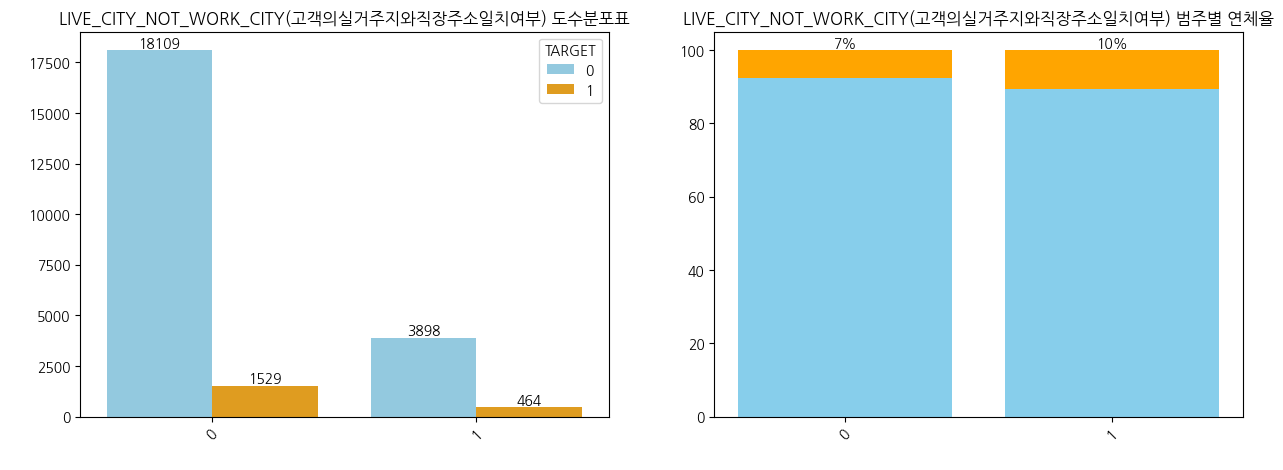

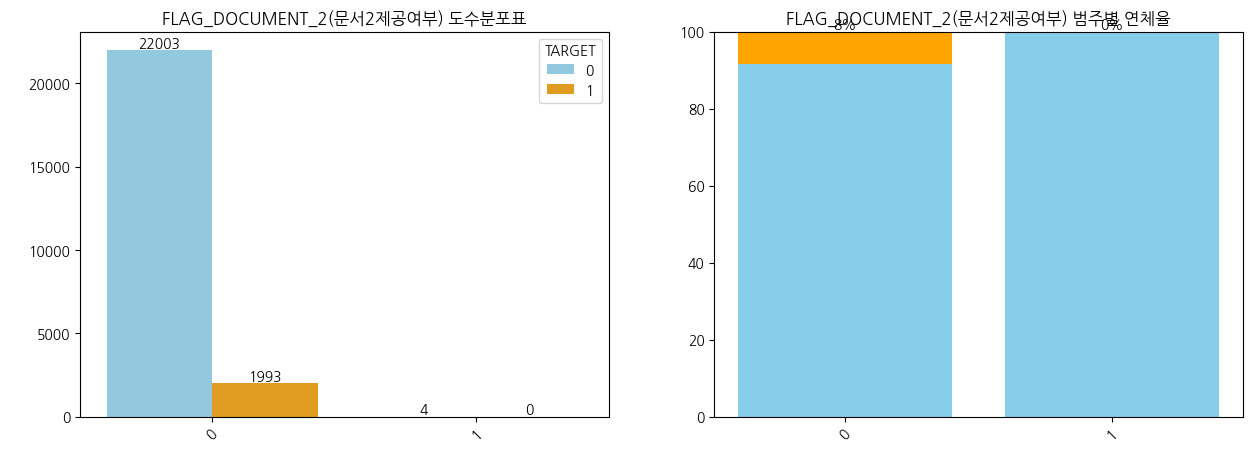

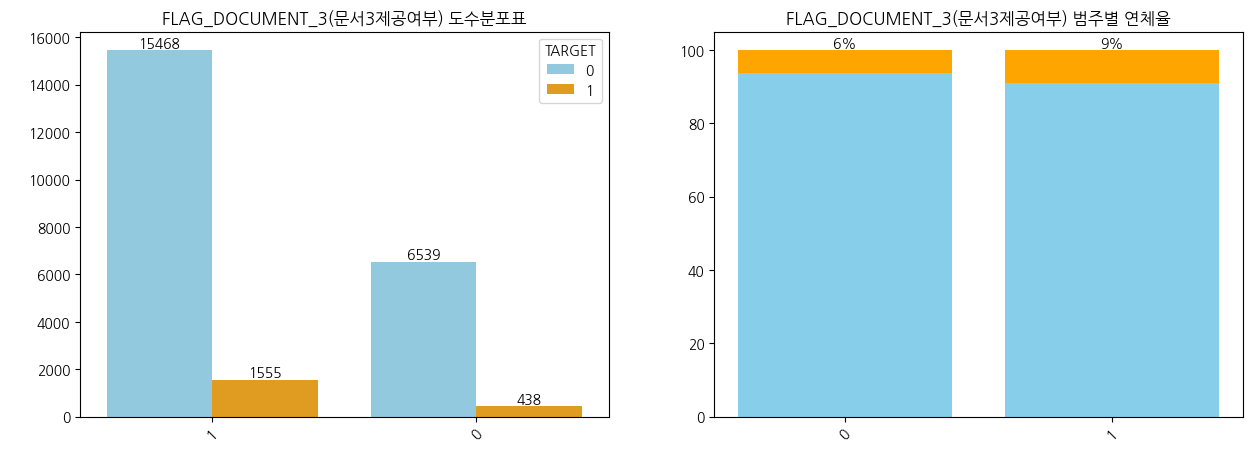

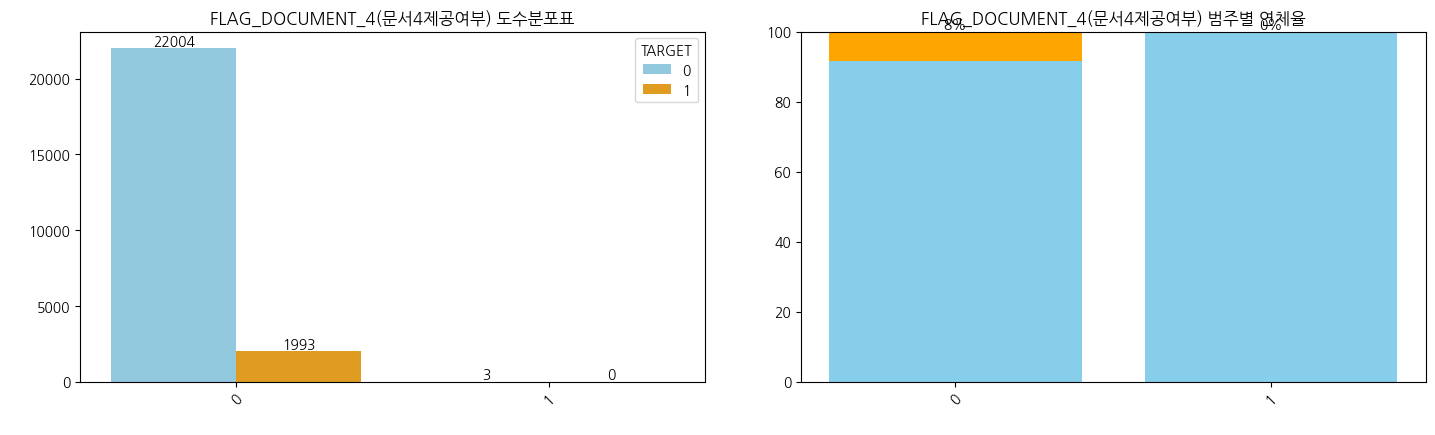

In [105]:
plot_stats_v(data1, normal_categorical_features) # 숫자 표시 추가 

> #### _<font color = lightseagreen>  육안으로 봤을때 대부분의 변수에서 연체율 차이가 있음 </font>_

> __※ 각 특성별 연체율이 상대적으로 높은 범주__
>  - Cash Loans > Revolving loans 
>  - 남성 > 여성 
>  - 자가부동산이 없는 그룹    
>  - 다자녀인 그룹
>  - Working 그룹 
>  - 렌트 아파트에 거주하는 그룹
>  - 거주지 등급이 낮은 (3등급) 그룹   
>  → 상식적인 결과가 나왔음을 확인 
> </font>

### 2-4. 다범주 변수(ORGANIZATION TYPE)의 연체율 현황 파악 <a id="s-2.3">

In [282]:
def plot_top_categories(df, feature, target='TARGET', top_n=20):
    # Get top categories by count
    top_categories = df[feature].value_counts().index[:top_n]

    # Filter dataframe to include only top categories
    df_top_categories = df[df[feature].isin(top_categories)]

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
    
    # Plot countplot for the feature by TARGET (top)
    sns.countplot(data=df_top_categories,
                  y=feature,
                  hue=target,
                  order=top_categories,
                  ax=axes[0],
                  palette=['skyblue', 'orange'])

    axes[0].set_title(f'그림 1. Count of {feature} by {target}')

    # Add count values to the bar plot
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center',
                         xytext=(5, 0), textcoords='offset points')

    # Calculate percentage of each category by TARGET
    grouped = (df_top_categories.groupby(feature)[target]
               .value_counts(normalize=True)
               .rename('percentage')
               .mul(100)
               .reset_index()
               .sort_values(feature))
    
    # Sort by the percentage of TARGET == 1 (defaulting for cases where TARGET == 1 does not exist)
    grouped_sorted = grouped[grouped[target] == 1].sort_values(by='percentage', ascending=False)
    order_sorted = grouped_sorted[feature].values

    # Plot percentage of each category by TARGET (bottom)
    sns.barplot(x="percentage", y=feature, hue=target, data=grouped,
                order=order_sorted,
                ax=axes[1],
                palette=['skyblue', 'orange'])
    # Add labels to the bars
    for patch in axes[1].patches:
        x_coord = patch.get_width()
        y_coord = patch.get_y() + patch.get_height() / 2

        axes[1].annotate(f'{x_coord:.2f}%', (x_coord, y_coord),
                         ha='center', va='center')
    axes[1].set_title(f'그림 2. Percentage of {target} in each {feature}')

    plt.tight_layout()
    plt.show()


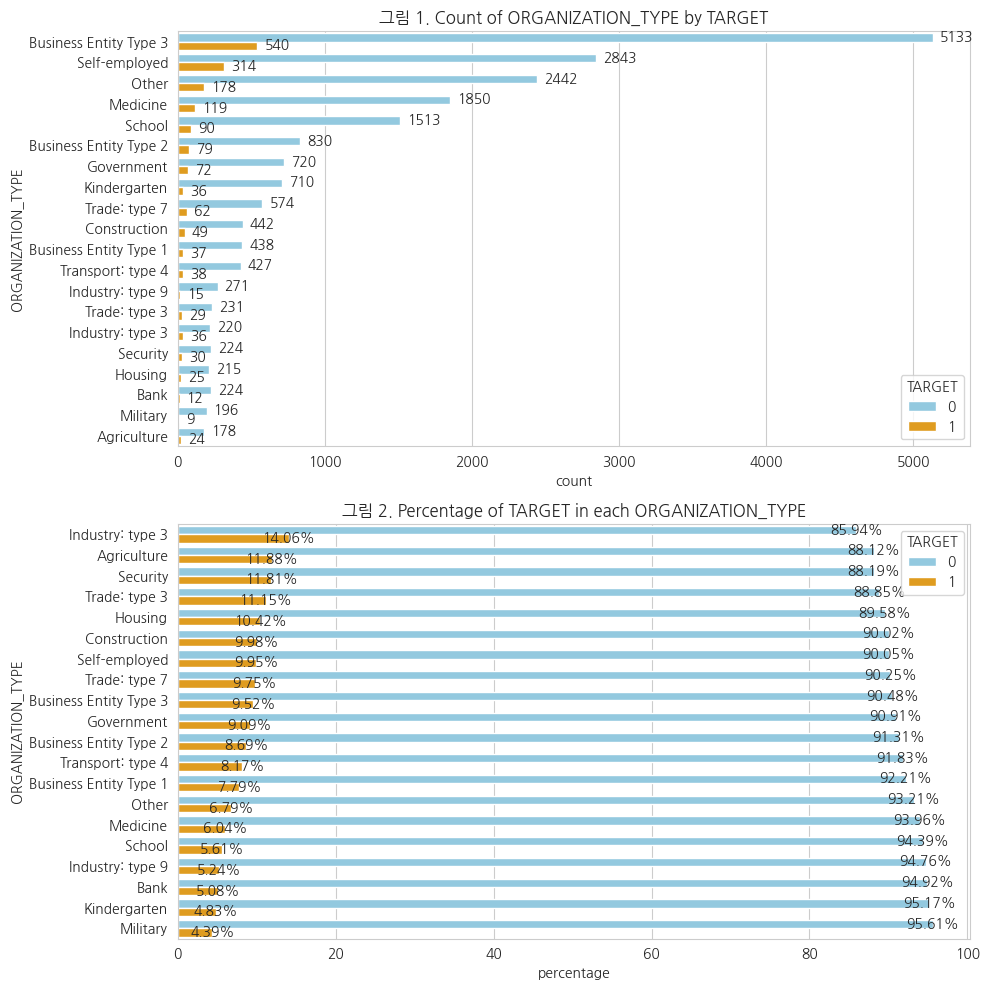

In [283]:
plot_top_categories(data1, 'ORGANIZATION_TYPE')

> #### _<font color = lightseagreen> 직업 유형 53개 중 차지 비중이 높은 상위 10개 직업 (그림1), 연체율이 높은 상위 10개 직업 (그림2) 에 대한 시각화  </font>_

> ※ 직업 종류별로 연체율에 명확히 차이가 있음을 확인   
  ▶  [파생변수 Insight] 연체율이 높은 직업군끼리 Grouping 진행

In [129]:
# 계산된 연체율을 저장할 새로운 열 추가
data1['Default_Rate'] = data1.groupby('ORGANIZATION_TYPE')['TARGET'].transform('mean')

# 연체율 기준으로 범주 묶기
bins = pd.qcut(data1['Default_Rate'], q=10, labels=False, duplicates='drop')
data1['Grouped_ORGANIZATION_TYPE'] = bins.apply(lambda x: f'Group_{x+1}')

# 기존 열과 불필요한 열 제거
# data = data.drop(['ORGANIZATION_TYPE', 'Default_Rate'], axis=1)

# 결과 확인
print(data1['Grouped_ORGANIZATION_TYPE'].value_counts())

Group_5    7571
Group_6    3959
Group_1    3910
Group_3    2770
Group_8    2070
Group_2    2003
Group_4    1226
Group_7     491
Name: Grouped_ORGANIZATION_TYPE, dtype: int64


In [130]:
grouped_org_types = data1.groupby('Grouped_ORGANIZATION_TYPE')['ORGANIZATION_TYPE'].unique() # 어떤 직업군이 들어갔는지 확인

In [131]:
data1.groupby('Grouped_ORGANIZATION_TYPE')['TARGET'].mean()

Grouped_ORGANIZATION_TYPE
Group_1    0.049872
Group_2    0.060409
Group_3    0.067870
Group_4    0.078303
Group_5    0.093647
Group_6    0.099015
Group_7    0.099796
Group_8    0.117391
Name: TARGET, dtype: float64

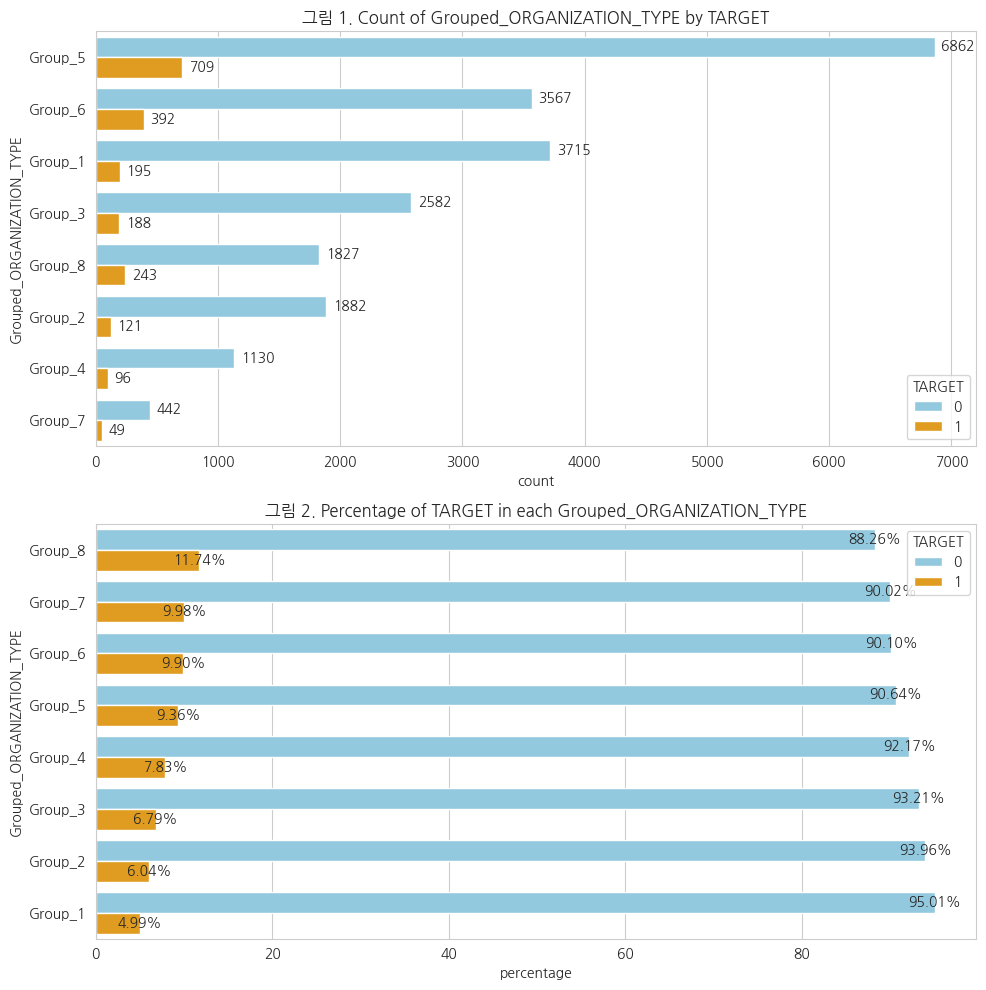

In [284]:
plot_top_categories(data1, 'Grouped_ORGANIZATION_TYPE')

> #### _<font color = lightseagreen> 10개 범주로 Grouping한 결과, 각 직업Group별 n수가 충분히 확보된 상태에서 Group별 연체율 차이가 명확함을 확인하였습니다 </font>_

### 2-5. 연체여부별 수치형 변수 분포 파악 <a id="s-2.4">

- #### Histogram / Box plot - 수치형 컬럼에 적용

In [285]:
def plot_histogram_boxplot(df, columns, group_option):
    sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일
    custom_palette = ["navy", "blue"]
    plt.rcParams['font.family'] = 'NanumGothic' 

    for column in columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

        # 히스토그램 그리기
        if group_option == True : 
            sns.histplot(data=df, x=column, hue='TARGET', kde=True, ax=axes[0], palette=custom_palette)
        else : 
            sns.histplot(data=df, x=column, kde=True, ax=axes[0], palette=custom_palette)
    
        axes[0].set_title(f'{column}({column_info[column]})의 데이터 분포')
        axes[0].set_xlabel(' ')
        axes[0].set_ylabel('빈도')

        # 상자 그림 그리기
        if group_option == True : 
            sns.boxplot(data=df, x='TARGET', y=column, ax=axes[1], palette=custom_palette)
        else : 
            sns.boxplot(data=df, y=column, ax=axes[1], palette=custom_palette)    
        
        axes[1].set_title(f'연체그룹별 {column}({column_info[column]})의 상자 그림')
        axes[1].set_xlabel(' ')
        axes[1].set_ylabel(' ')

        plt.tight_layout()
        plt.show()

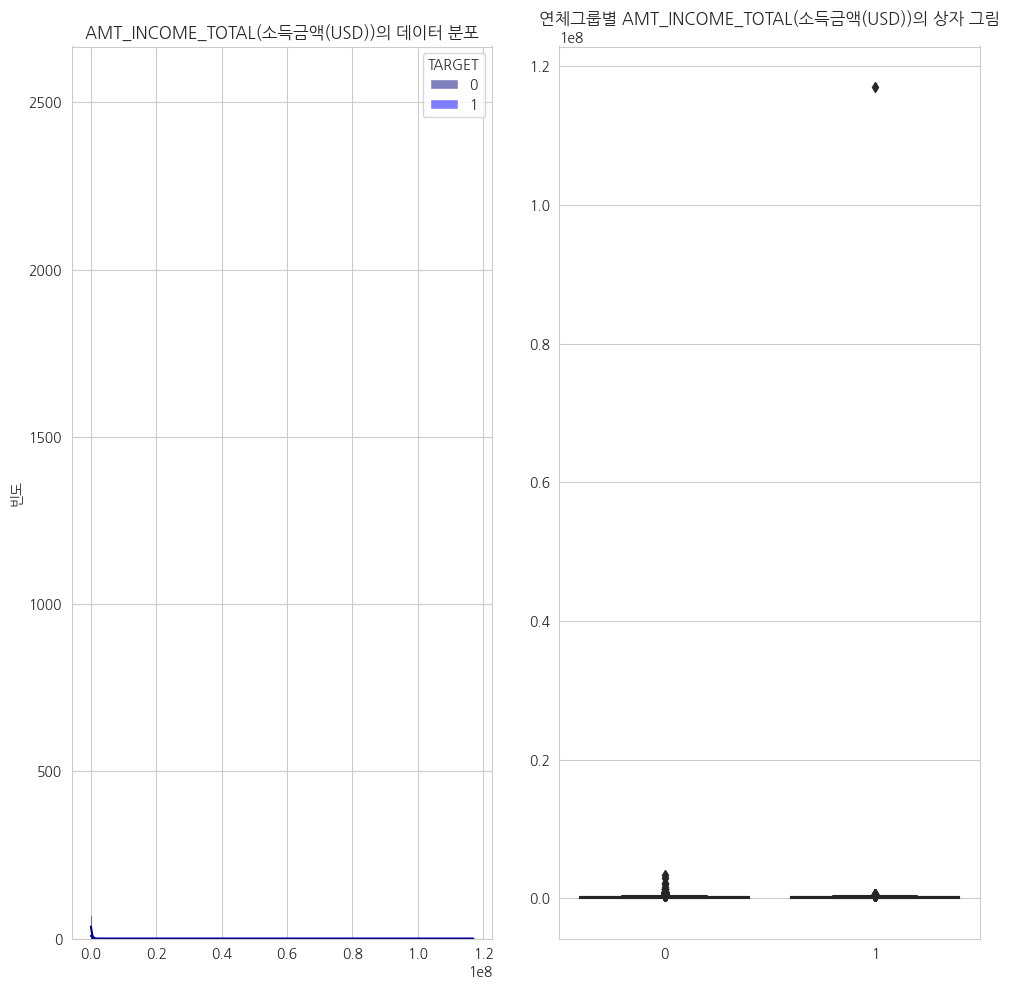

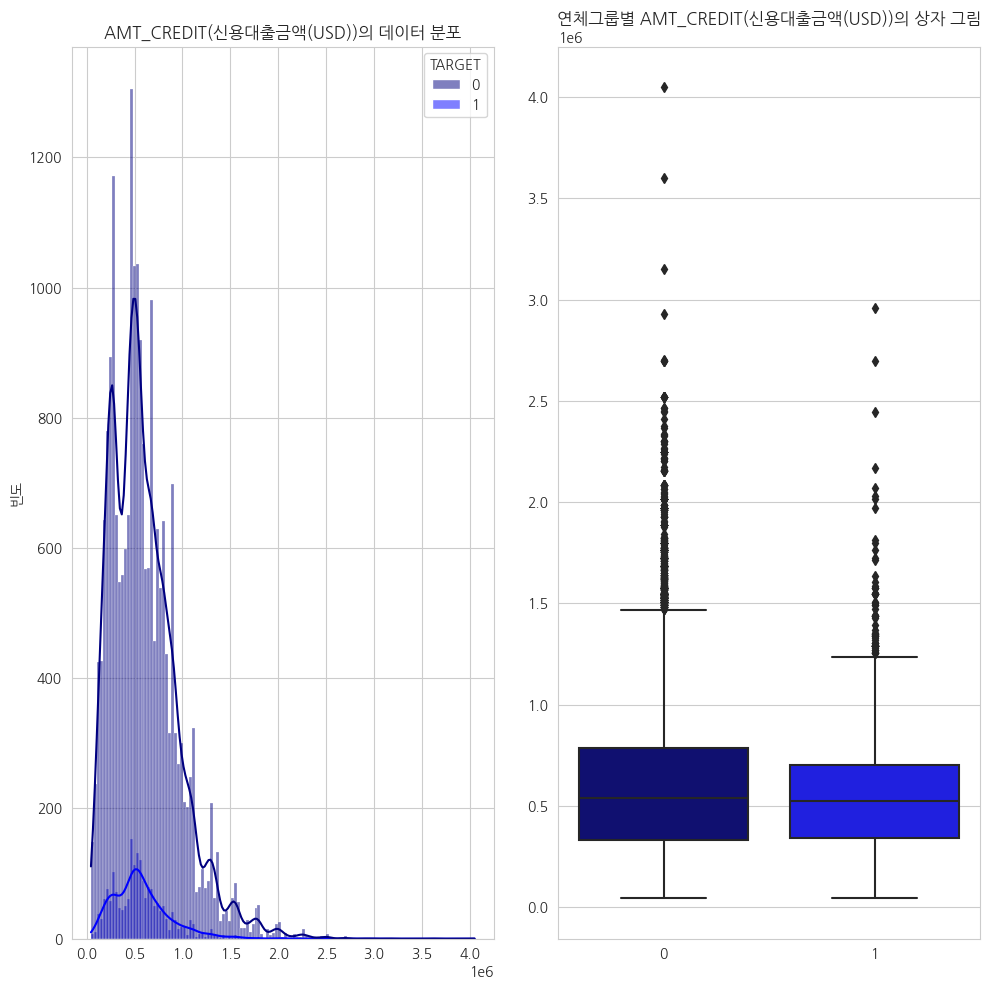

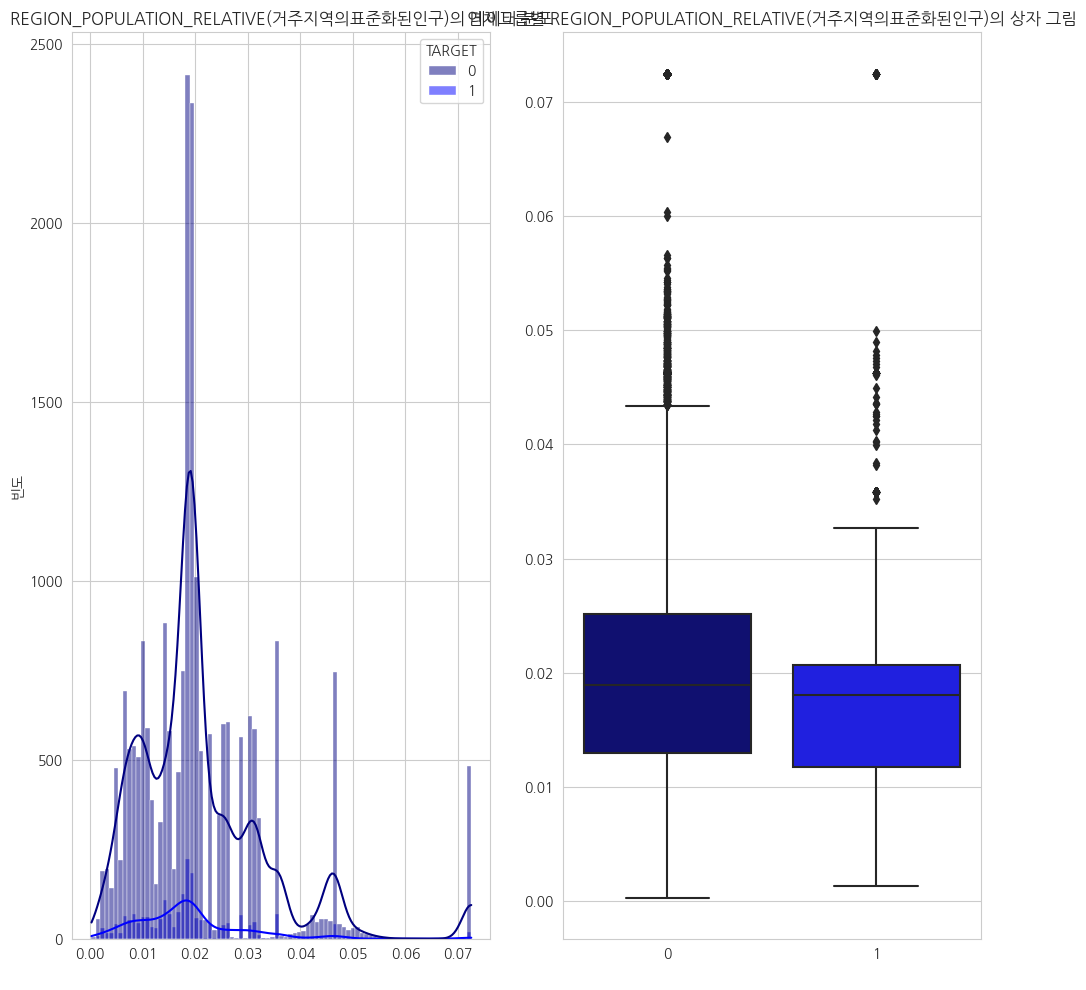

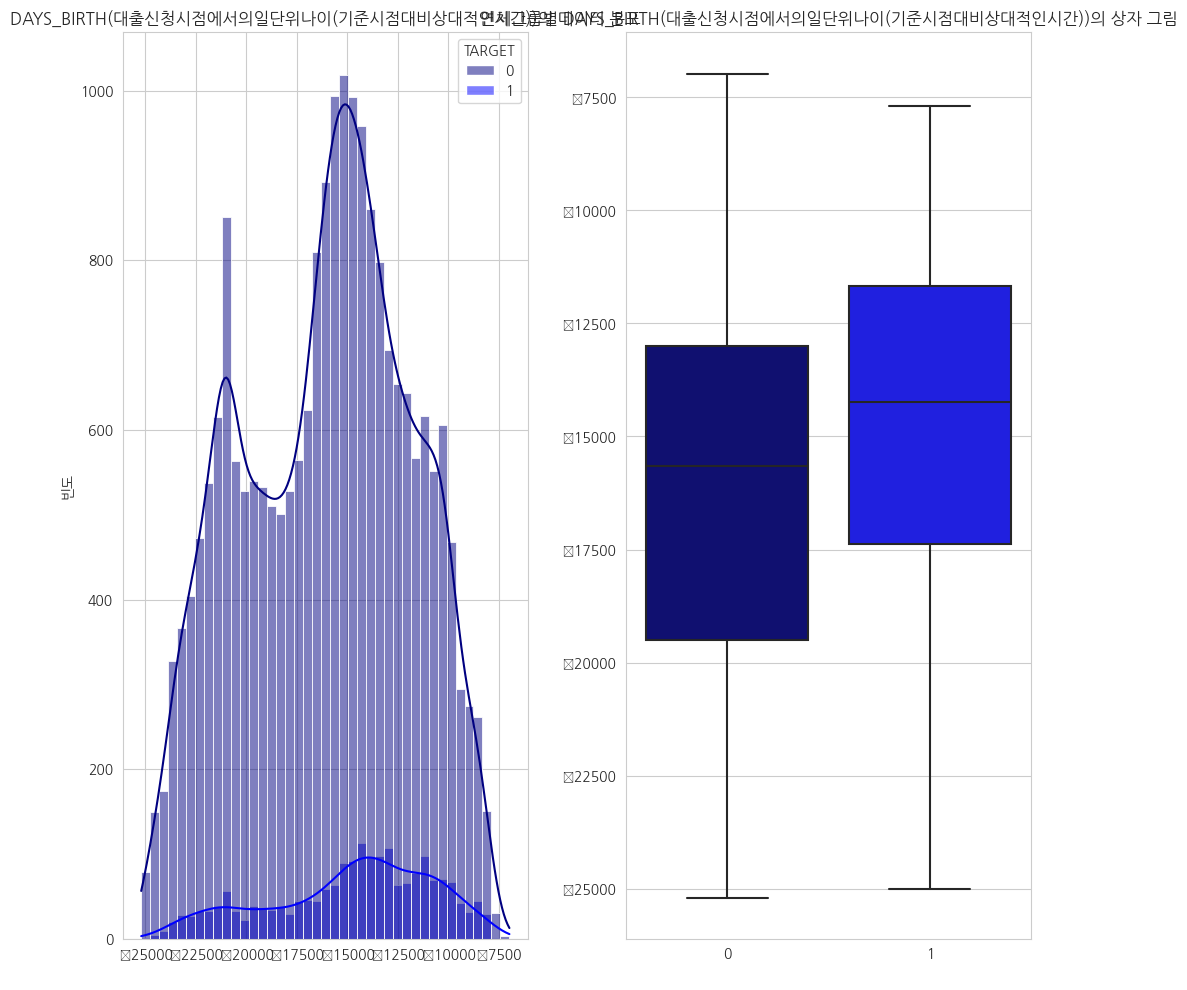

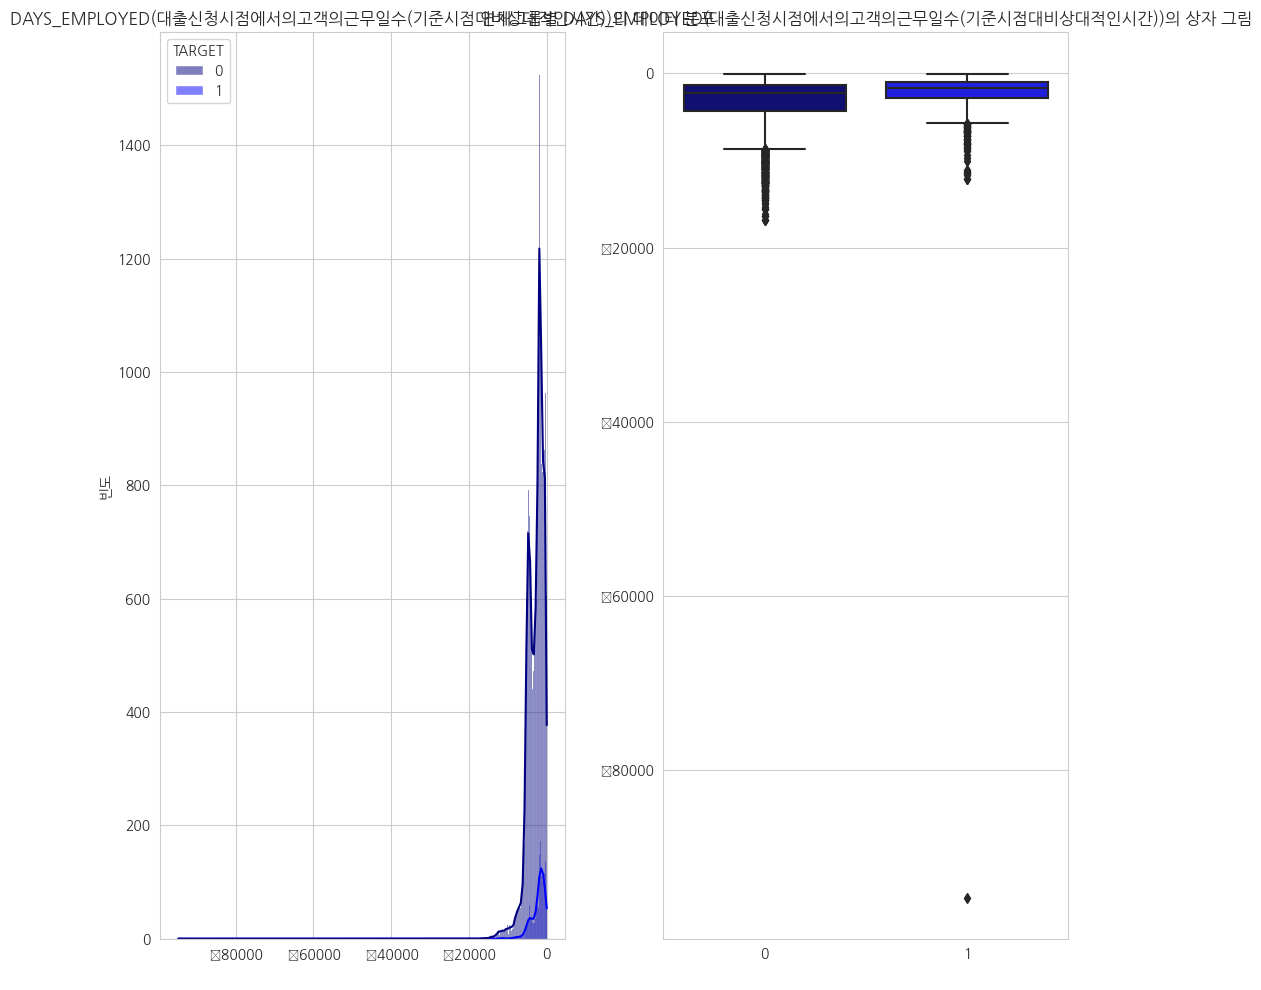

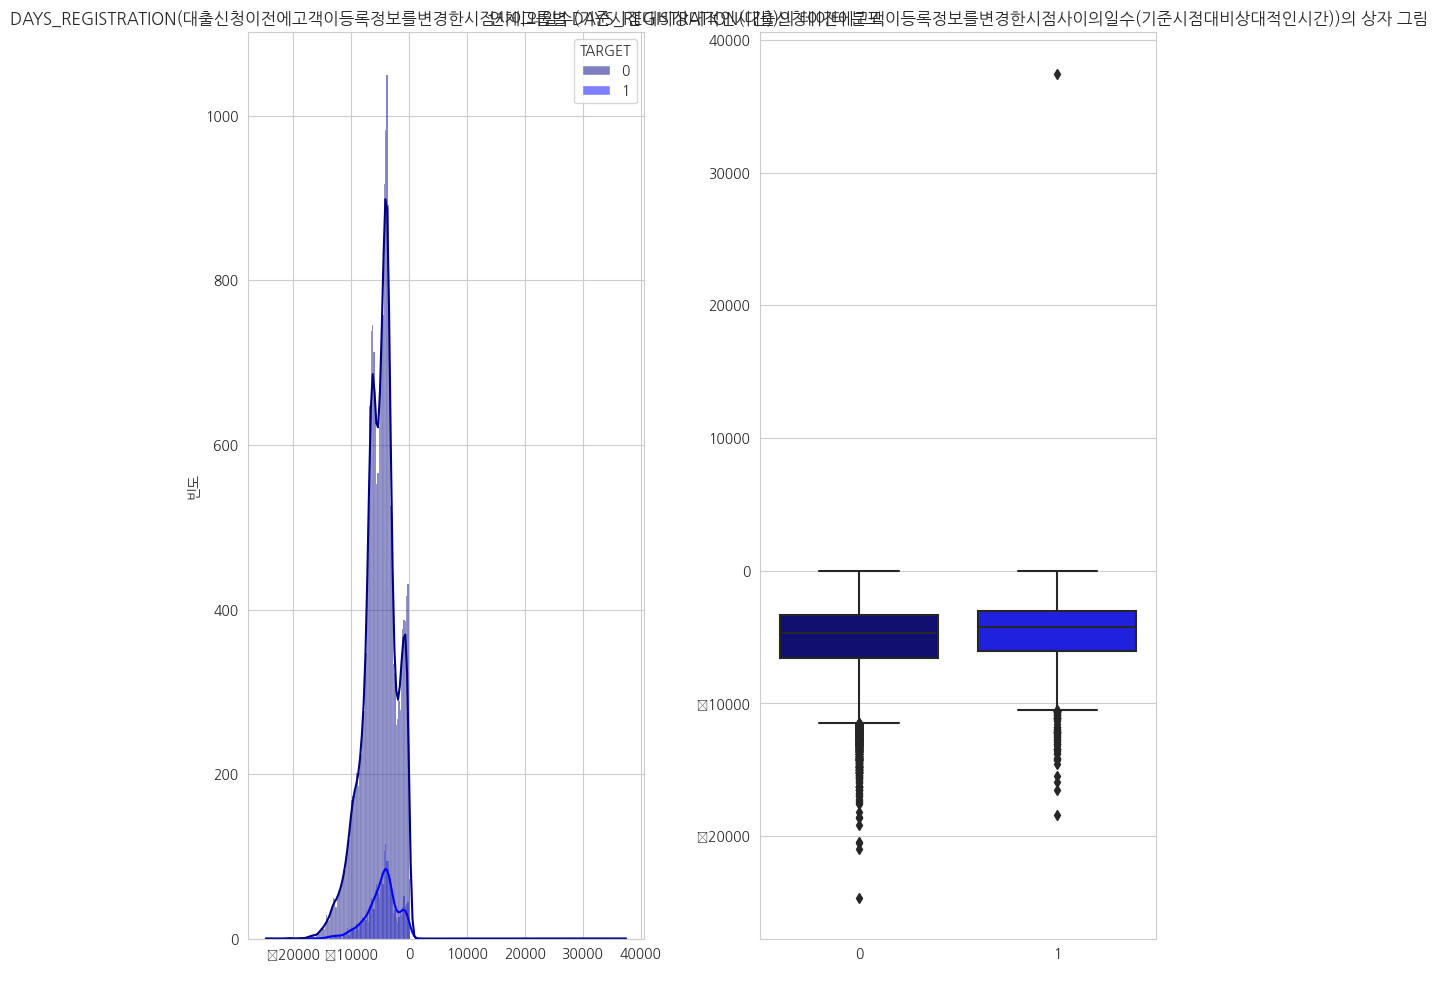

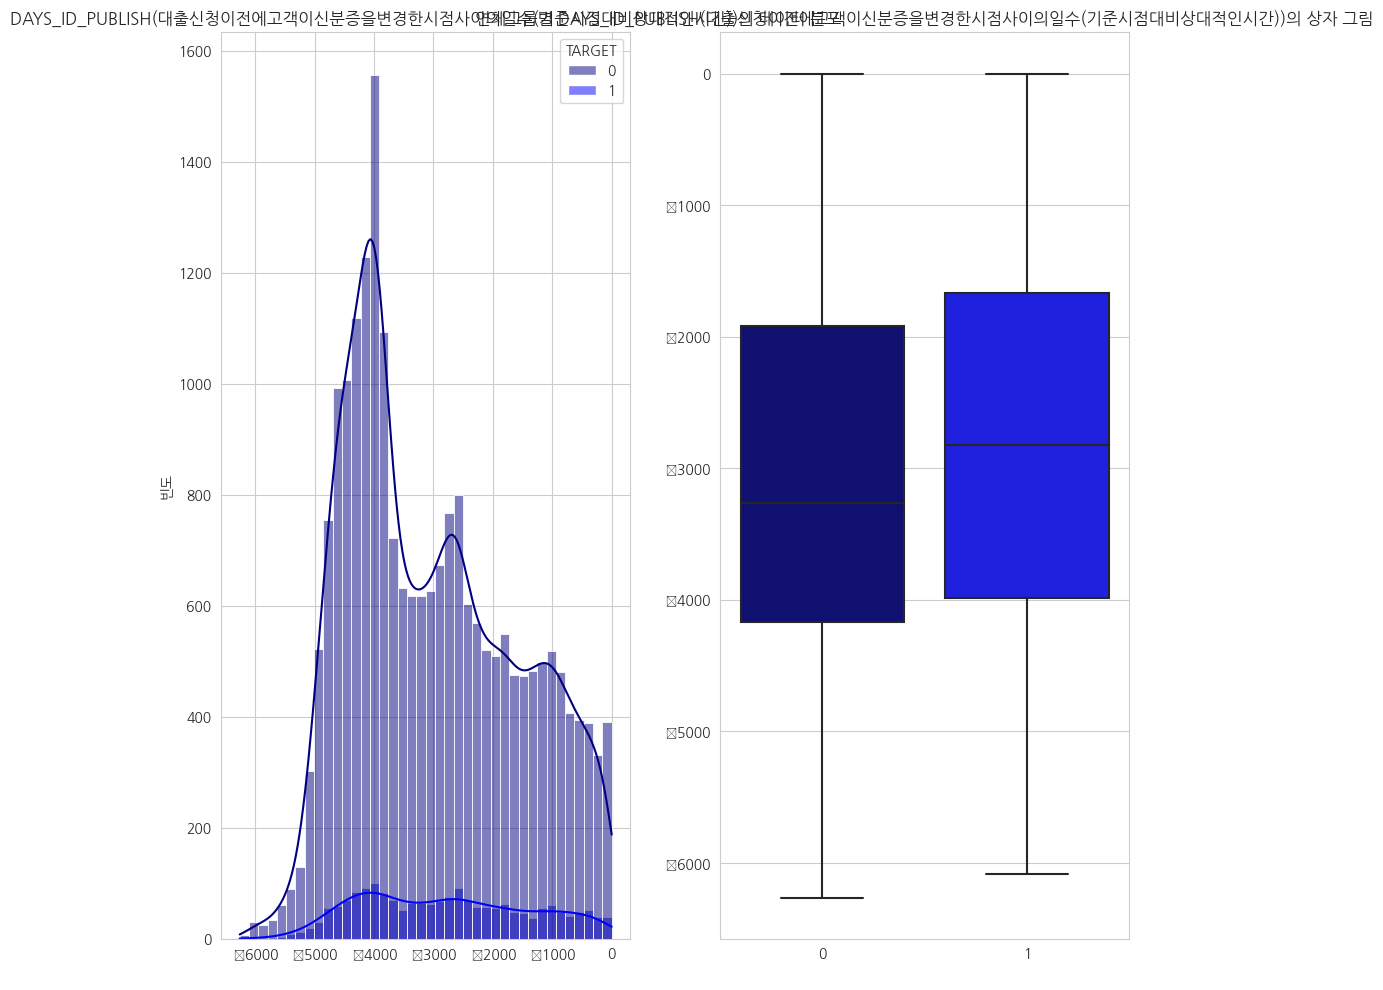

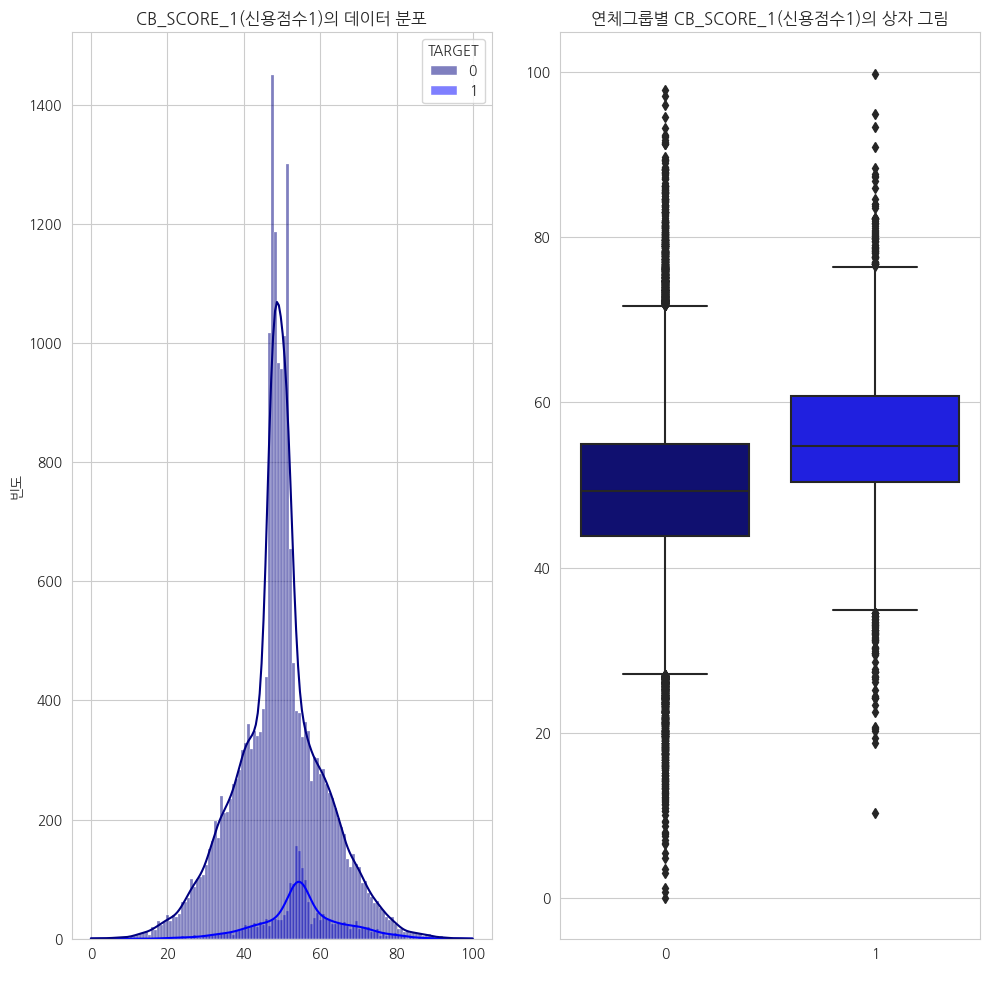

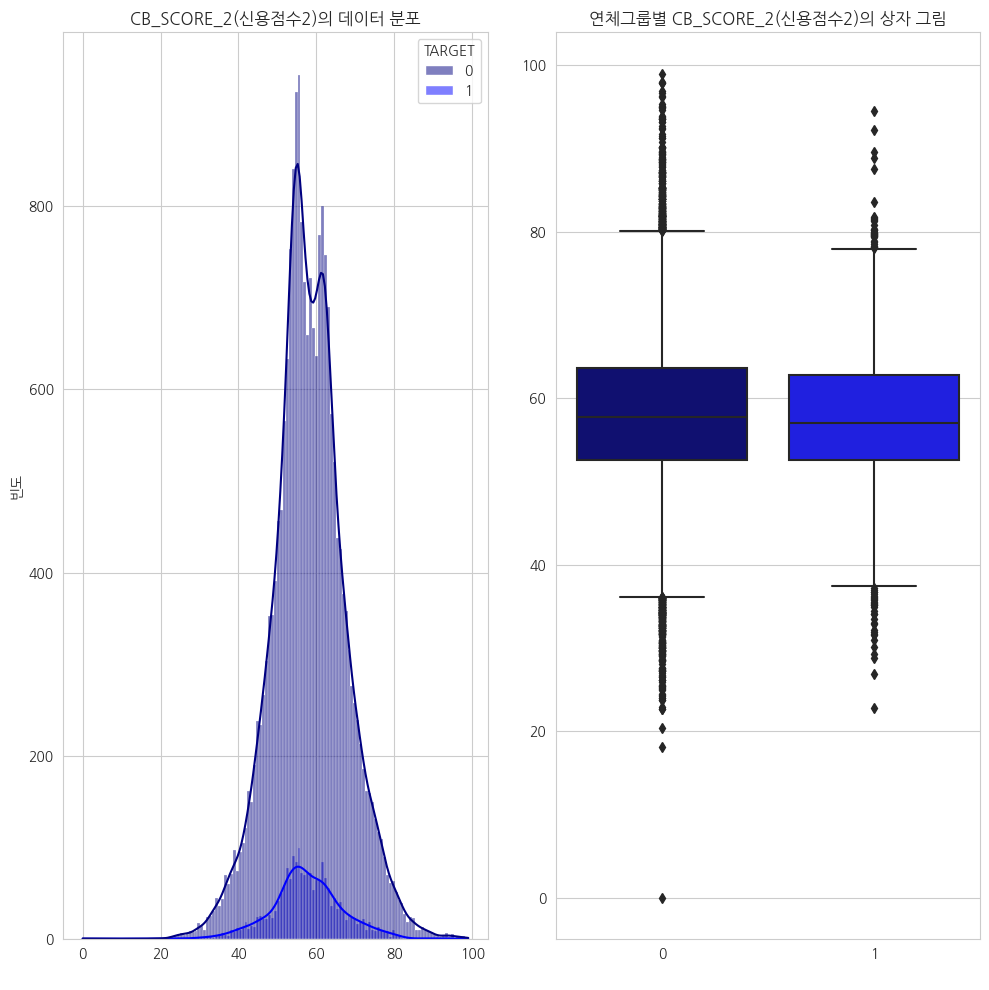

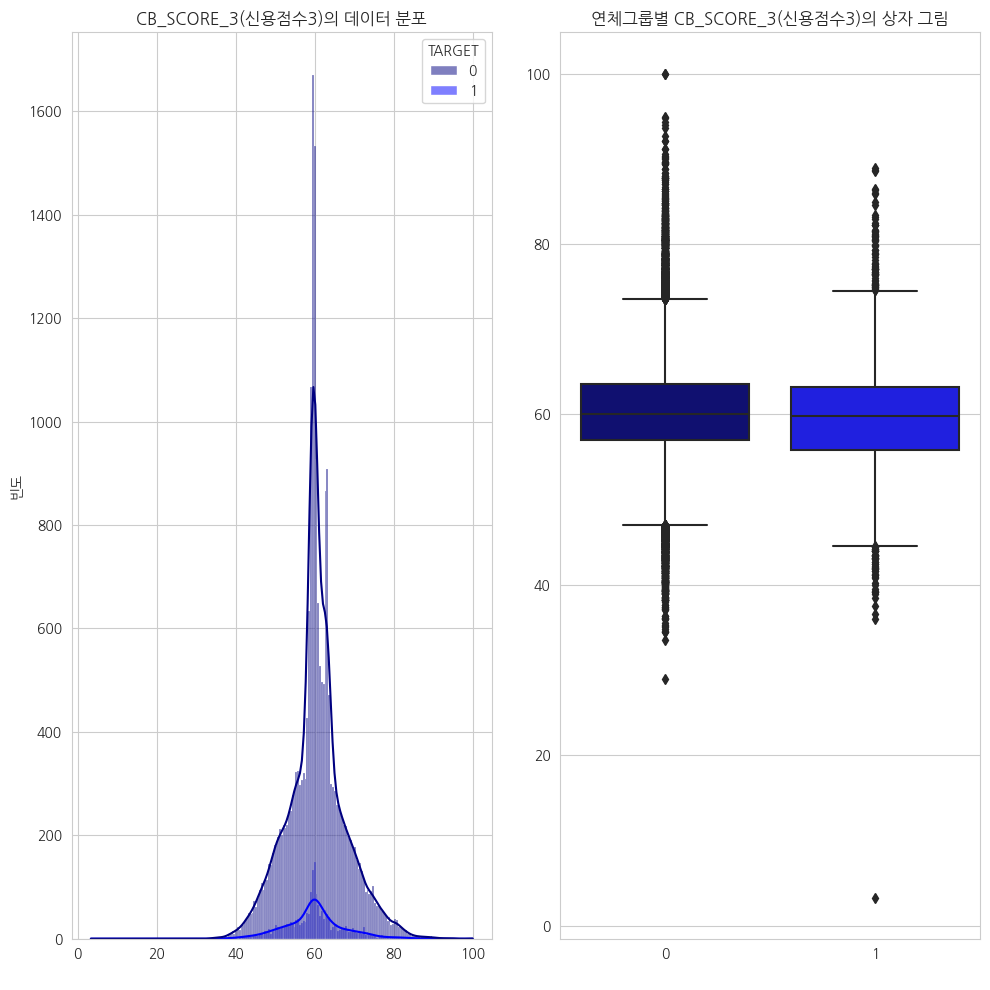

In [286]:
plot_histogram_boxplot(data1, numerical_features, group_option = True)

> #### _<font color = lightseagreen> 연체 / 정상 그룹간 분포 차이가 커 보이는 days나 cb점수가 연체율과 연관이 큰 특성일 것으로 보임 </font>_

> __※ 연체여부별 분포 차이가 커 보이는 변수__ 
>  - REGION_POPULATION_RELATIVE(거주지역의표준화된인구) 
>  - DAYS_BIRTH(대출신청시점에서의일단위나이)
>  - DAYS_EMPLOYED(대출신청시점에서의고객근무일수) 
>  - DAYS_ID_PUBLISH(대출신청이전에고객이신분증을변경한시점사이일수)
>  - CB_SCORE1(신용점수1) 
>  - CB_SCORE2(신용점수2)   
> </font>

### 2-6. 근로 유형을 유추할 수 있는 변수들간 연관성 파악  
#### ▶ Grouped_ORGANIZATION_TYPE(파생변수)와  NAME_INCOME_TYPE(소득 유형)간 연관성 파악  <a id="s-2.5">

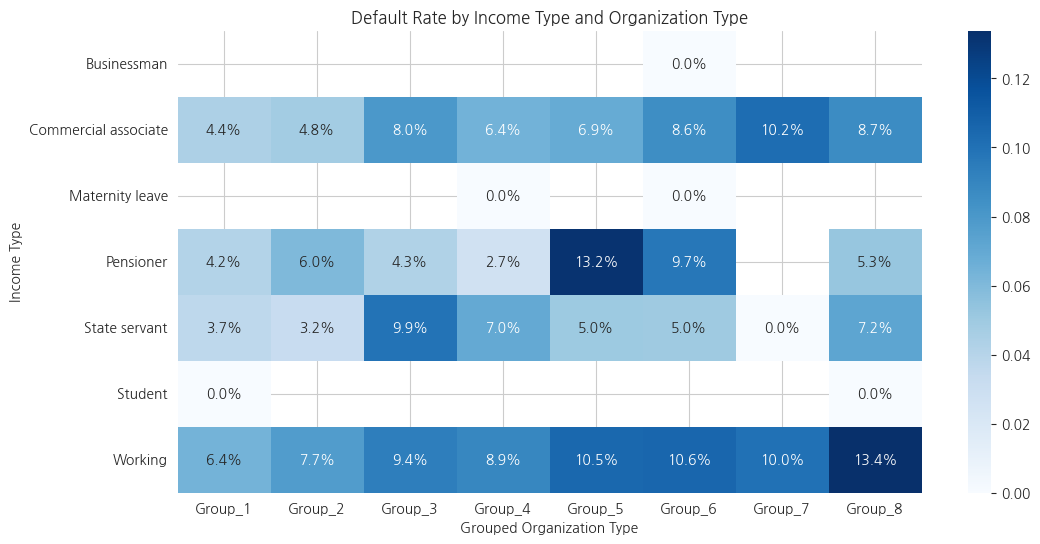

In [192]:
# 조합별 TARGET 비율 계산
grouped_data = data1.groupby(['NAME_INCOME_TYPE', 'Grouped_ORGANIZATION_TYPE'])['TARGET'].mean().reset_index()
pivot_table = grouped_data.pivot('NAME_INCOME_TYPE', 'Grouped_ORGANIZATION_TYPE', 'TARGET')

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.1%', cbar=True)
plt.xlabel('Grouped Organization Type')
plt.ylabel('Income Type')
plt.title('Default Rate by Income Type and Organization Type')
plt.show()

> #### _<font color = lightseagreen> [Insight] Grouped Organization Type 과 Income Type 간 Interaction(교호작용) 가능성 확인  </font>_

> ※ Grouped Organization Type 은 단변량 변수 시각화시 Group1 → 8 로 갈수록 연체율이 높았으나,   
>      소득 유형에 따라 2차원으로 구분하였을 때 연체율 Pattern에 차이가 있음을 확인  
>  ▶  소득 유형 = Woking Group (근로자) : Group8에 가까울수록 연체율 높음   
>  ▶  소득 유형 = State servant (국가 공무원) : Group3, 4에서 연체율 높음    
>  ▶  소득 유형 = Pensioner (연금 수령자) : Group5, 6에서 연체율 높음 

> 참고 : Group 3, 4, 5, 8의 직업 유형   
> 근무유형과 소득유형이 차이가 있음 -> 두 정보의 입수 시점 차이가 있을 수 있어보임

In [193]:
for group in ['Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_8'] : 
    print(group + ' 종류') 
    print(data1[data1['Grouped_ORGANIZATION_TYPE'] == group]['ORGANIZATION_TYPE'].unique())

Group_3 종류
['Hotel' 'Other' 'Trade: type 6']
Group_4 종류
['Transport: type 4' 'Industry: type 5' 'Business Entity Type 1'
 'Security Ministries' 'Telecom' 'Advertising']
Group_5 종류
['Business Entity Type 3' 'Government' 'Business Entity Type 2'
 'Restaurant' 'Industry: type 4']
Group_6 종류
['Self-employed' 'Trade: type 2' 'Trade: type 7']
Group_8 종류
['Industry: type 1' 'Transport: type 2' 'Industry: type 11'
 'Industry: type 3' 'Agriculture' 'Housing' 'Security' 'Trade: type 3'
 'Electricity' 'Transport: type 3' 'Emergency' 'Legal Services'
 'Trade: type 5' 'Industry: type 7' 'Industry: type 13' 'Trade: type 4']


### 2-7. 근로 유형을 유추할 수 있는 변수들간 연관성 파악  
#### ▶ Grouped_ORGANIZATION_TYPE(파생변수)과 AMT_INCOME_TOTAL(소득금액) 연관성 파악 <a id="s-2.6">

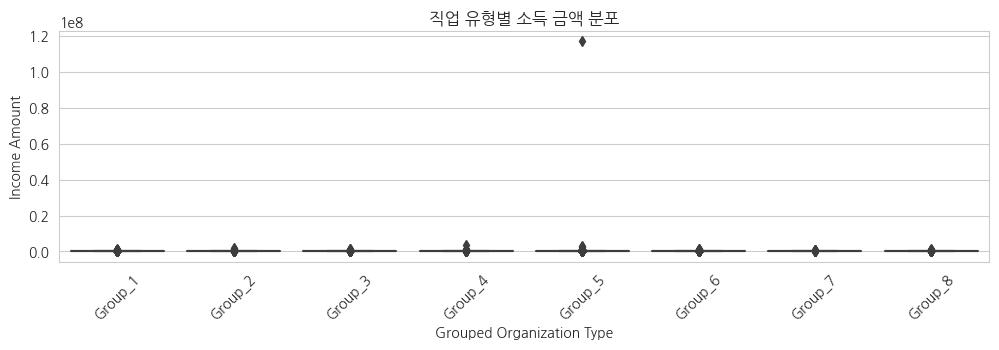

In [194]:
# Set figure size
plt.figure(figsize=(12, 3))

# Create box plot
group_order = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7', 'Group_8']
sns.boxplot(x="Grouped_ORGANIZATION_TYPE", y="AMT_INCOME_TOTAL", data=data1, order = group_order)

# Set labels and title
plt.xlabel("Grouped Organization Type")
plt.ylabel("Income Amount")
plt.title("직업 유형별 소득 금액 분포")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


> 소득유형의 이상치로 인해 분포가 보이지 않아, 이상치 제거 후 분포 시각화

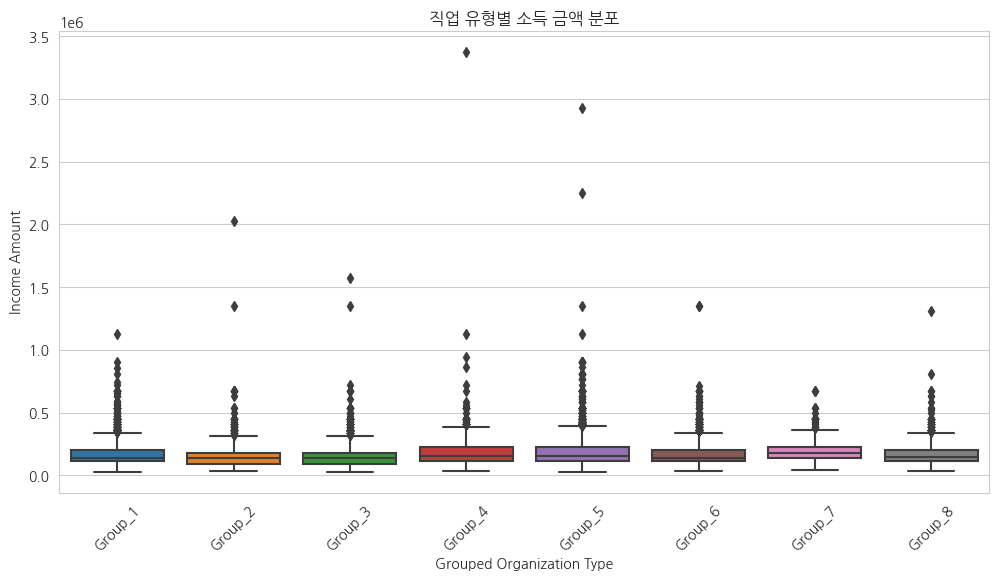

In [195]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create box plot
group_order = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7', 'Group_8']
sns.boxplot(x="Grouped_ORGANIZATION_TYPE", y="AMT_INCOME_TOTAL", data=data1[data1['AMT_INCOME_TOTAL']<1e8], order = group_order)

# Set labels and title
plt.xlabel("Grouped Organization Type")
plt.ylabel("Income Amount")
plt.title("직업 유형별 소득 금액 분포")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [196]:
data1[data1['AMT_INCOME_TOTAL']>1e8]

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
991         Cash loans           F               Y             1   

     AMT_INCOME_TOTAL  AMT_CREDIT NAME_INCOME_TYPE  \
991       117000000.0    562491.0          Working   

               NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
991  Secondary / secondary special            Married  House / apartment   

     REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
991                    0.010643    -12615.0  -94688.226562        37501.46875   

     DAYS_ID_PUBLISH FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_PHONE FLAG_EMAIL  \
991          -3643.0              1               0          0          0   

     REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
991                     2                    TUESDAY                       14   

    REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
991                      0                      0                       0   

          ORGANIZATION_TYPE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4  \
991  Business Entity Type 3               0               1               0   

     CB_SCORE_1  CB_SCORE_2  CB_SCORE_3  TARGET CODE_GENDER_predicted_flag  \
991   79.863659   52.373718    3.329319       1                          N   

    FLAG_OWN_REALTY_predicted_flag AMT_CREDIT_predicted_flag  \
991                              N                         N   

    REGION_POPULATION_RELATIVE_predicted_flag DAYS_BIRTH_predicted_flag  \
991                                         N                         N   

    DAYS_EMPLOYED_predicted_flag DAYS_REGISTRATION_predicted_flag  \
991                            Y                                Y   

    DAYS_ID_PUBLISH_predicted_flag CB_SCORE_1_predicted_flag  \
991                              N                         N   

    CB_SCORE_2_predicted_flag CB_SCORE_3_predicted_flag  \
991                         N                         Y   

    ORGANIZATION_TYPE_predicted_flag  Default_Rate Grouped_ORGANIZATION_TYPE  
991                                N      0.095188                   Group_5

> #### _<font color = lightseagreen> 연체율이 낮은 Group_1에서 소득 수준이 높고, 연체율이 높은 Group_8에서 소득 수준이 낮을 것이라 예상했으나, Group 4~5에서 오히려 소득 수준이 높아보임 </font>_ 
> ※ 소득 수준과는 연관성 없어보이니, 자산 수준   
> 'FLAG_OWN_REALTY', ;자가부동산보유여부' or 'NAME_HOUSING_TYPE': '주거형태' 함께 보기

### 2-8. 근로 유형 X 자산 수준을 조합해 연체율과 연관성 파악  
#### ▶ Grouped_ORGANIZATION_TYPE(파생변수) x FLAG_OWN_REALTY(자가부동산보유여부) 별 연체율 현황 파악 <a id="s-2.6">

In [197]:
target_rate = data1.groupby(['Grouped_ORGANIZATION_TYPE', 'FLAG_OWN_REALTY'])['TARGET'].mean().reset_index()
pivot_table = target_rate.pivot(index='Grouped_ORGANIZATION_TYPE', columns='FLAG_OWN_REALTY', values='TARGET')

# Print the pivot table
print(pivot_table)

FLAG_OWN_REALTY                   N         Y
Grouped_ORGANIZATION_TYPE                    
Group_1                    0.054264  0.048553
Group_2                    0.063596  0.059470
Group_3                    0.089744  0.062500
Group_4                    0.098101  0.071429
Group_5                    0.097417  0.092421
Group_6                    0.089648  0.101919
Group_7                    0.094828  0.101333
Group_8                    0.130841  0.112704


> #### _<font color = lightseagreen> 대부분의 그룹(Group 5, 6제외)에서 자가부동산이 있는 그룹의 연체율이 낮았음. 자산 수준이 연체율과 연관성이 커 보임 </font>_

#### ▶ Grouped_ORGANIZATION_TYPE(파생변수) x NAME_HOUSING_TYPE(주거형태) 별 연체율 현황 파악 <a id="s-2.6">

In [198]:
target_rate = data1.groupby(['Grouped_ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE'])['TARGET'].mean().reset_index()
pivot_table = target_rate.pivot(index='NAME_HOUSING_TYPE', columns='Grouped_ORGANIZATION_TYPE', values='TARGET')

# Print the pivot table
print(pivot_table)

Grouped_ORGANIZATION_TYPE   Group_1   Group_2   Group_3   Group_4   Group_5  \
NAME_HOUSING_TYPE                                                             
Co-op apartment            0.000000  0.250000  0.000000  0.000000  0.111111   
House / apartment          0.043852  0.057856  0.067323  0.064577  0.089573   
Municipal apartment        0.073826  0.108696  0.059406  0.080000  0.115607   
Office apartment           0.062500  0.045455  0.000000  0.090909  0.061224   
Rented apartment           0.209302  0.111111  0.133333  0.250000  0.106509   
With parents               0.115385  0.105263  0.084337  0.202128  0.133630   

Grouped_ORGANIZATION_TYPE   Group_6   Group_7   Group_8  
NAME_HOUSING_TYPE                                        
Co-op apartment            0.050000  0.500000  0.000000  
House / apartment          0.097603  0.089862  0.115448  
Municipal apartment        0.072000  0.222222  0.065789  
Office apartment           0.125000  0.000000  0.050000  
Rented apartment   

In [256]:
def plot_heatmaps(df, feature1, feature2, target='TARGET', option = 'Day'):
    # Create a pivot table for the counts heatmap
    pivot_counts = df.pivot_table(index=feature1,
                                  columns=feature2,
                                  values=target,
                                  aggfunc='count')

    # Create a pivot table for the TARGET=1 ratio heatmap
    pivot_ratio = df[df[target] == 1].pivot_table(index=feature1,
                                                  columns=feature2,
                                                  values=target,
                                                  aggfunc='count') / pivot_counts

    # Reorder index (days of week) from Monday to Sunday
    if option == 'Day' :
        order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
        pivot_counts = pivot_counts.reindex(order)
        pivot_ratio = pivot_ratio.reindex(order)*100

    elif option == 'group' :
        order = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7', 'Group_8']
        pivot_counts = pivot_counts.reindex(order)
        pivot_ratio = pivot_ratio.reindex(order)*100

    else : 
        pass
        
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))# , fontsize=14)

    # Plot counts heatmap
    sns.heatmap(pivot_counts.fillna(0),
                ax=axes[0],
                cmap="Blues",
                annot=True,
                fmt=".0f",
               annot_kws={"fontsize": 14})  # Use no decimal places
    
    axes[0].set_title('Counts Heatmap')

     # Plot TARGET=1 ratio heatmap
    sns.heatmap(pivot_ratio.fillna(0),
               ax=axes[1],
               cmap="Blues",
               annot=True,
               fmt=".2f",
               annot_kws={"fontsize": 14})  # Use two decimal places

    axes[1].set_title('TARGET 1 Ratio Heatmap')
    

    # 플롯 출력
    plt.show()    

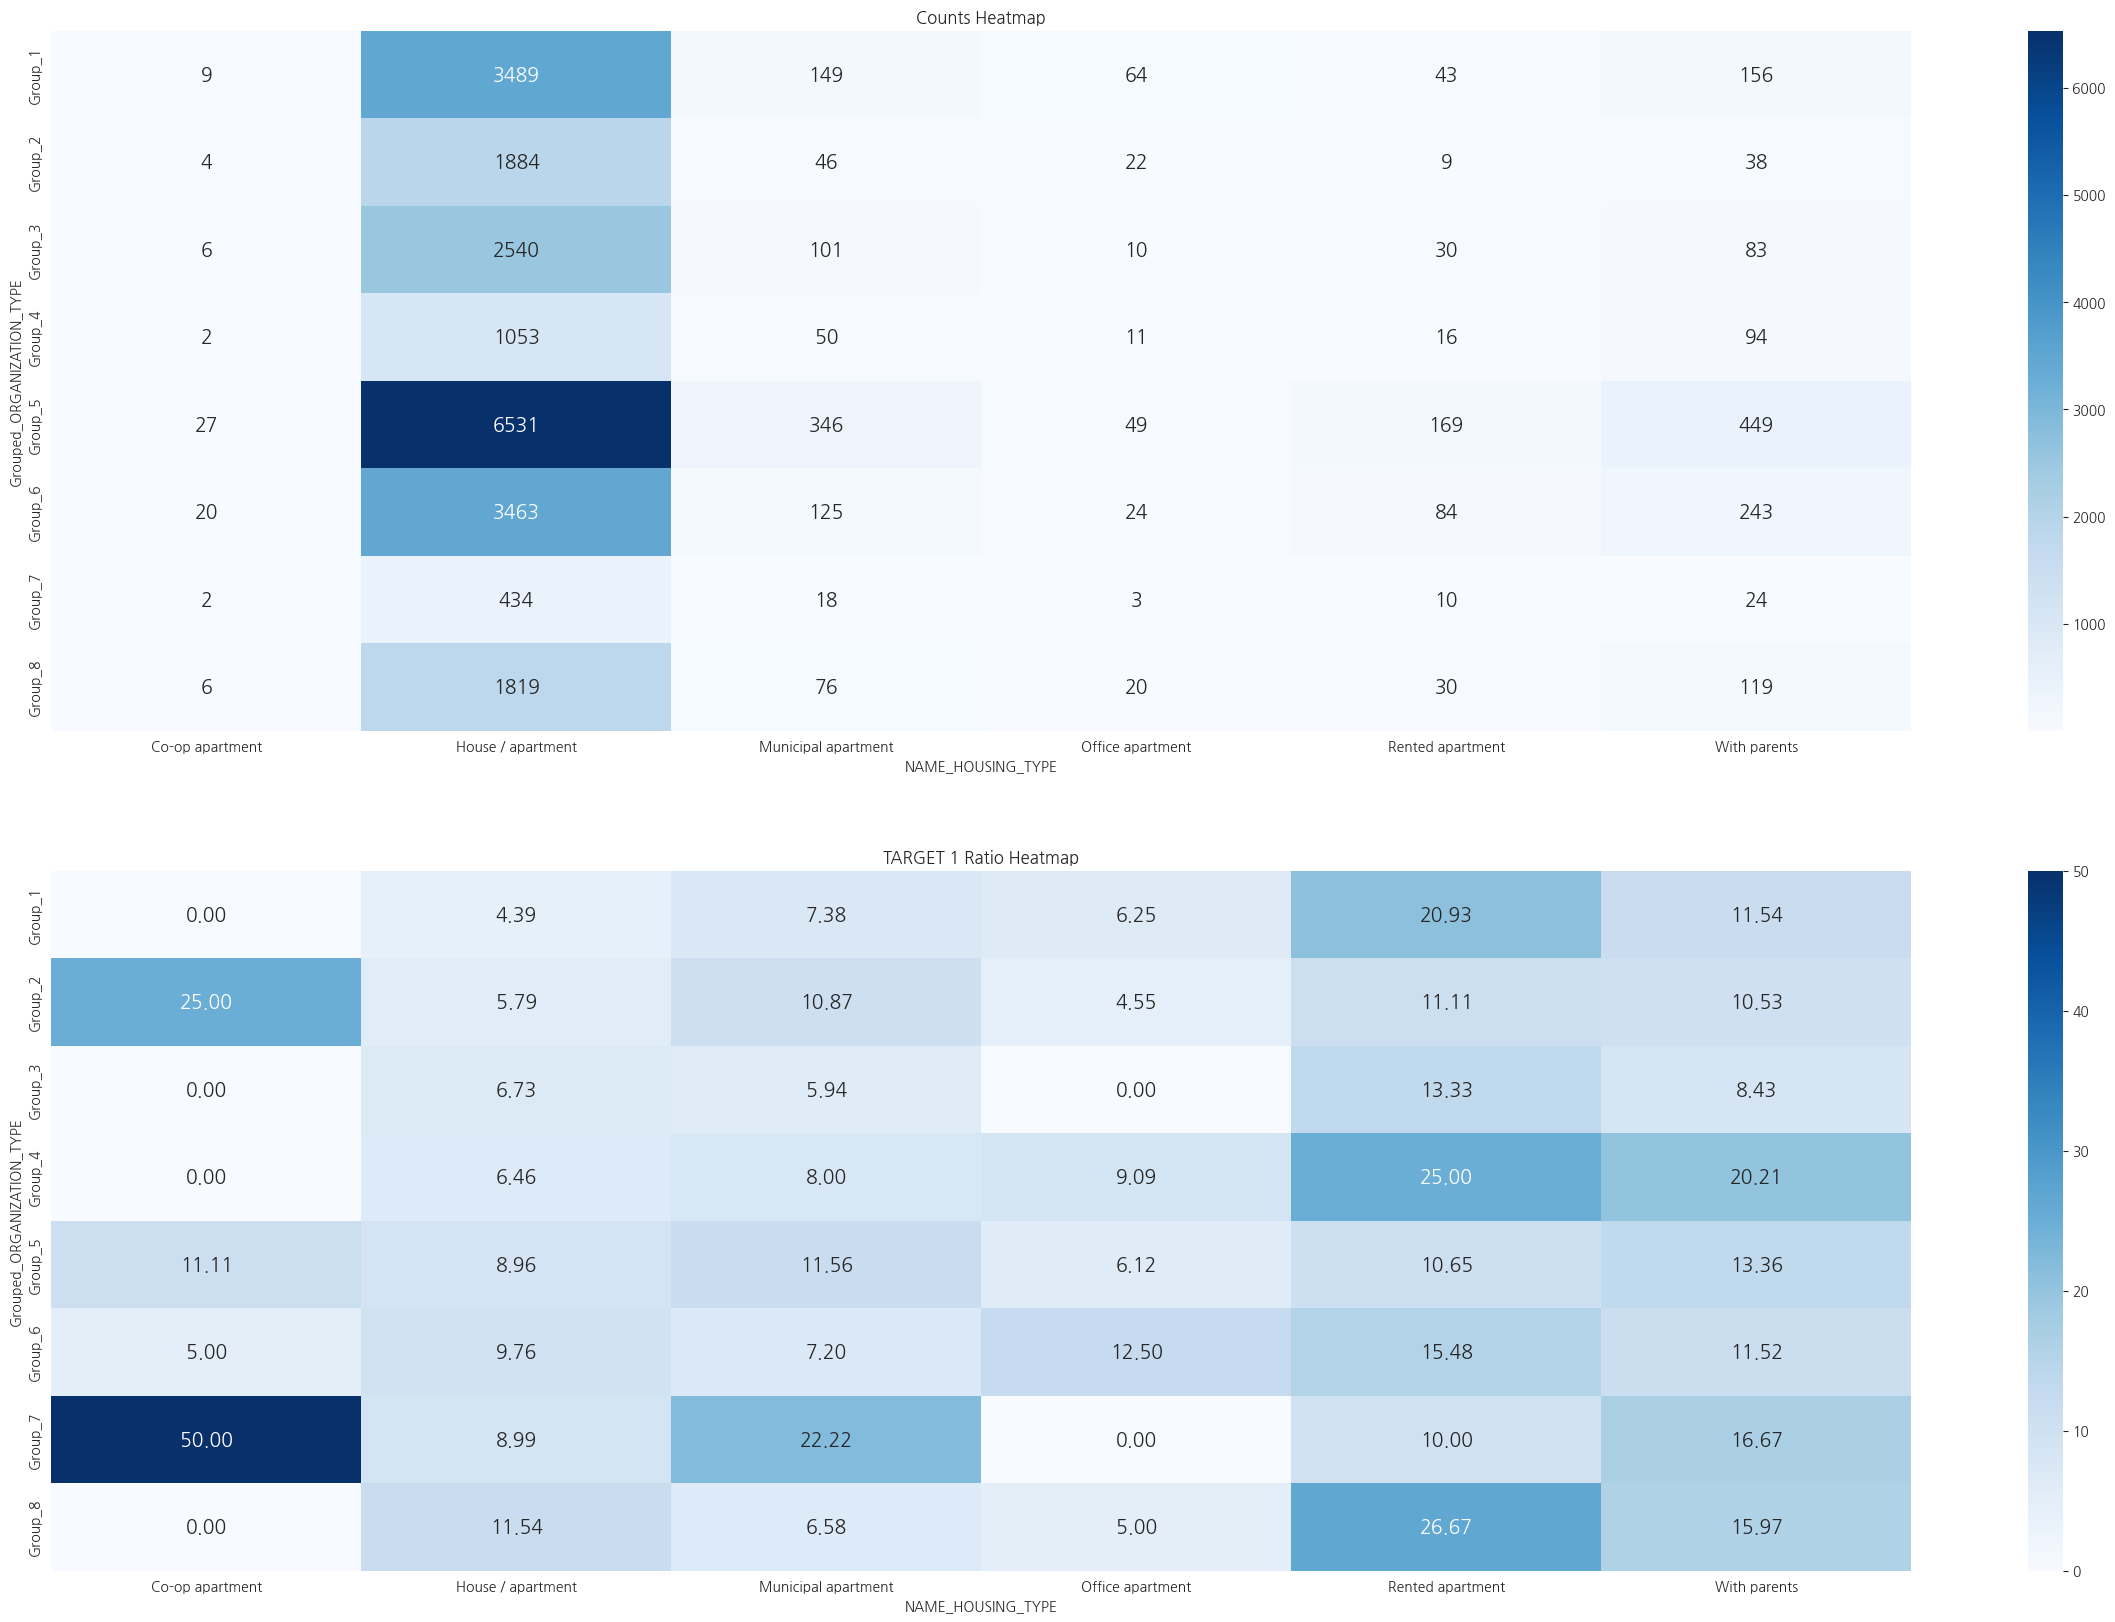

In [255]:
plot_heatmaps(data1, 'Grouped_ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', target='TARGET', option = 'group')

> #### _<font color = lightseagreen> House/appartment 에서 Group_8의 연체율이 높은 패턴이 유지됨, 나머지 주거형태에서는 패턴 확인 불가 </font>_

### 2-9. 대출요일 X 대출신청시간대 조합해 연체율과 연관성 파악  
#### ▶ WEEKDAY_APPR_PROCESS_START(대출신청요일) x HOUR_APPR_PROCESS_START(대출신청시간대) 별 연체율 현황 파악 <a id="s-2.6">

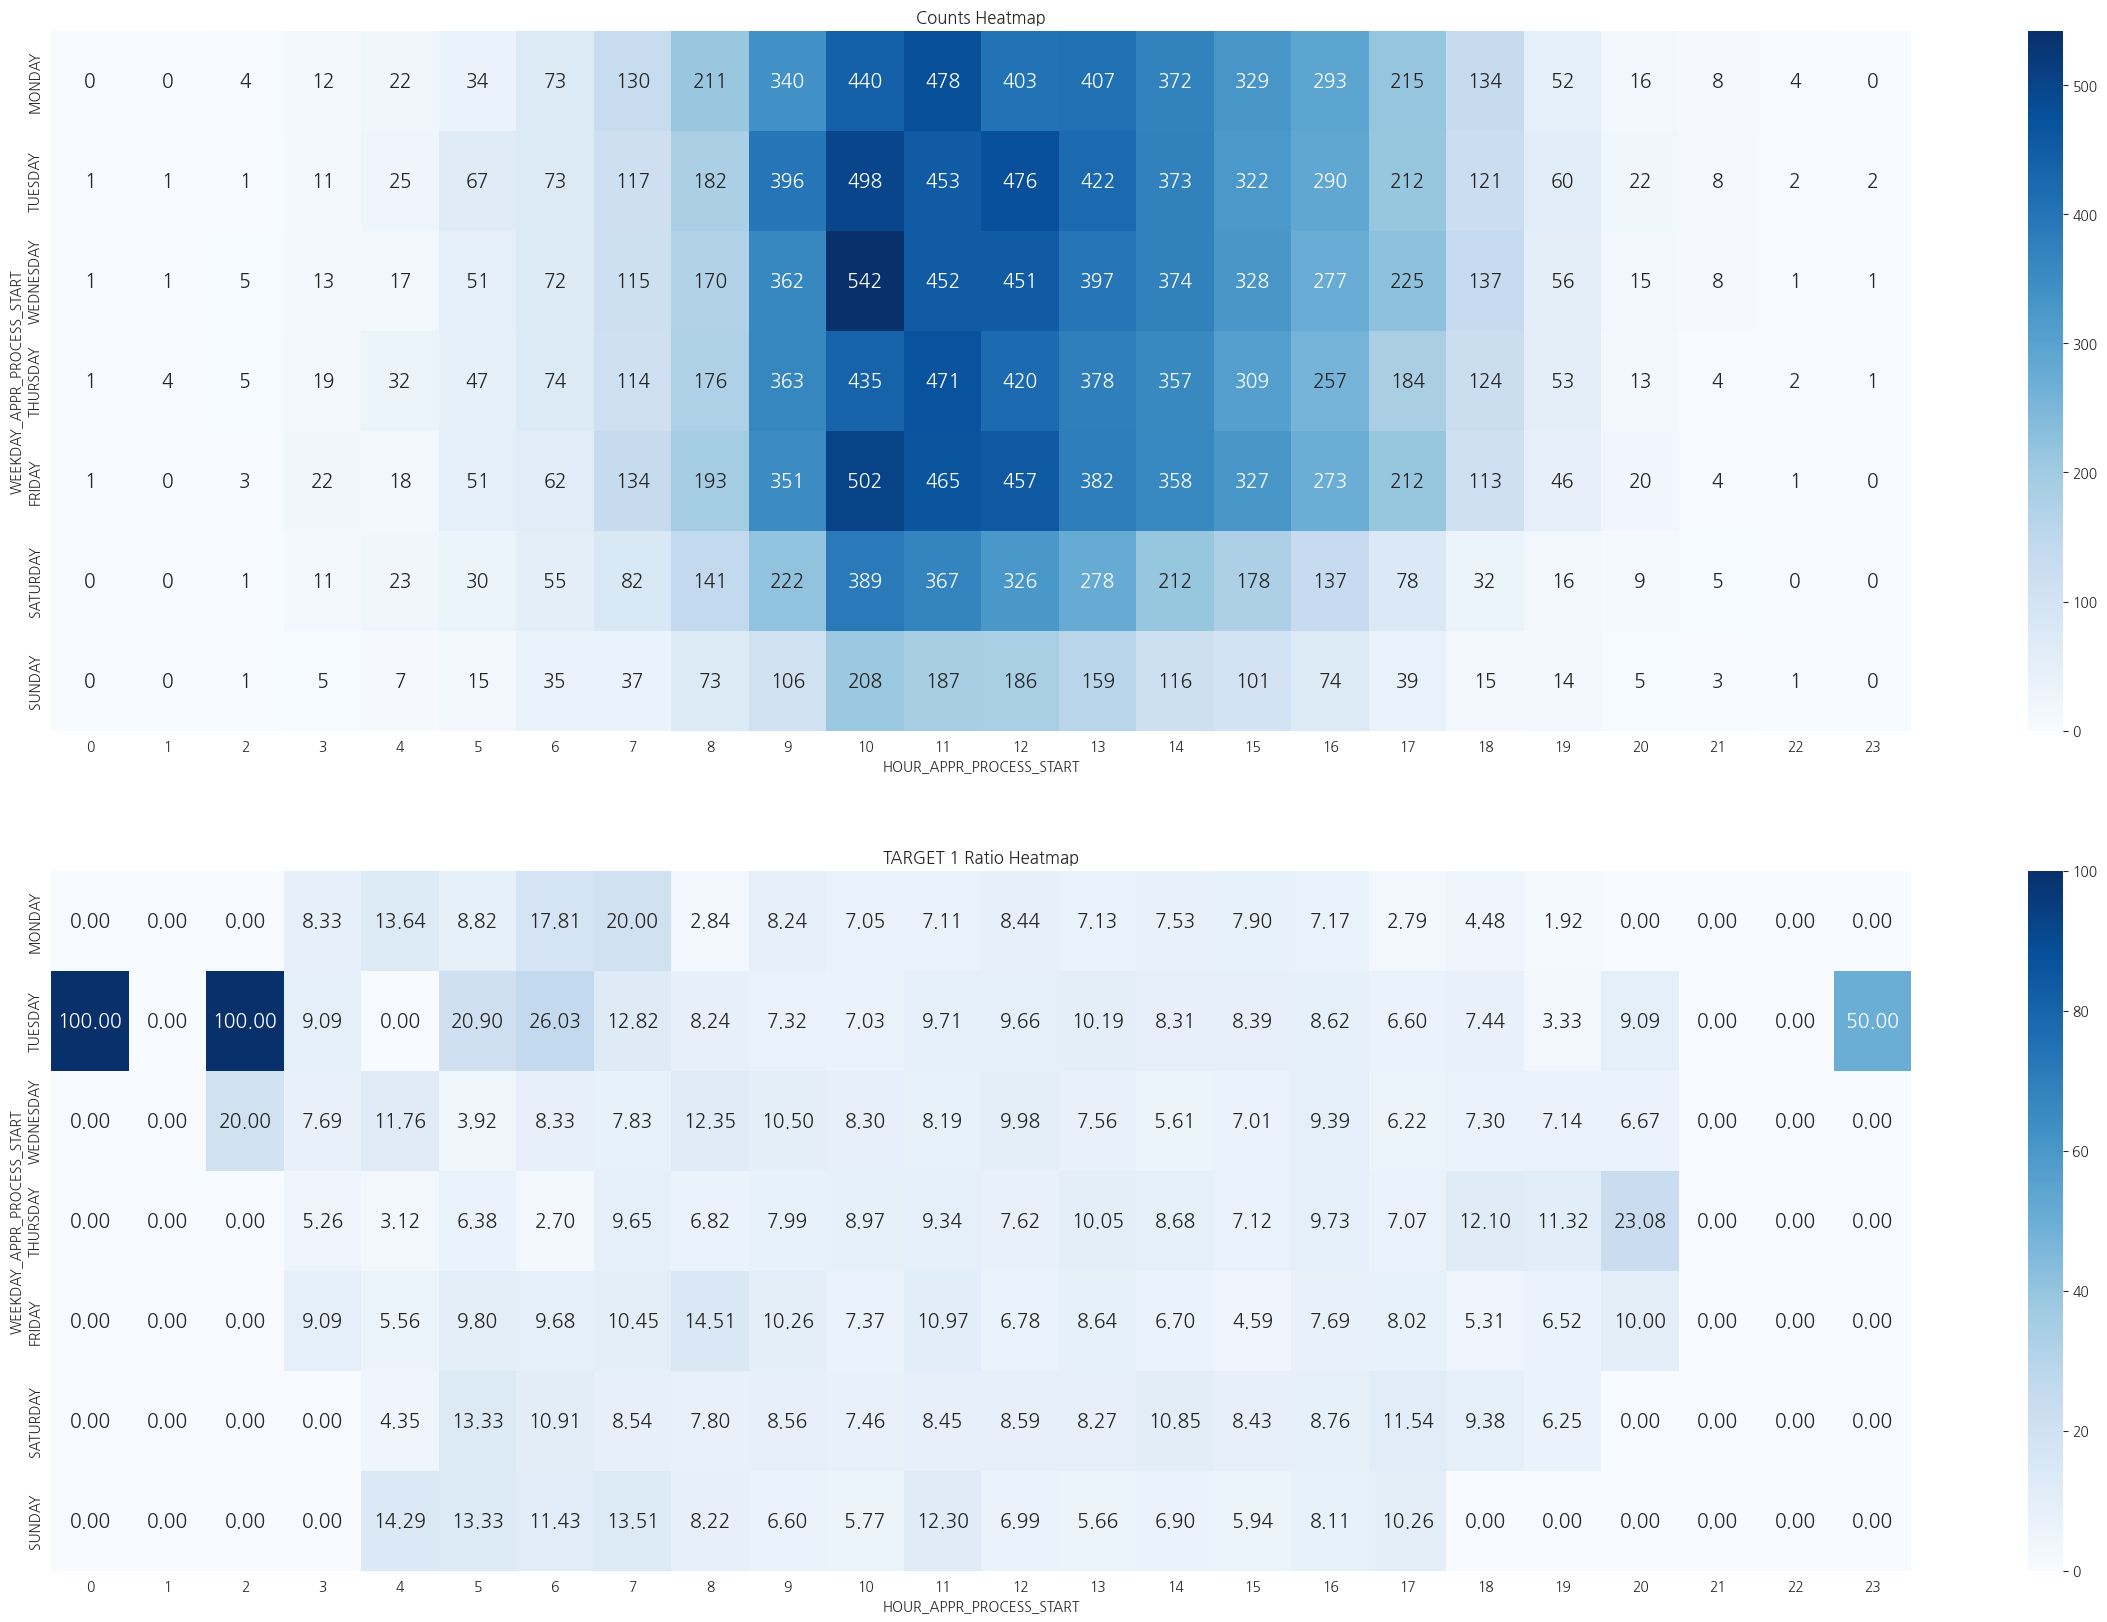

In [239]:
plot_heatmaps(data1 ,'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START')

> #### _<font color = lightseagreen> 요일 X 시간 조합으로 연체율이 높/낮은 패턴을 찾기 힘들어보임 </font>_
> 요일 및 시간의 의미를 살려 임의로 범주화한 변수 생성해서 EDA 진행 

In [269]:
# Define weekday and weekend categories
weekday = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY']
weekend = ['SATURDAY', 'SUNDAY']

# Define time categories
time_categories = {
    (6, 11): "오전",
    (11, 14): "점심",
    (14, 18): "오후",
    (18, 24): "저녁/새벽",
    (0, 6): "저녁/새벽"
}

# Combine WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START columns
data1['TIME_CATEGORY'] = data1.apply(lambda row: 
                                   ('평일' if row['WEEKDAY_APPR_PROCESS_START'] in weekday else '주말') + '_' +
                                   next((value for key, value in time_categories.items() if key[0] <= row['HOUR_APPR_PROCESS_START'] < key[1]), ''),
                                   axis=1)

In [270]:
data1['TIME_CATEGORY'].value_counts()

평일_점심       6512
평일_오전       6125
평일_오후       5887
주말_점심       1503
평일_저녁/새벽    1497
주말_오전       1348
주말_오후        935
주말_저녁/새벽     193
Name: TIME_CATEGORY, dtype: int64

In [271]:
# Create a pivot table to calculate the mean TARGET for each TIME_CATEGORY
pivot_table = data1.pivot_table(index='TIME_CATEGORY', values='TARGET', aggfunc=['mean', 'count'])

In [272]:
pivot_table

mean  count
                 TARGET TARGET
TIME_CATEGORY                 
주말_오전          0.078635   1348
주말_오후          0.088770    935
주말_저녁/새벽       0.062176    193
주말_점심          0.084498   1503
평일_오전          0.089796   6125
평일_오후          0.073042   5887
평일_저녁/새벽       0.076152   1497
평일_점심          0.087684   6512

- #### 가설 : 거주지표준화('REGION_POPULATION_RELATIVE')는 각 성, 연령에 대한 표준화 지표를 의미할까    
- → 데이터의 성, 연령을 구분해 'REGION_POPULATION_RELATIVE'와의 연관성 탐색  

### 2-10. 거주지표준화('REGION_POPULATION_RELATIVE') 변수 EDA :   
#### ▶ 표준화 정보이므로, 성/연령 과의 연관성이 있어보임  (총 81개 유효값이 존재). 연관성 파악 <a id="s-2.6">

In [273]:
# 연령 파생변수 생성
data1['AGE'] = (-data1['DAYS_BIRTH'] // 365)

In [274]:
data1['CODE_GENDER'].value_counts()

F    16915
M     7085
Name: CODE_GENDER, dtype: int64

In [275]:
male_data = data1[data1['CODE_GENDER']=='M'] # 남자
female_data = data1[data1['CODE_GENDER']=='F'] # 여자 

In [280]:
len(data1['REGION_POPULATION_RELATIVE'].value_counts().unique( ))

70

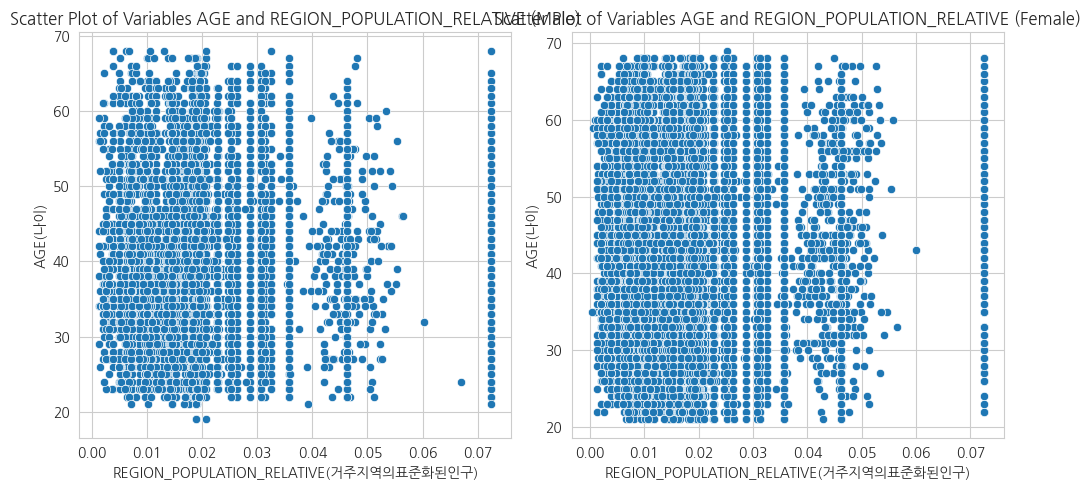

In [277]:
# 그리드 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 남성 산점도
sns.scatterplot(data=male_data, x='REGION_POPULATION_RELATIVE', y='AGE', ax=axes[0])
axes[0].set_xlabel('REGION_POPULATION_RELATIVE(' + column_info['REGION_POPULATION_RELATIVE']+')')
axes[0].set_ylabel('AGE(나이)')
axes[0].set_title('Scatter Plot of Variables AGE and REGION_POPULATION_RELATIVE (Male)')

# 여성 산점도
sns.scatterplot(data=female_data, x='REGION_POPULATION_RELATIVE', y='AGE', ax=axes[1])
axes[1].set_xlabel('REGION_POPULATION_RELATIVE(' + column_info['REGION_POPULATION_RELATIVE']+')')
axes[1].set_ylabel('AGE(나이)')
axes[1].set_title('Scatter Plot of Variables AGE and REGION_POPULATION_RELATIVE (Female)')

plt.tight_layout() # 서브플롯 간격 조정
plt.show()


- #### 상관계수 파악 후 파생변수 생성 

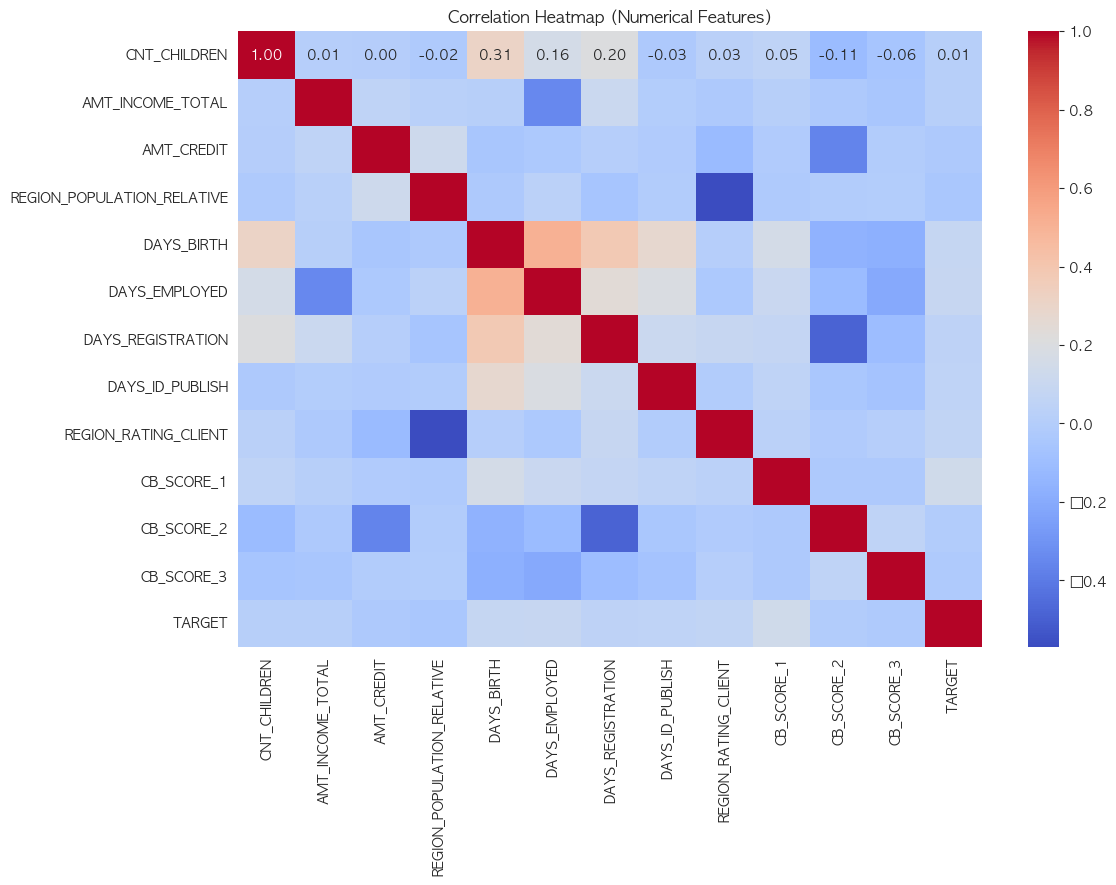

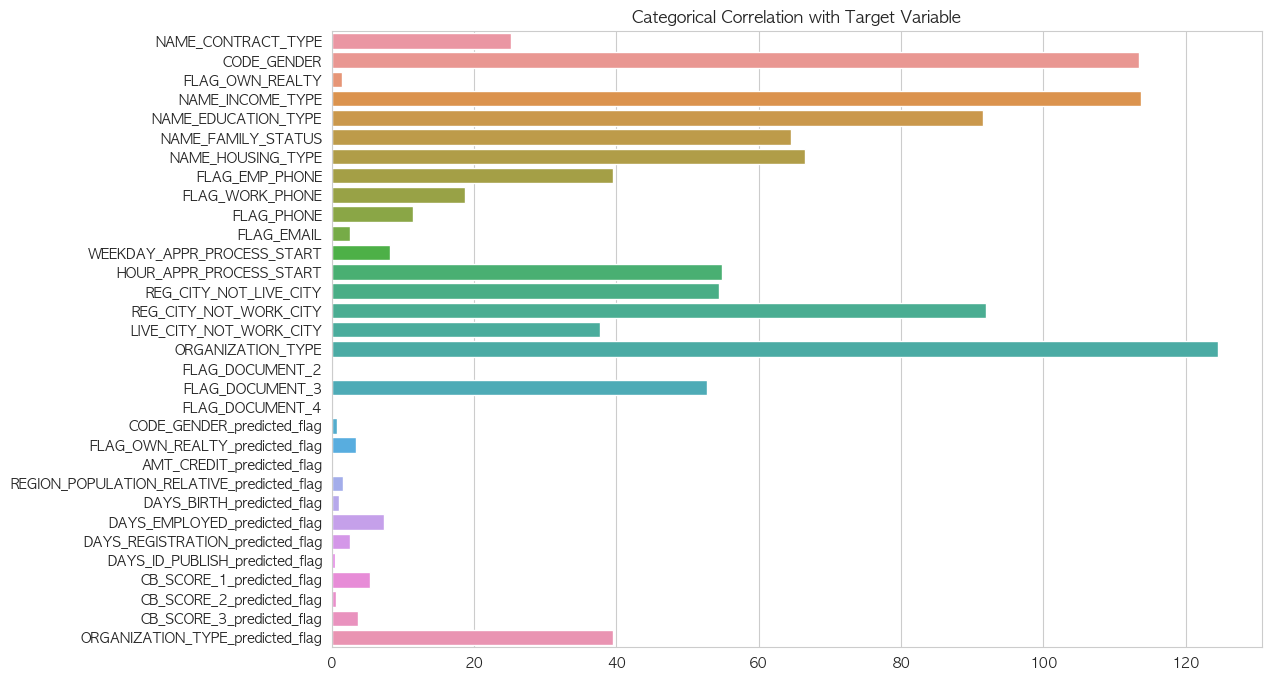

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def analyze_correlation(dataset, target_variable):
    # 데이터셋에서 수치형 변수와 범주형 변수를 자동으로 구분
    numerical_features = dataset.select_dtypes(include=[np.number])
    categorical_features = dataset.select_dtypes(exclude=[np.number])

    # 수치형 변수 간의 상관 행렬 계산
    correlation_matrix = numerical_features.corr()

    # 범주형 변수 간의 카이 제곱 테스트를 통한 연관성 분석
    categorical_correlation = {}
    for cat_feature in categorical_features:
        contingency_table = pd.crosstab(dataset[cat_feature], dataset[target_variable])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        categorical_correlation[cat_feature] = chi2

    # 수치형 변수 간의 상관 히트맵 시각화
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap (Numerical Features)')

    # 범주형 변수 간의 연관성 시각화
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(categorical_correlation.values()), y=list(categorical_correlation.keys()))
    plt.title('Categorical Correlation with Target Variable')

    plt.show()

# 예시 데이터셋과 타겟 변수명을 넣어 함수 호출
analyze_correlation(data1, 'TARGET')


- #### 수치형 변수 이상치 제거/대체

In [283]:
# 원래의 출력 형식 저장
original_format = pd.get_option('display.float_format')

# Pandas 출력 형식 변경
pd.set_option('display.float_format', '{:.2f}'.format)

outliers_summary = []

for feature in numerical_features:
    Q1 = data1[feature].quantile(0.25)
    Q3 = data1[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = data1[(data1[feature] < (Q1 - 1.5 * IQR)) | (data1[feature] > (Q3 + 1.5 * IQR))]
    outliers_count = len(outliers)
    total_count = len(data1)
    
    outliers_summary.append({
        'Feature': feature,
        'Total Data Points': total_count,
        'Outliers Count': outliers_count,
        'Max Outlier Value': outliers[feature].max() if outliers_count > 0 else None,
        'Min Outlier Value': outliers[feature].min() if outliers_count > 0 else None
    })

outliers_df = pd.DataFrame(outliers_summary)

print(outliers_df)

# Pandas 출력 형식을 원래대로 복구
pd.set_option('display.float_format', original_format)


                      Feature  Total Data Points  Outliers Count  \
0            AMT_INCOME_TOTAL              24000            1123   
1                  AMT_CREDIT              24000             644   
2  REGION_POPULATION_RELATIVE              24000            1682   
3                  DAYS_BIRTH              24000               0   
4               DAYS_EMPLOYED              24000             399   
5           DAYS_REGISTRATION              24000             684   
6             DAYS_ID_PUBLISH              24000               0   
7                  CB_SCORE_1              24000            1458   
8                  CB_SCORE_2              24000             667   
9                  CB_SCORE_3              24000            2078   

   Max Outlier Value  Min Outlier Value  
0       117000000.00          340200.00  
1         4050000.00         1460691.00  
2               0.07               0.04  
3                NaN                NaN  
4           -8637.00          -94688.23  

> #### _<font color = lightseagreen> 1. CB스코어는 최대 최소가 0~100을 이루기 때문에 이상치가 해당 범위에 들어감 > 대체 및 대체 진행 안함  </font>_  
> #### _<font color = lightseagreen> 2. DAYS_REGISTRATION는 기존 분포에 대해서 0초과인 값을 가지지 않았는데, 결측치 대체 작업을 하면서 0 초과인 값의 비율과 건수 확인 필요함  </font>_
> #### _<font color = lightseagreen> 3. AMT_INCOME_TOTAL 엄밀히 소득히 높을 수 있기때문에 이상치로 봐야하는지 의문은 들지만, 해당 소득금액은 별도 결측치 대체가 아닌 기존에 있었던 값으로 확인  > 대체 및 제거 진행 안함 </font>_
> #### _<font color = lightseagreen> 4. AMT_CREDIT 도 앞서 AMT_INCOME_TOTAL과 같은 논리로 설명 가능  > 대체 및 제거 진행 안함 </font>_
> #### _<font color = lightseagreen> 5. REGION_POPULATION_RELATIVE 표준화된 인구수 및   > 대체 및 제거 진행 안함 </font>_

In [224]:
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

상관계수 파악한 다음 파생변수만드려고함

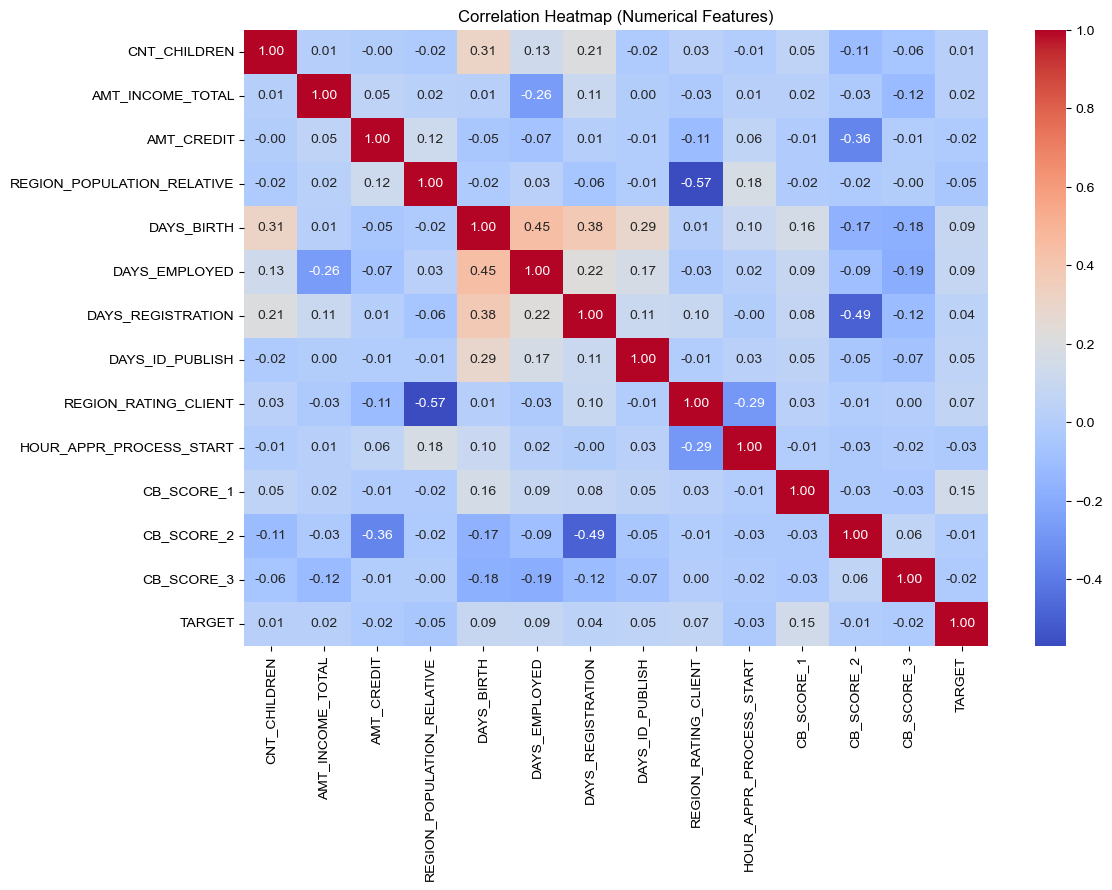

In [84]:
def plot_correlation_matrix(dataset):

    # 수치형 변수 간의 상관 행렬 계산
    correlation_matrix = dataset.corr()

    # 상관 히트맵 시각화
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap (Numerical Features)')
    plt.show()


# 예시 데이터셋을 넣어 함수 호출
plot_correlation_matrix(data1.select_dtypes(include=[np.number]))

In [112]:
corr_matrix = data1.corr()
corr_with_target = corr_matrix["TARGET"].sort_values(ascending=False)
print(corr_with_target)

TARGET                        1.000000
CB_SCORE_1                    0.146214
DAYS_BIRTH                    0.088513
DAYS_EMPLOYED                 0.085218
REGION_RATING_CLIENT          0.065444
DAYS_ID_PUBLISH               0.051046
DAYS_REGISTRATION             0.037255
AMT_INCOME_TOTAL              0.017482
CNT_CHILDREN                  0.014485
CB_SCORE_2                   -0.008186
AMT_CREDIT                   -0.020514
CB_SCORE_3                   -0.023515
HOUR_APPR_PROCESS_START      -0.028058
REGION_POPULATION_RELATIVE   -0.047900
Name: TARGET, dtype: float64


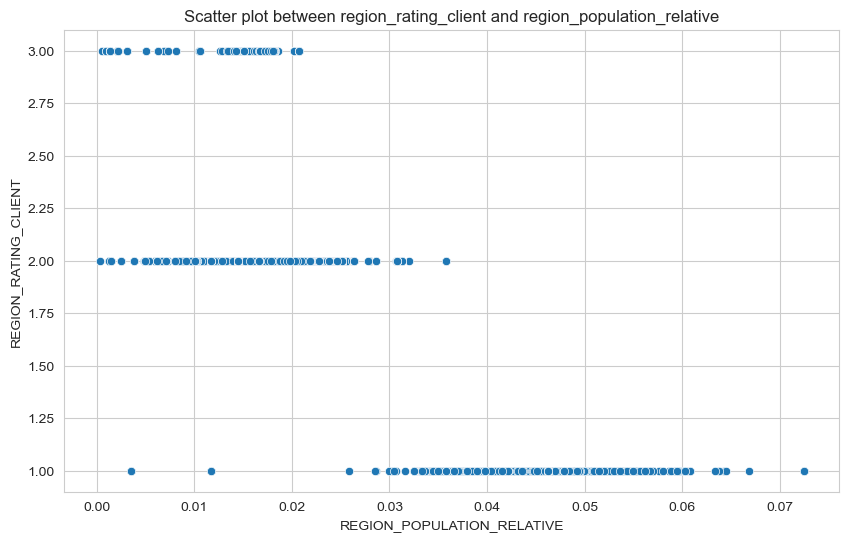

In [162]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x="REGION_POPULATION_RELATIVE", y="REGION_RATING_CLIENT")
plt.title("Scatter plot between region_rating_client and region_population_relative")
plt.show()

## 연체 여부에 따른 상관관계가 높은 수치형 변수는 없음

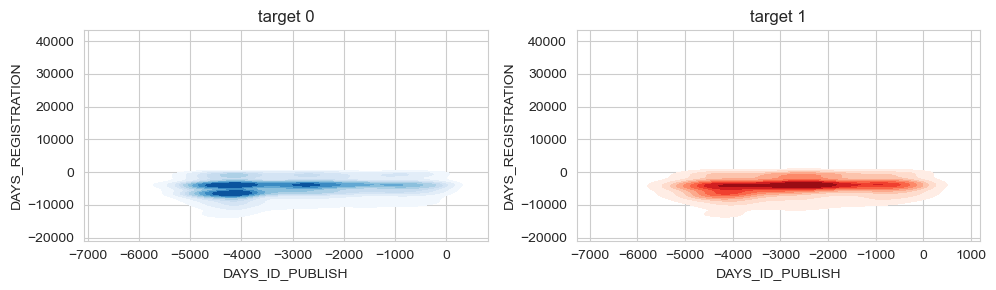

In [88]:
paid = data1[data1.TARGET == 0]
unpaid = data1[data1.TARGET == 1]

f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.kdeplot(data=paid, x='DAYS_ID_PUBLISH', y='DAYS_REGISTRATION', cmap="Blues", shade=True, shade_lowest=False, ax=axes[0]).set_title('target 0')
sns.kdeplot(data=unpaid, x='DAYS_ID_PUBLISH', y='DAYS_REGISTRATION', cmap="Reds", shade=True, shade_lowest=False, ax=axes[1]).set_title('target 1')
sns.set_style('whitegrid')

# Y축 범위를 동일하게 맞추기
axes[0].set_ylim(axes[1].get_ylim())

plt.tight_layout()


In [107]:
# 연령 파생변수 생성
data['AGE'] = (-data['DAYS_BIRTH'] // 365)
# 연차 파생변수 생성
data['YEARS_EMPLOYED'] = (-data['DAYS_EMPLOYED'] // 365)

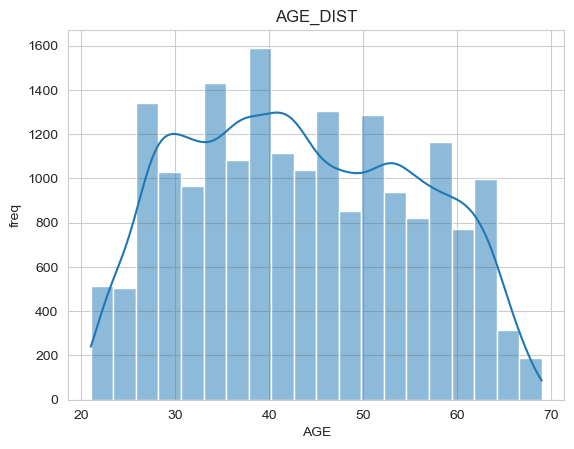

In [108]:
sns.histplot(data['AGE'], bins=20, kde=True)
plt.title('AGE_DIST')
plt.xlabel('AGE')
plt.ylabel('freq')
plt.show()

<Axes: xlabel='Importance', ylabel='Feature'>

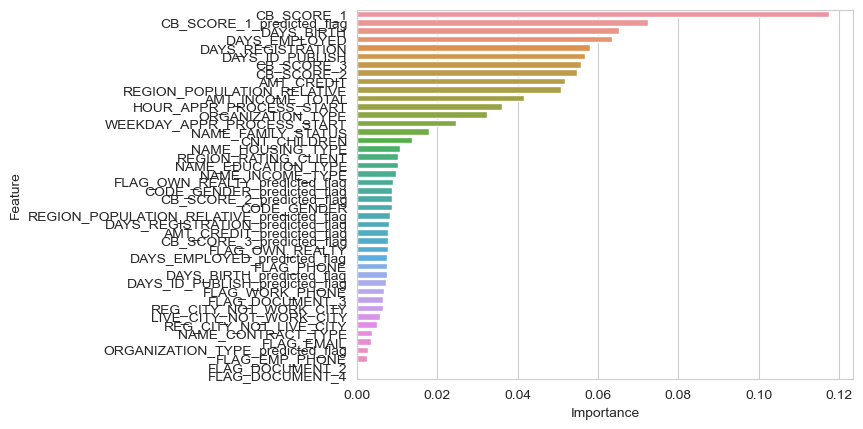

In [115]:

# 모든 문자열 컬럼을 찾아서 Label Encoding 적용
label_encoders = {}
for column in data1.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data1[column] = le.fit_transform(data1[column])
    label_encoders[column] = le

# 이제 RandomForestClassifier에 fit 가능
rf = RandomForestClassifier()
rf.fit(data1.drop('TARGET', axis=1), data1['TARGET'])

feature_importances = pd.DataFrame({
    'Feature': data1.drop('TARGET', axis=1).columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)

In [116]:
feature_importances

Feature  Importance
29                                 CB_SCORE_1    0.117628
40                  CB_SCORE_1_predicted_flag    0.072560
11                                 DAYS_BIRTH    0.065194
12                              DAYS_EMPLOYED    0.063394
13                          DAYS_REGISTRATION    0.058105
14                            DAYS_ID_PUBLISH    0.056661
31                                 CB_SCORE_3    0.055791
30                                 CB_SCORE_2    0.054658
5                                  AMT_CREDIT    0.051894
10                 REGION_POPULATION_RELATIVE    0.050798
4                            AMT_INCOME_TOTAL    0.041566
21                    HOUR_APPR_PROCESS_START    0.035978
25                          ORGANIZATION_TYPE    0.032305
20                 WEEKDAY_APPR_PROCESS_START    0.024585
8                          NAME_FAMILY_STATUS    0.017986
3                                CNT_CHILDREN    0.013587
9                           NAME_HOUSING_TYPE    0.010661
19                       REGION_RATING_CLIENT    0.010264
7                         NAME_EDUCATION_TYPE    0.010183
6                            NAME_INCOME_TYPE    0.009648
33             FLAG_OWN_REALTY_predicted_flag    0.009024
32                 CODE_GENDER_predicted_flag    0.008792
41                  CB_SCORE_2_predicted_flag    0.008648
1                                 CODE_GENDER    0.008589
35  REGION_POPULATION_RELATIVE_predicted_flag    0.008186
38           DAYS_REGISTRATION_predicted_flag    0.008023
34                  AMT_CREDIT_predicted_flag    0.007718
42                  CB_SCORE_3_predicted_flag    0.007685
2                             FLAG_OWN_REALTY    0.007673
37               DAYS_EMPLOYED_predicted_flag    0.007473
17                                 FLAG_PHONE    0.007456
36                  DAYS_BIRTH_predicted_flag    0.007378
39             DAYS_ID_PUBLISH_predicted_flag    0.007139
16                            FLAG_WORK_PHONE    0.006797
27                            FLAG_DOCUMENT_3    0.006528
23                     REG_CITY_NOT_WORK_CITY    0.006426
24                    LIVE_CITY_NOT_WORK_CITY    0.005687
22                     REG_CITY_NOT_LIVE_CITY    0.004982
0                          NAME_CONTRACT_TYPE    0.003695
18                                 FLAG_EMAIL    0.003391
43           ORGANIZATION_TYPE_predicted_flag    0.002651
15                             FLAG_EMP_PHONE    0.002598
26                            FLAG_DOCUMENT_2    0.000011
28                            FLAG_DOCUMENT_4    0.000000

In [ ]:
##파생변수

## 3. Feature Engineering  <a id="s-3">

#### 앞서 진행한 데이터 분포 및 데이터셋에 대한 전반적인 배경지식, 변수 중요도를 기반으로 파생변수를 생성

In [119]:
data2 = data1.copy()

### 3-1. 파생변수 생성  <a id="s-3.1">

- #### 연령

In [124]:
data2['AGE'] = round(data2['DAYS_BIRTH'] / 365)*-1
data2['AGE'].head(5)

0    26.0
1    52.0
2    35.0
3    31.0
4    42.0
Name: AGE, dtype: float64

- #### 근무 연차

In [146]:
data2['YEARS_EMPLOYED'] = round(data2['DAYS_EMPLOYED'] / 365)*-1
data2['YEARS_EMPLOYED'].head(5)

0     2.0
1    10.0
2     6.0
3     2.0
4     1.0
Name: YEARS_EMPLOYED, dtype: float64

- #### 최신정보등록기간(월단위)

In [150]:
data2['DAYS_REGISTRATION_MONTH'] = round(data2['DAYS_REGISTRATION'] / 30)*-1
#data2['DAYS_REGISTRATION_MONTH'].head(5)
data2['DAYS_REGISTRATION_MONTH'].max()

822.0

- #### 근무기간(월단위)

In [151]:
data2['MONTH_EMPLOYED'] = round(data2['DAYS_EMPLOYED'] / 30)*-1
data2['MONTH_EMPLOYED'].head(5)

0     21.0
1    126.0
2     68.0
3     25.0
4     16.0
Name: MONTH_EMPLOYED, dtype: float64

- #### 신분증변경시점차이(월단위)

In [152]:
data2['DAYS_ID_PUBLISH_YEARS'] = round(data2['DAYS_ID_PUBLISH'] / 30)*-1
data2['DAYS_ID_PUBLISH_YEARS'].head(5)

0     71.0
1     84.0
2    129.0
3     89.0
4     17.0
Name: DAYS_ID_PUBLISH_YEARS, dtype: float64

- #### 소득금액대비신용대출금액

In [157]:
# 국내 DSR과 유사한 개념

data2['ANNUITY_INCOME_PERCENT'] = (data2['AMT_CREDIT'] / data2['AMT_INCOME_TOTAL'])
data2['ANNUITY_INCOME_PERCENT'].head(5)

0    2.863394
1    2.000000
2    4.718542
3    4.360842
4    2.983467
Name: ANNUITY_INCOME_PERCENT, dtype: float64

- #### 평균신용점수

In [159]:
data2['AVG_CB_SCORE'] = (data2['CB_SCORE_1'] + data2['CB_SCORE_2'] + data2['CB_SCORE_3'])/3
data2['AVG_CB_SCORE'].head(5)

0    56.854811
1    43.511234
2    57.265988
3    65.688910
4    60.655339
Name: AVG_CB_SCORE, dtype: float64

- #### 정보등록유무

In [163]:
data2['CUST_REG_INFO_FLAG'] = data2['FLAG_EMP_PHONE'] | data2['FLAG_WORK_PHONE'] | data2['FLAG_PHONE'] | data2['FLAG_EMAIL']
data2['CUST_REG_INFO_FLAG'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: CUST_REG_INFO_FLAG, dtype: int64

- #### 한부모가족형태여부

In [172]:
# 'IS_SINGLE_PARENT' 컬럼을 생성하고 모든 값을 'N'으로 초기화
data2['IS_SINGLE_PARENT'] = 'N'

# 지정된 조건에 따라 값들을 'Y'로 업데이트
data2.loc[((data2['NAME_FAMILY_STATUS'] == 'Single / not married') | 
           (data2['NAME_FAMILY_STATUS'] == 'Widow')) & 
          (data2['CNT_CHILDREN'] > 0), 'IS_SINGLE_PARENT'] = 'Y'
data2['IS_SINGLE_PARENT'].head(5)

0    N
1    N
2    N
3    N
4    N
Name: IS_SINGLE_PARENT, dtype: object

- #### 신용점수최소값

In [174]:
data2['MIN_CB_SCORE'] =data2[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].min(axis=1)
data2['MIN_CB_SCORE'].head(5)

0    55.480659
1    26.499494
2    49.161400
3    45.996152
4    56.678852
Name: MIN_CB_SCORE, dtype: float64

- #### 신용점수중앙값

In [175]:
data2['MEDIAN_CB_SCORE'] =data2[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].median(axis=1)
data2['MEDIAN_CB_SCORE'].head(5)

0    56.734550
1    46.433666
2    59.140194
3    68.694333
4    59.087181
Name: MEDIAN_CB_SCORE, dtype: float64

- #### 신용점수표준편차

In [177]:
data2['STD_CB_SCORE'] =data2[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].std(axis=1)
data2['STD_CB_SCORE'].head(5)

0     1.438059
1    15.755134
2     7.348968
3    18.375316
4     4.950488
Name: STD_CB_SCORE, dtype: float64

- #### 신용점수최대값

In [179]:
data2['MAX_CB_SCORE'] =data2[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].max(axis=1)
data2['MAX_CB_SCORE'].head(5)

0    58.349224
1    57.600542
2    63.496369
3    82.376245
4    66.199985
Name: MAX_CB_SCORE, dtype: float64

- #### 주말취급고객유무

In [180]:
data2['WEEKEND_APPR_PROCESS_START'] = 'N'
data2.loc[(data2['WEEKDAY_APPR_PROCESS_START'] == 'SUNDAY') | 
                     (data2['WEEKDAY_APPR_PROCESS_START'] == 'SATURDAY'), 'WEEKEND_APPR_PROCESS_START'] = 'Y'
data2['WEEKEND_APPR_PROCESS_START'].head(5)

0    N
1    N
2    N
3    N
4    N
Name: WEEKEND_APPR_PROCESS_START, dtype: object

- #### 자녀수대비소득

In [181]:
# 아이수 대비 소득

data2['CHILDREN_INCOME_PERCENT'] = (data2['AMT_INCOME_TOTAL'] / (data2['CNT_CHILDREN']+1)) * 10
data2['CHILDREN_INCOME_PERCENT'].head(5)

0    2025000.0
1     675000.0
2    1080000.0
3     450000.0
4    2025000.0
Name: CHILDREN_INCOME_PERCENT, dtype: float64

- #### 근무기간대비나이

In [183]:
# 일한 기간 대비 나이

data2['DAYS_EMPLOYED_PERCENT'] = (data2['DAYS_EMPLOYED'] / data2['DAYS_BIRTH']) * 100
data2['DAYS_EMPLOYED_PERCENT'].head(5)

0     6.732903
1    19.885442
2    15.791392
3     6.609959
4     3.073926
Name: DAYS_EMPLOYED_PERCENT, dtype: float64

In [42]:
FILLED_DATA_ADJ = FILLED_DATA_ADJ.astype({'CUST_REG_INFO_FLAG': object, 'WEEKEND_APPR_PROCESS_START' : object, })

- #### 근무기간및출생기간_상호작용변수

In [184]:
# 상호 작용 변수: 상관계수 0.45
data2['DAYS_BIRTH_x_DAYS_EMPLOYED'] = data2['DAYS_BIRTH'] * data2['DAYS_EMPLOYED']
data2['DAYS_BIRTH_x_DAYS_EMPLOYED'].head(5)

0    6.026657e+06
1    7.213447e+07
2    2.640491e+07
3    8.419356e+06
4    7.339963e+06
Name: DAYS_BIRTH_x_DAYS_EMPLOYED, dtype: float64

- #### 출생기간제곱_다항변수

In [186]:
# 나이와 대출 연체 가능성 사이의 관계는 단순히 선형적이지 않음. 예를 들어, 중간 연령대의 사람들이 연체 가능성이 더 낮을 수 있으며, 이는 U자형 곡선을 형성
# 이러한 이유로, DAYS_BIRTH의 다항 특징을 고려하는 것은 이 비선형 관계를 파악하는 데 도움. 예를 들어, DAYS_BIRTH의 제곱을 고려함으로써 나이와 타겟 변수 사이의 U자형 관계를 잡아낼 수 있음.

data2['DAYS_BIRTH_SQUARE'] = data2['DAYS_BIRTH'] ** 2
data2['DAYS_BIRTH_SQUARE'].head(5)

0    8.951052e+07
1    3.627501e+08
2    1.672108e+08
3    1.273738e+08
4    2.387814e+08
Name: DAYS_BIRTH_SQUARE, dtype: float64

- #### 신용점수1의 결측예측여부 결합_변수중요도고려변수

In [187]:
data2['CB_SCORE_1_x_predicted_flag'] = data2['CB_SCORE_1'] * data2['CB_SCORE_1_predicted_flag']
data2['CB_SCORE_1_x_predicted_flag'].head(5)

0    55.480659
1     0.000000
2    49.161400
3     0.000000
4     0.000000
Name: CB_SCORE_1_x_predicted_flag, dtype: float64

- #### 연체율이 높은 직업 그룹끼리 grouping한 직업 변수 생성

In [87]:
# 계산된 연체율을 저장할 새로운 열 추가
data2['Default_Rate'] =- #### 신용점수1의 결측예측여부 결합_변수중요도고려변수 data1.groupby('ORGANIZATION_TYPE')['TARGET'].transform('mean')

# 연체율 기준으로 범주 묶기
bins = pd.qcut(data2['Default_Rate'], q=10, labels=False, duplicates='drop')
data2['Grouped_ORGANIZATION_TYPE'] = bins.apply(lambda x: f'Group_{x+1}')

# 기존 열과 불필요한 열 제거
# data = data.drop(['ORGANIZATION_TYPE', 'Default_Rate'], axis=1)

# 결과 확인
print(data2['Grouped_ORGANIZATION_TYPE'].value_counts())

Group_6    5363
Group_2    4299
Group_7    3879
Group_4    3813
Group_1    2536
Group_9    2051
Group_5     913
Group_3     655
Group_8     491
Name: Grouped_ORGANIZATION_TYPE, dtype: int64


In [88]:
grouped_org_types = data2.groupby('Grouped_ORGANIZATION_TYPE')['ORGANIZATION_TYPE'].unique() # 어떤 직업군이 들어갔는지 확인

In [89]:
data2.groupby('Grouped_ORGANIZATION_TYPE')['TARGET'].mean()

Grouped_ORGANIZATION_TYPE
Group_1    0.049290
Group_2    0.056990
Group_3    0.065649
Group_4    0.085235
Group_5    0.090909
Group_6    0.092672
Group_7    0.098995
Group_8    0.099796
Group_9    0.117991
Name: TARGET, dtype: float64

In [ ]:
data2.drop(['Default_Rate'], axis = 1)

- #### 대출 요일 X 대출 시간대 조합한 group 변수 생성 

In [269]:
# Define weekday and weekend categories
weekday = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY']
weekend = ['SATURDAY', 'SUNDAY']

# Define time categories
time_categories = {
    (6, 11): "오전",
    (11, 14): "점심",
    (14, 18): "오후",
    (18, 24): "저녁/새벽",
    (0, 6): "저녁/새벽"
}

# Combine WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START columns
data2['TIME_CATEGORY'] = data2.apply(lambda row: 
                                   ('평일' if row['WEEKDAY_APPR_PROCESS_START'] in weekday else '주말') + '_' +
                                   next((value for key, value in time_categories.items() if key[0] <= row['HOUR_APPR_PROCESS_START'] < key[1]), ''),
                                   axis=1)

In [270]:
data2['TIME_CATEGORY'].value_counts()

평일_점심       6512
평일_오전       6125
평일_오후       5887
주말_점심       1503
평일_저녁/새벽    1497
주말_오전       1348
주말_오후        935
주말_저녁/새벽     193
Name: TIME_CATEGORY, dtype: int64

## 4. Modeling <a id="s-4">

#### 파생변수 고려한 최종 데이터셋을 기반으로 Target을 예측할 최적의 모델링 진행